In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/EV_Dataset.csv")  #Loading the dataset into google colab

In [3]:
df.head()

Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0

In [4]:
df.head()                                  # Gives top 5 rows in the dataset

Year Month_Name      Date           State         Vehicle_Class  \
0  2014.0        jan  1/1/2014  Andhra Pradesh       ADAPTED VEHICLE   
1  2014.0        jan  1/1/2014  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014.0        jan  1/1/2014  Andhra Pradesh             AMBULANCE   
3  2014.0        jan  1/1/2014  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014.0        jan  1/1/2014  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  
0           Others       Others                0.0  
1           Others       Others                0.0  
2           Others       Others                0.0  
3           Others       Others                0.0  
4              Bus          Bus                0.0

In [5]:
df.shape                                   # Gives number of rows and columns in dataset

(96845, 8)

In [6]:
df.info()                                   # Gives concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [7]:
# Finding number of unique values in each column

for i in df.columns:
  print(f"Number of unique values in {i} column : {df[i].nunique()}")

Number of unique values in Year column : 11
Number of unique values in Month_Name column : 12
Number of unique values in Date column : 121
Number of unique values in State column : 34
Number of unique values in Vehicle_Class column : 73
Number of unique values in Vehicle_Category column : 5
Number of unique values in Vehicle_Type column : 12
Number of unique values in EV_Sales_Quantity column : 1447


In [8]:
#Changing the datatypes of columns to optimize memory and performance

df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Year'].astype('int32')
df['EV_Sales_Quantity']=df['EV_Sales_Quantity'].astype('int32')

#Chaging the datatypes of columns having unique values count less than 15 from object to categorical

object_columns= df.select_dtypes(include='object').columns
for i in object_columns:
  if df[i].nunique()<15:
    df[i]=df[i].astype('category')

In [9]:
df.dtypes                   # Gives datatype of each column

Year                          int32
Month_Name                 category
Date                 datetime64[ns]
State                        object
Vehicle_Class                object
Vehicle_Category           category
Vehicle_Type               category
EV_Sales_Quantity             int32
dtype: object

In [10]:
df=df[df['Year']<2024.0]   #Dropping the year 2024 from the datset as we have only partial data for the year

In [11]:
df.info()                  # Summary of the dataset after modifying it

<class 'pandas.core.frame.DataFrame'>
Index: 95985 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               95985 non-null  int32         
 1   Month_Name         95985 non-null  category      
 2   Date               95985 non-null  datetime64[ns]
 3   State              95985 non-null  object        
 4   Vehicle_Class      95985 non-null  object        
 5   Vehicle_Category   95985 non-null  category      
 6   Vehicle_Type       95985 non-null  category      
 7   EV_Sales_Quantity  95985 non-null  int32         
dtypes: category(3), datetime64[ns](1), int32(2), object(2)
memory usage: 3.9+ MB


**Which states has the highest and lowest EV sales till date?**

In [12]:
highest_sales=df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()
highest_sales

State  EV_Sales_Quantity
0              Uttar Pradesh             704241
1                Maharashtra             382790
2                  Karnataka             301307
3                      Delhi             261471
4                  Rajasthan             221138
5                      Bihar             205090
6                 Tamil Nadu             198187
7                    Gujarat             170425
8                      Assam             147655
9             Madhya Pradesh             126416
10                    Kerala             125456
11                    Odisha              82379
12                   Haryana              81655
13               West Bengal              75362
14            Andhra Pradesh              75003
15              Chhattisgarh              71696
16               Uttarakhand              56372
17                    Punjab              46820
18                 Jharkhand              46178
19                   Tripura              17839
20                       Goa              16454
21         Jammu and Kashmir              15806
22                Chandigarh              10900
23                Puducherry               4808
24          Himachal Pradesh               2782
25                   Manipur               1255
26                DNH and DD                396
27                   Mizoram                206
28  Andaman & Nicobar Island                199
29                 Meghalaya                180
30                    Ladakh                 74
31                  Nagaland                 52
32         Arunachal Pradesh                 33
33                    Sikkim                  4

**Electric Vehicle Sales Trends for Top 5 States**

Text(0.5, 1.0, 'EV Sales Quantity Over Years for Top 5 States')

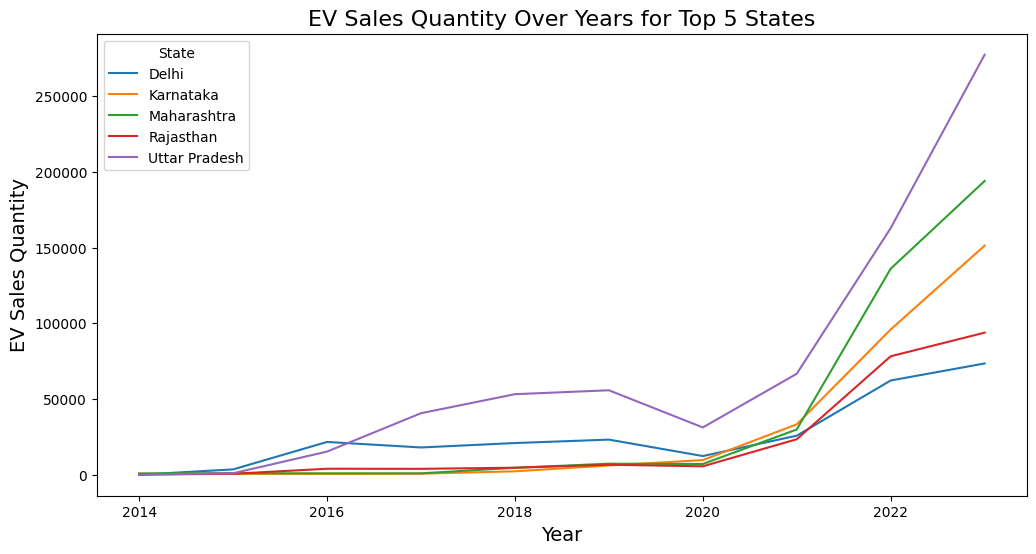

In [13]:
Top_5_States=highest_sales['State'].head()
Top_5_States

df1=df[df['State'].isin(Top_5_States)]
plt.figure(figsize=(12,6))
grouped_df1=df1.groupby(['State','Year'])['EV_Sales_Quantity'].sum().reset_index()
sns.lineplot(data=grouped_df1,x='Year',y='EV_Sales_Quantity',hue='State')
plt.xlabel('Year', fontsize=14)
plt.ylabel('EV Sales Quantity', fontsize=14)
plt.title('EV Sales Quantity Over Years for Top 5 States', fontsize=16)


**Trends in EV Sales Across Different Months**

<ipython-input-14-860985c7fd35>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = df.groupby('Month_Name')['EV_Sales_Quantity'].sum().reset_index()


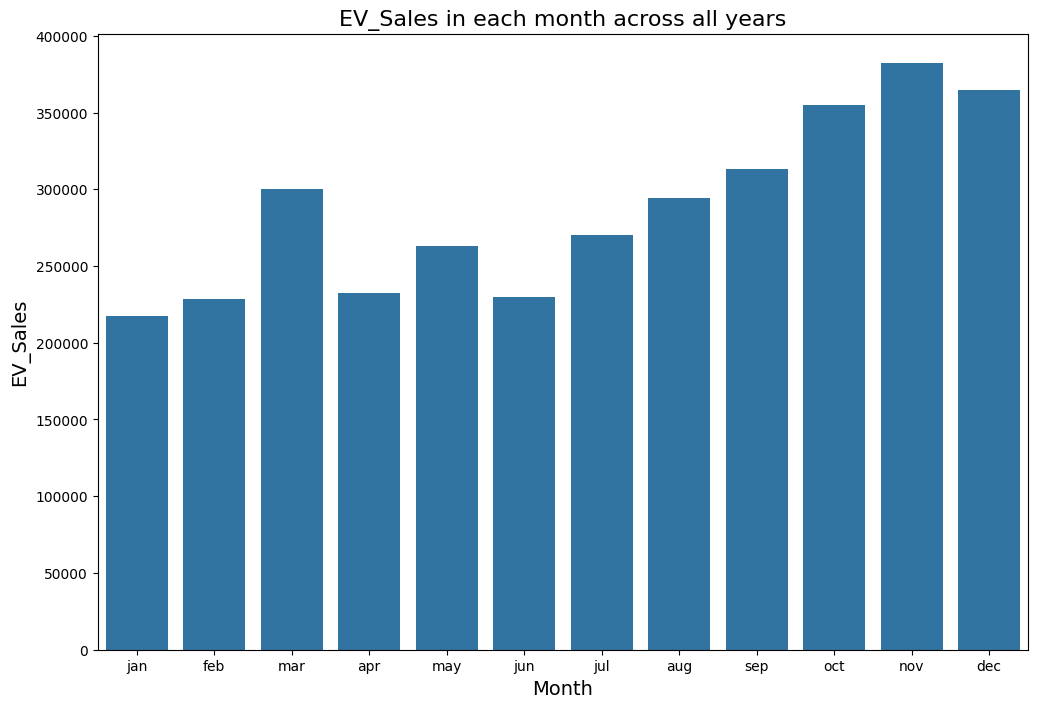

In [14]:
monthly_trends = df.groupby('Month_Name')['EV_Sales_Quantity'].sum().reset_index()
month_order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
monthly_trends['Month_Name'] = monthly_trends['Month_Name'].cat.reorder_categories(month_order, ordered=True)
monthly_trends

plt.figure(figsize=(12,8))
sns.barplot(data=monthly_trends,x='Month_Name',y='EV_Sales_Quantity')
plt.xlabel('Month',fontsize=14)
plt.ylabel('EV_Sales',fontsize=14)
plt.title('EV_Sales in each month across all years',fontsize=16)
plt.show()


**Dominant Vehicle Class in Terms of Sales Quantity**

In [15]:
# Top 10 Vehicle Class according to the EV_Sales

vehicle_class_dominance = df.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().sort_values(ascending=False)
print(vehicle_class_dominance.head(10))

Vehicle_Class
M-CYCLE/SCOOTER                      1618727
E-RICKSHAW(P)                        1367735
MOTOR CAR                             124095
E-RICKSHAW WITH CART (G)               86921
THREE WHEELER (PASSENGER)              69282
MOPED                                  59758
THREE WHEELER (GOODS)                  43050
MOTORISED CYCLE (CC > 25CC)            35232
MOTOR CAB                              17303
MOTOR CYCLE/SCOOTER-USED FOR HIRE      11725
Name: EV_Sales_Quantity, dtype: int32


**Different Vehicle Category Sales Over the Years**

In [16]:
vehicle_category_sales = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
vehicle_category_sales

<ipython-input-16-a1894200657c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_category_sales = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()


Year Vehicle_Category  EV_Sales_Quantity
0   2014       2-Wheelers               1679
1   2014       3-Wheelers                 12
2   2014       4-Wheelers                498
3   2014              Bus                  3
4   2014           Others                200
5   2015       2-Wheelers               1447
6   2015       3-Wheelers               5440
7   2015       4-Wheelers                761
8   2015              Bus                  4
9   2015           Others                153
10  2016       2-Wheelers               1460
11  2016       3-Wheelers              47352
12  2016       4-Wheelers                692
13  2016              Bus                  5
14  2016           Others                346
15  2017       2-Wheelers               1528
16  2017       3-Wheelers              83530
17  2017       4-Wheelers               1108
18  2017              Bus                 17
19  2017           Others               1237
20  2018       2-Wheelers              17059
21  2018       3-Wheelers             110451
22  2018       4-Wheelers               1588
23  2018              Bus                 49
24  2018           Others               1107
25  2019       2-Wheelers              30357
26  2019       3-Wheelers             134168
27  2019       4-Wheelers               1666
28  2019              Bus                506
29  2019           Others                122
30  2020       2-Wheelers              29110
31  2020       3-Wheelers              91236
32  2020       4-Wheelers               4201
33  2020              Bus                 88
34  2020           Others                 49
35  2021       2-Wheelers             156196
36  2021       3-Wheelers             159909
37  2021       4-Wheelers              13002
38  2021              Bus               1177
39  2021           Others               1214
40  2022       2-Wheelers             631090
41  2022       3-Wheelers             352742
42  2022       4-Wheelers              38170
43  2022              Bus               1988
44  2022           Others                733
45  2023       2-Wheelers             856836
46  2023       3-Wheelers             582548
47  2023       4-Wheelers              80121
48  2023              Bus               2666
49  2023           Others               3008

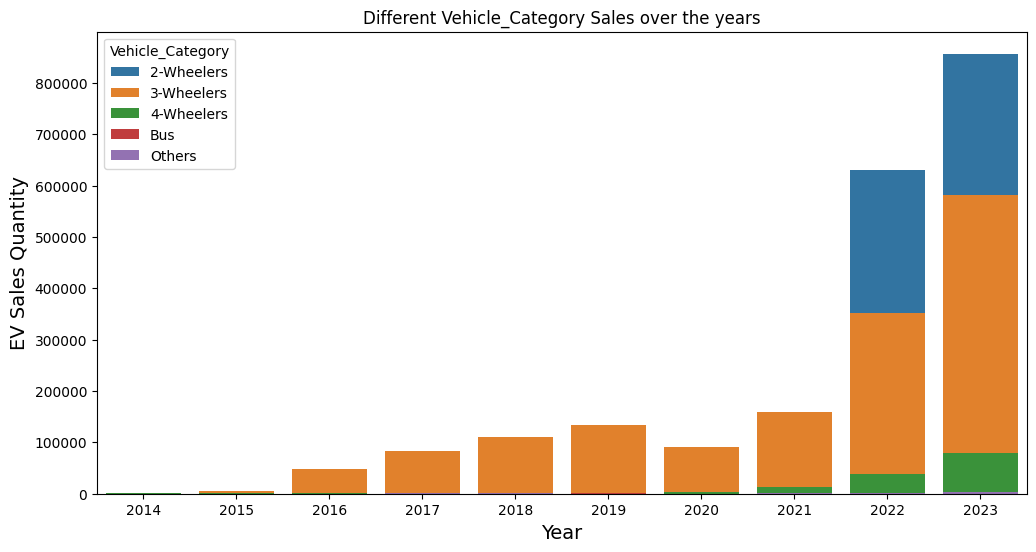

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data=vehicle_category_sales,x='Year',y='EV_Sales_Quantity',hue='Vehicle_Category',dodge=False)
plt.title('Different Vehicle_Category Sales over the years')
plt.xlabel('Year',fontsize=14)
plt.ylabel('EV Sales Quantity',fontsize=14)
plt.show()

**Electric Vehicle Sales over time**

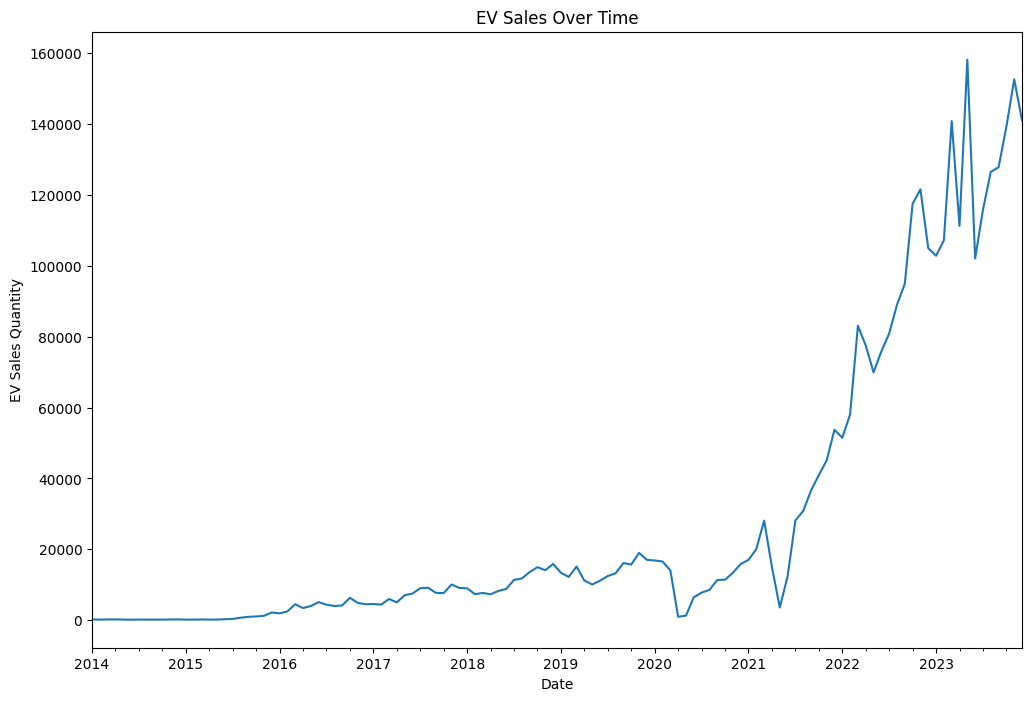

In [18]:
date_correlation = df.groupby('Date')['EV_Sales_Quantity'].sum()
date_correlation.plot(kind='line', figsize=(12,8))
plt.title('EV Sales Over Time')
plt.xlabel('Date')
plt.ylabel('EV Sales Quantity')
plt.show()



**Growth rate of EV sales year-over-year**

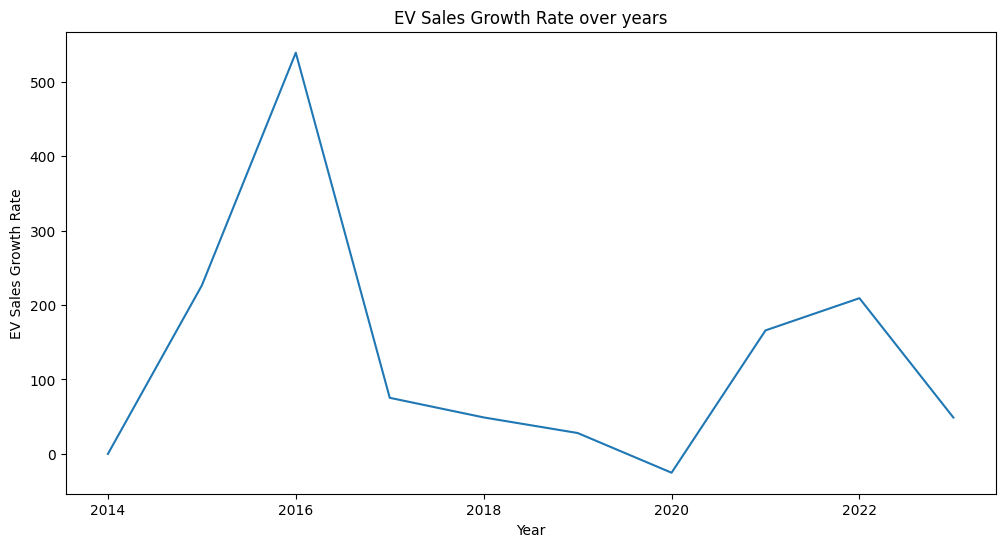

In [19]:
annual_sales = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

# Calculate the year-over-year percentage change
annual_sales['Growth_Rate'] = annual_sales['EV_Sales_Quantity'].pct_change().fillna(0) * 100
plt.figure(figsize=(12,6))
sns.lineplot(data=annual_sales,x='Year',y='Growth_Rate')
plt.title('EV Sales Growth Rate over years')
plt.xlabel('Year')
plt.ylabel('EV Sales Growth Rate')
plt.show()


**Plotting Visualizations for Each State**

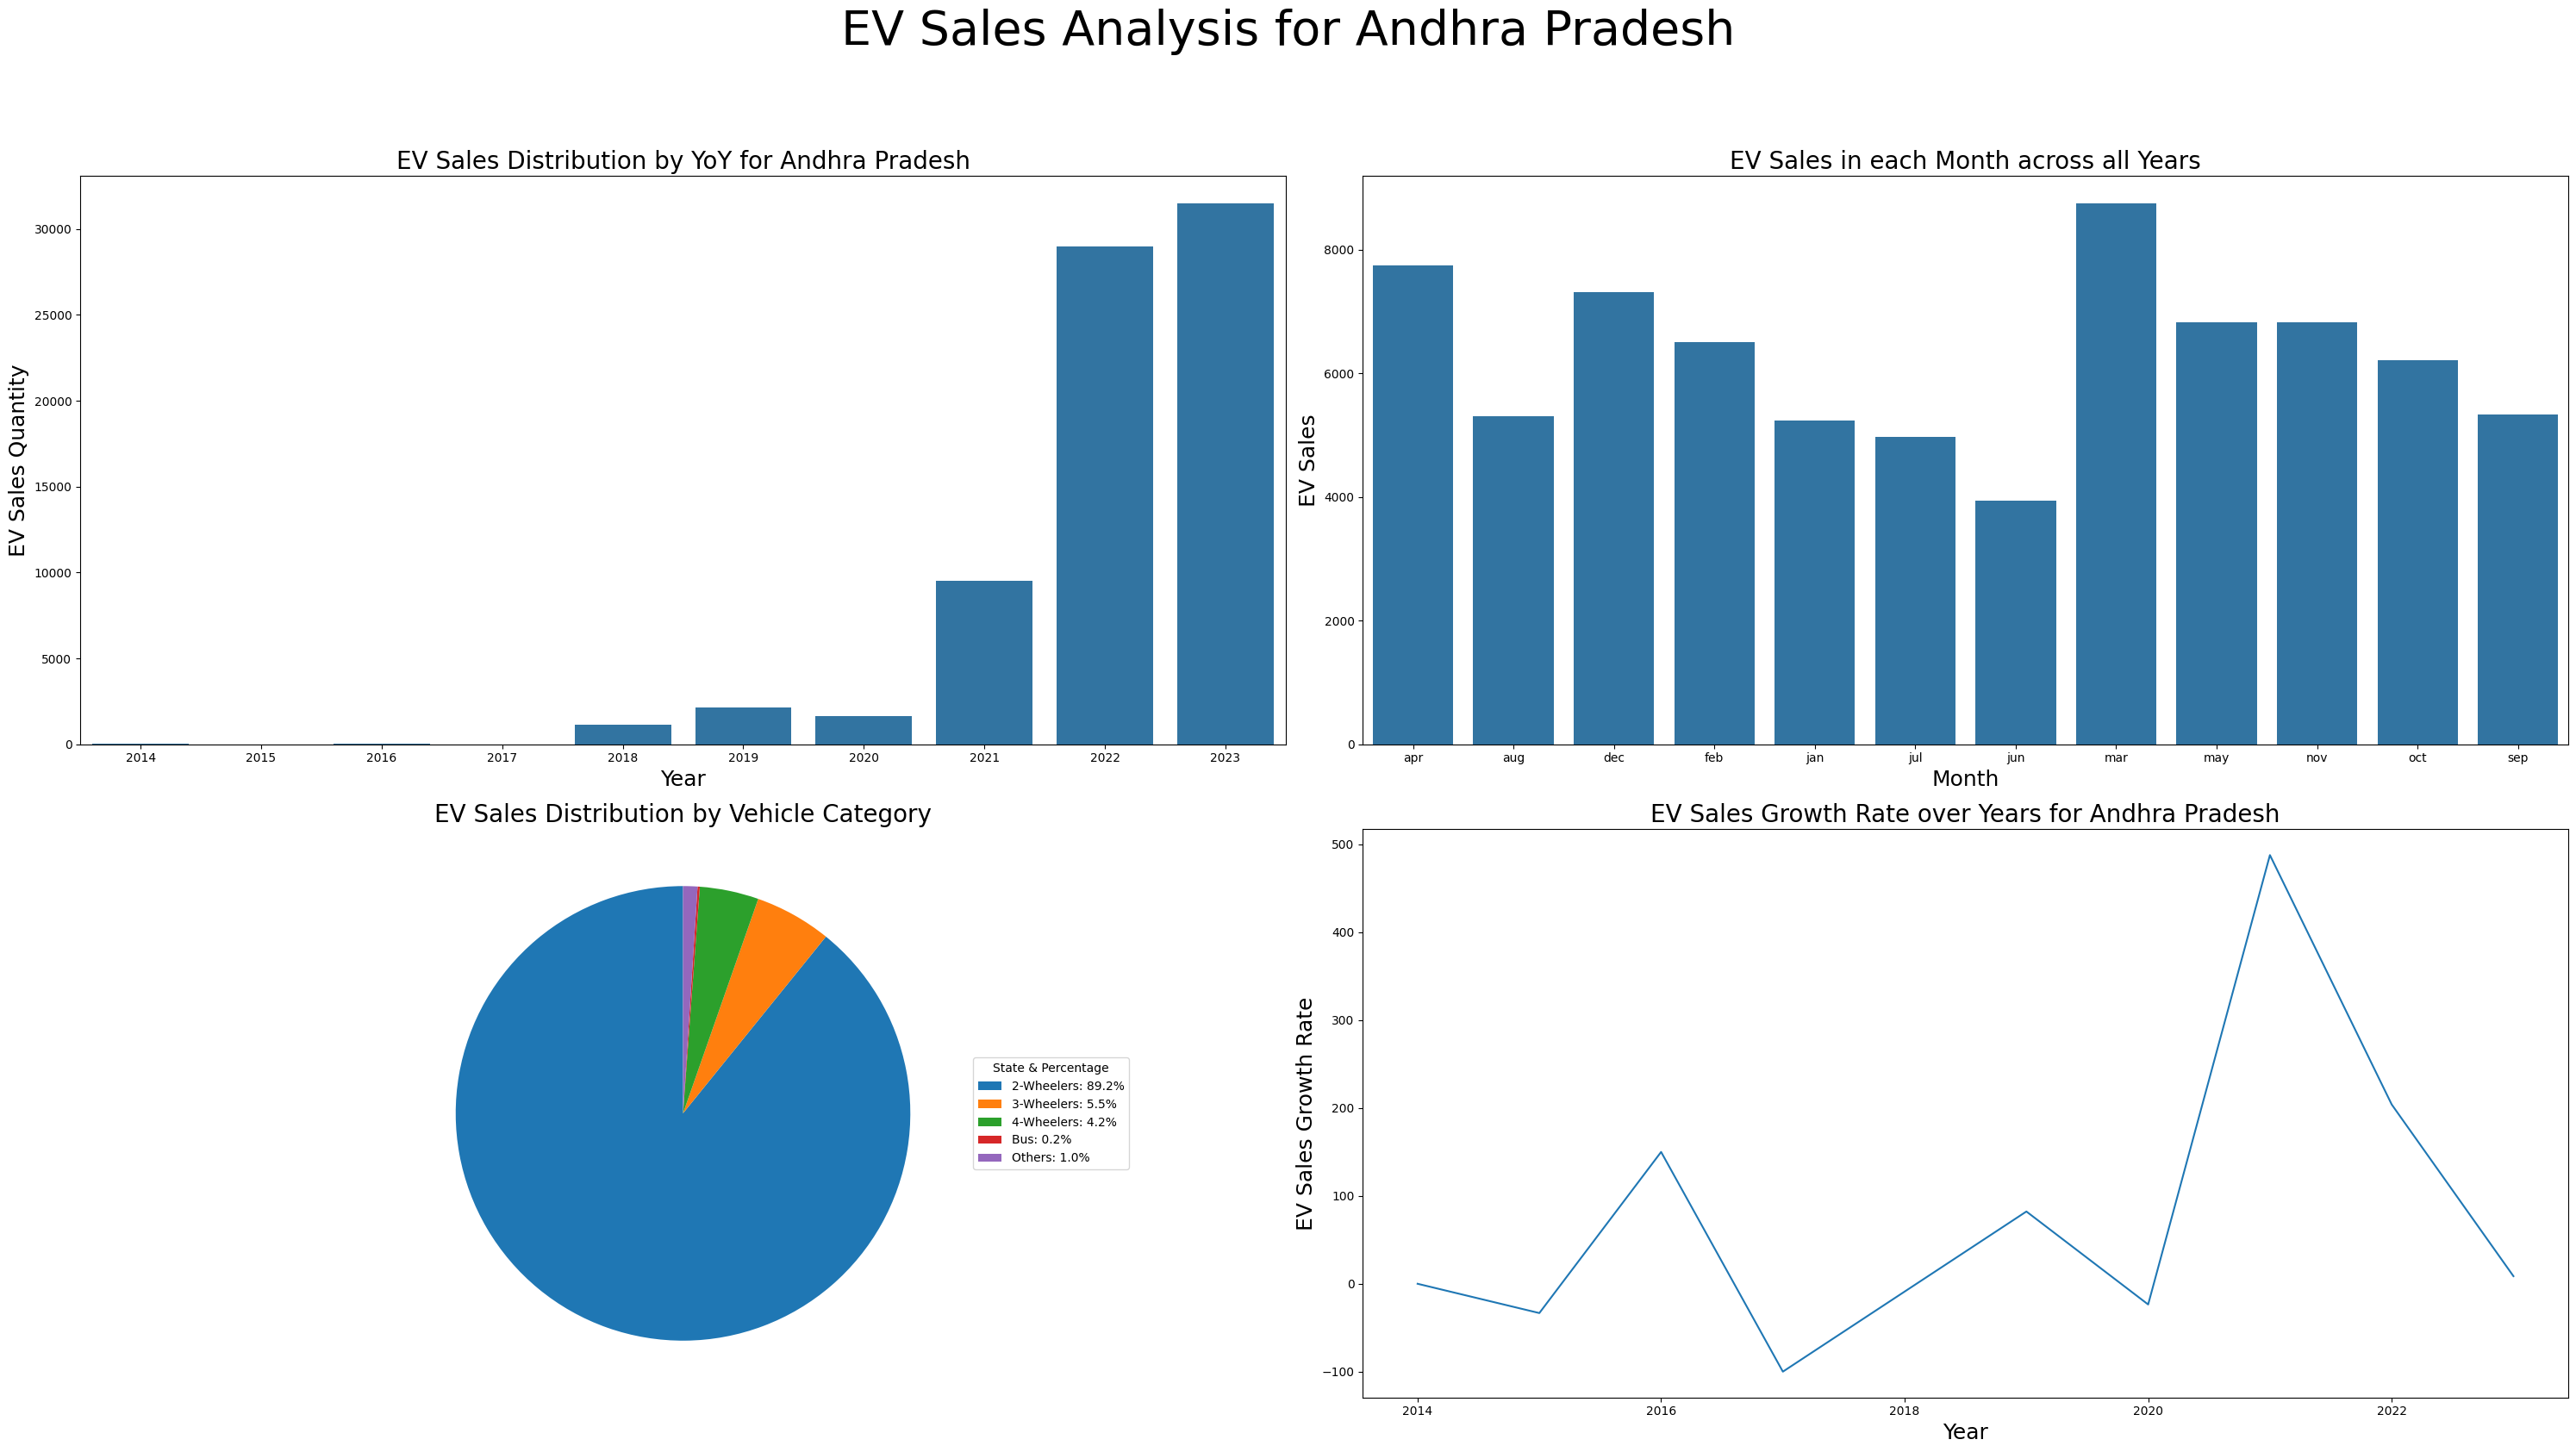

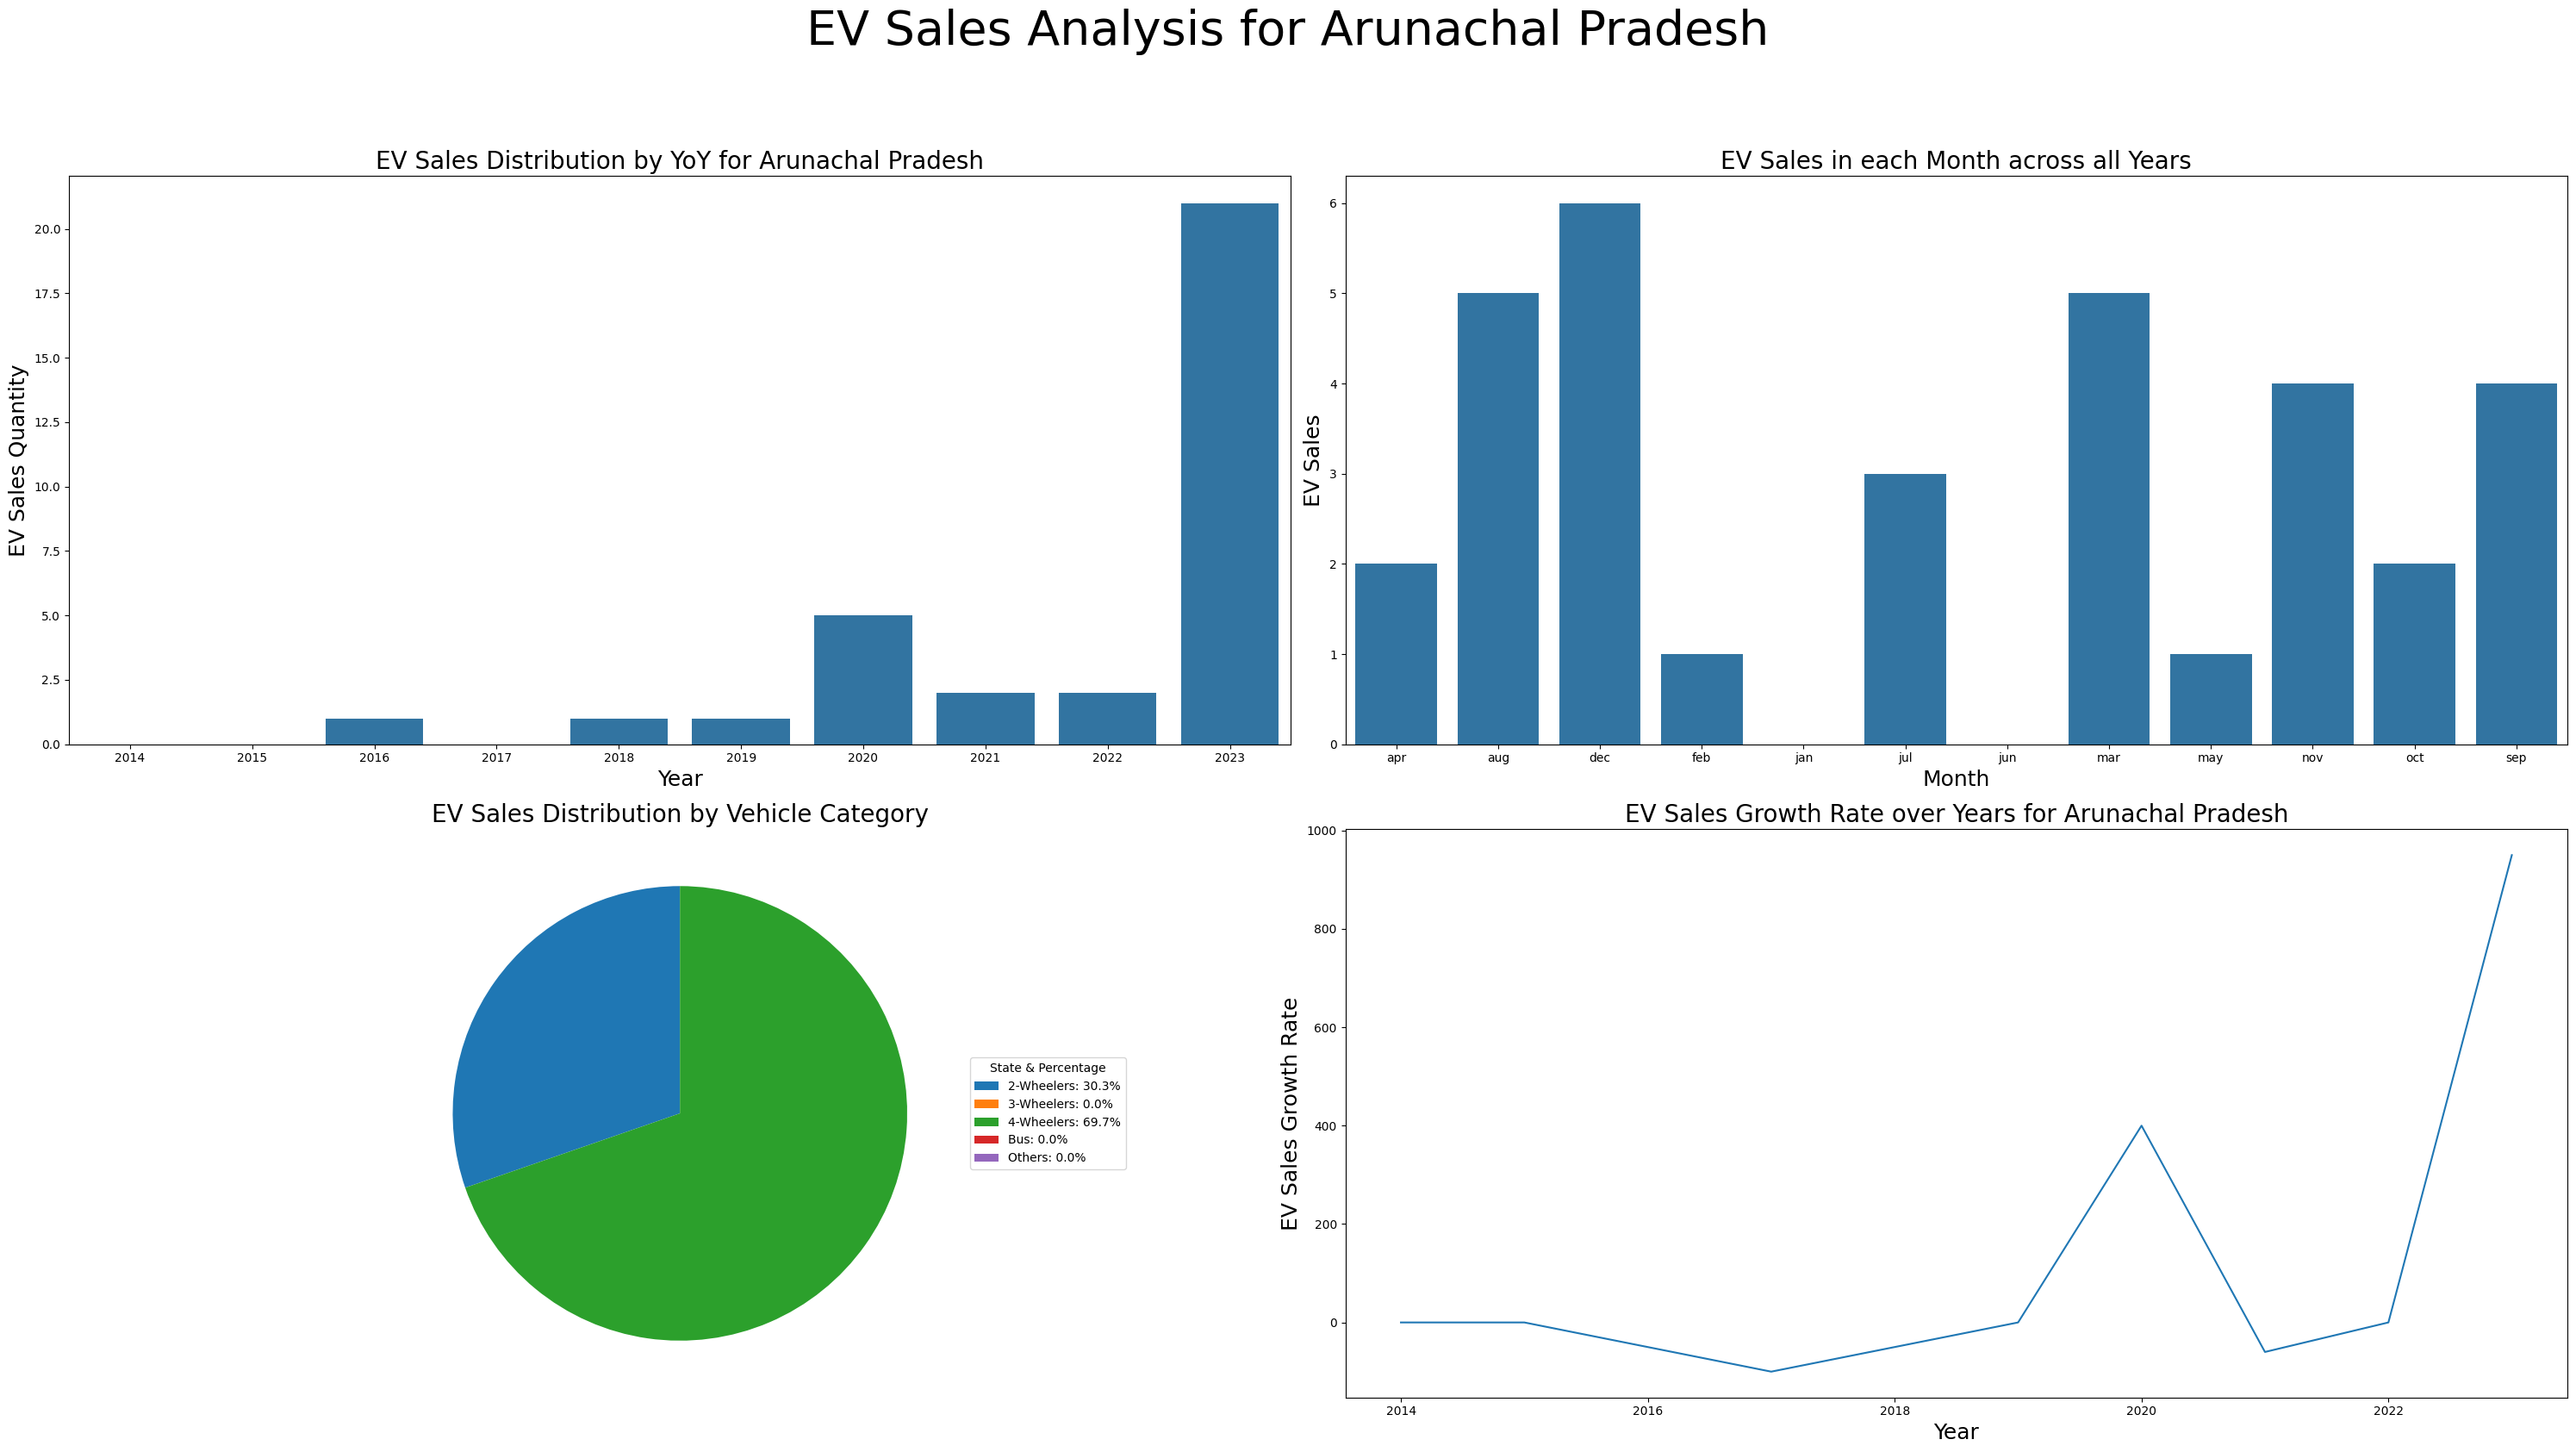

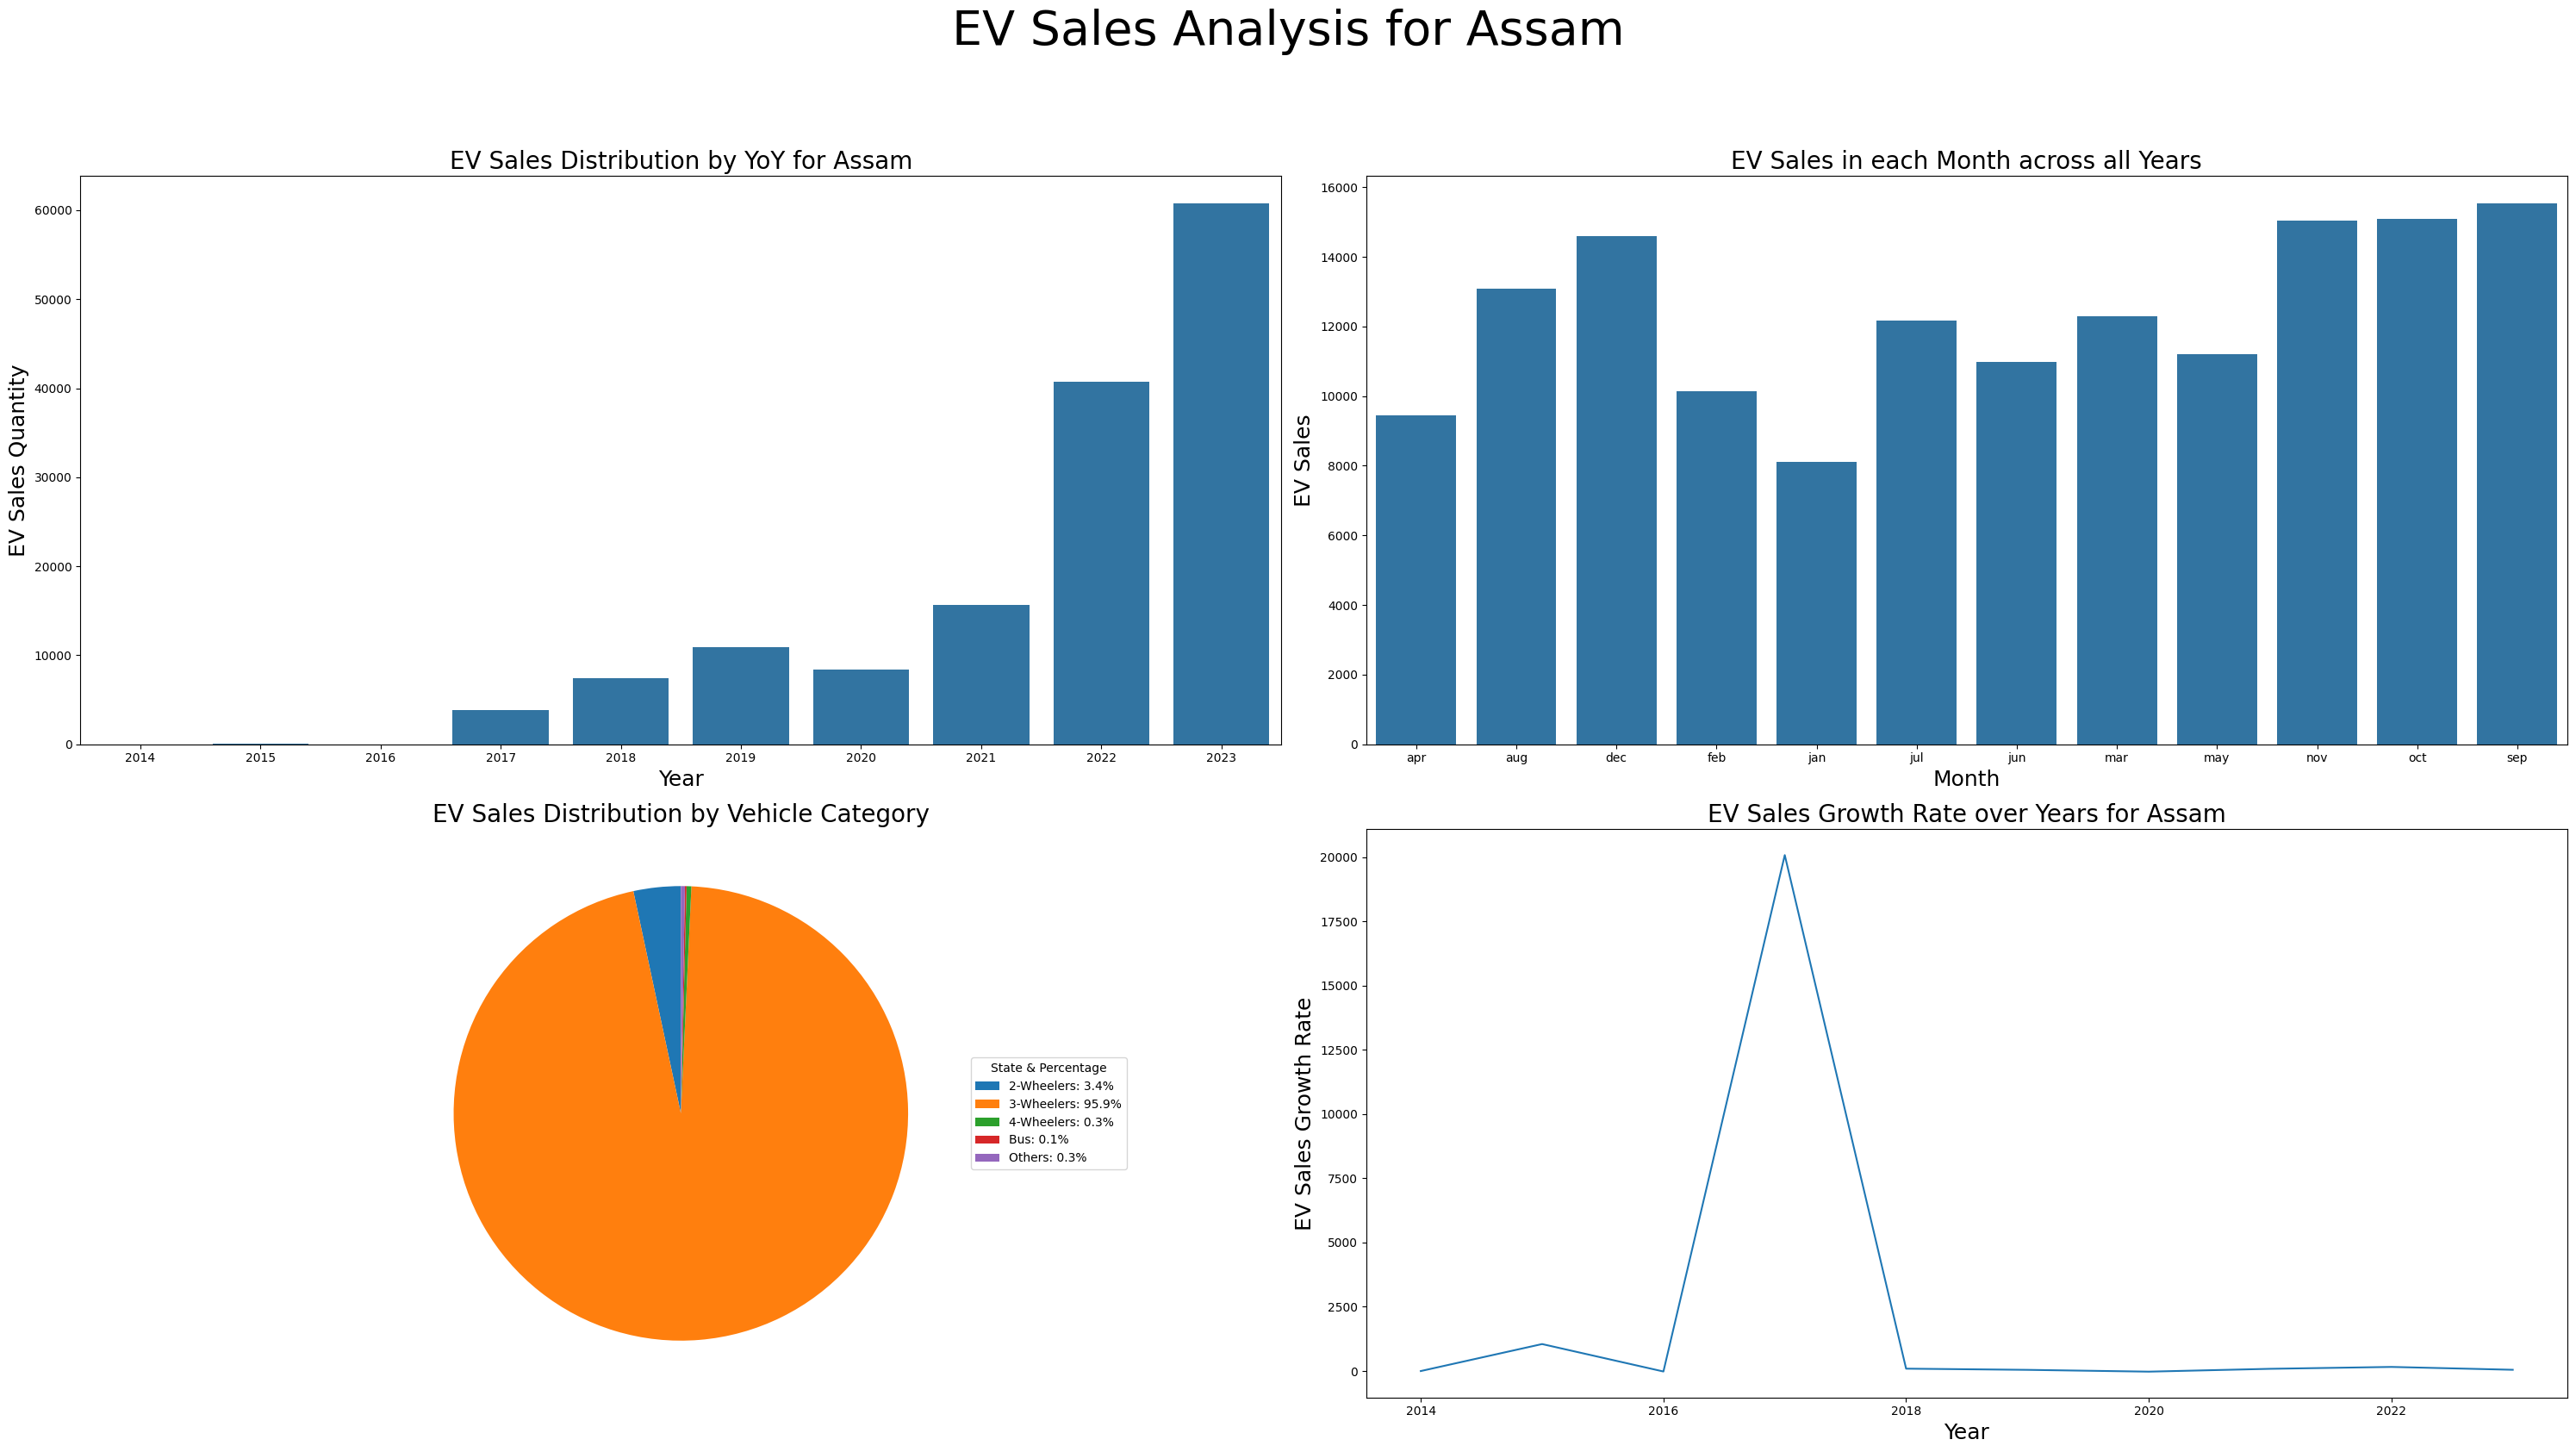

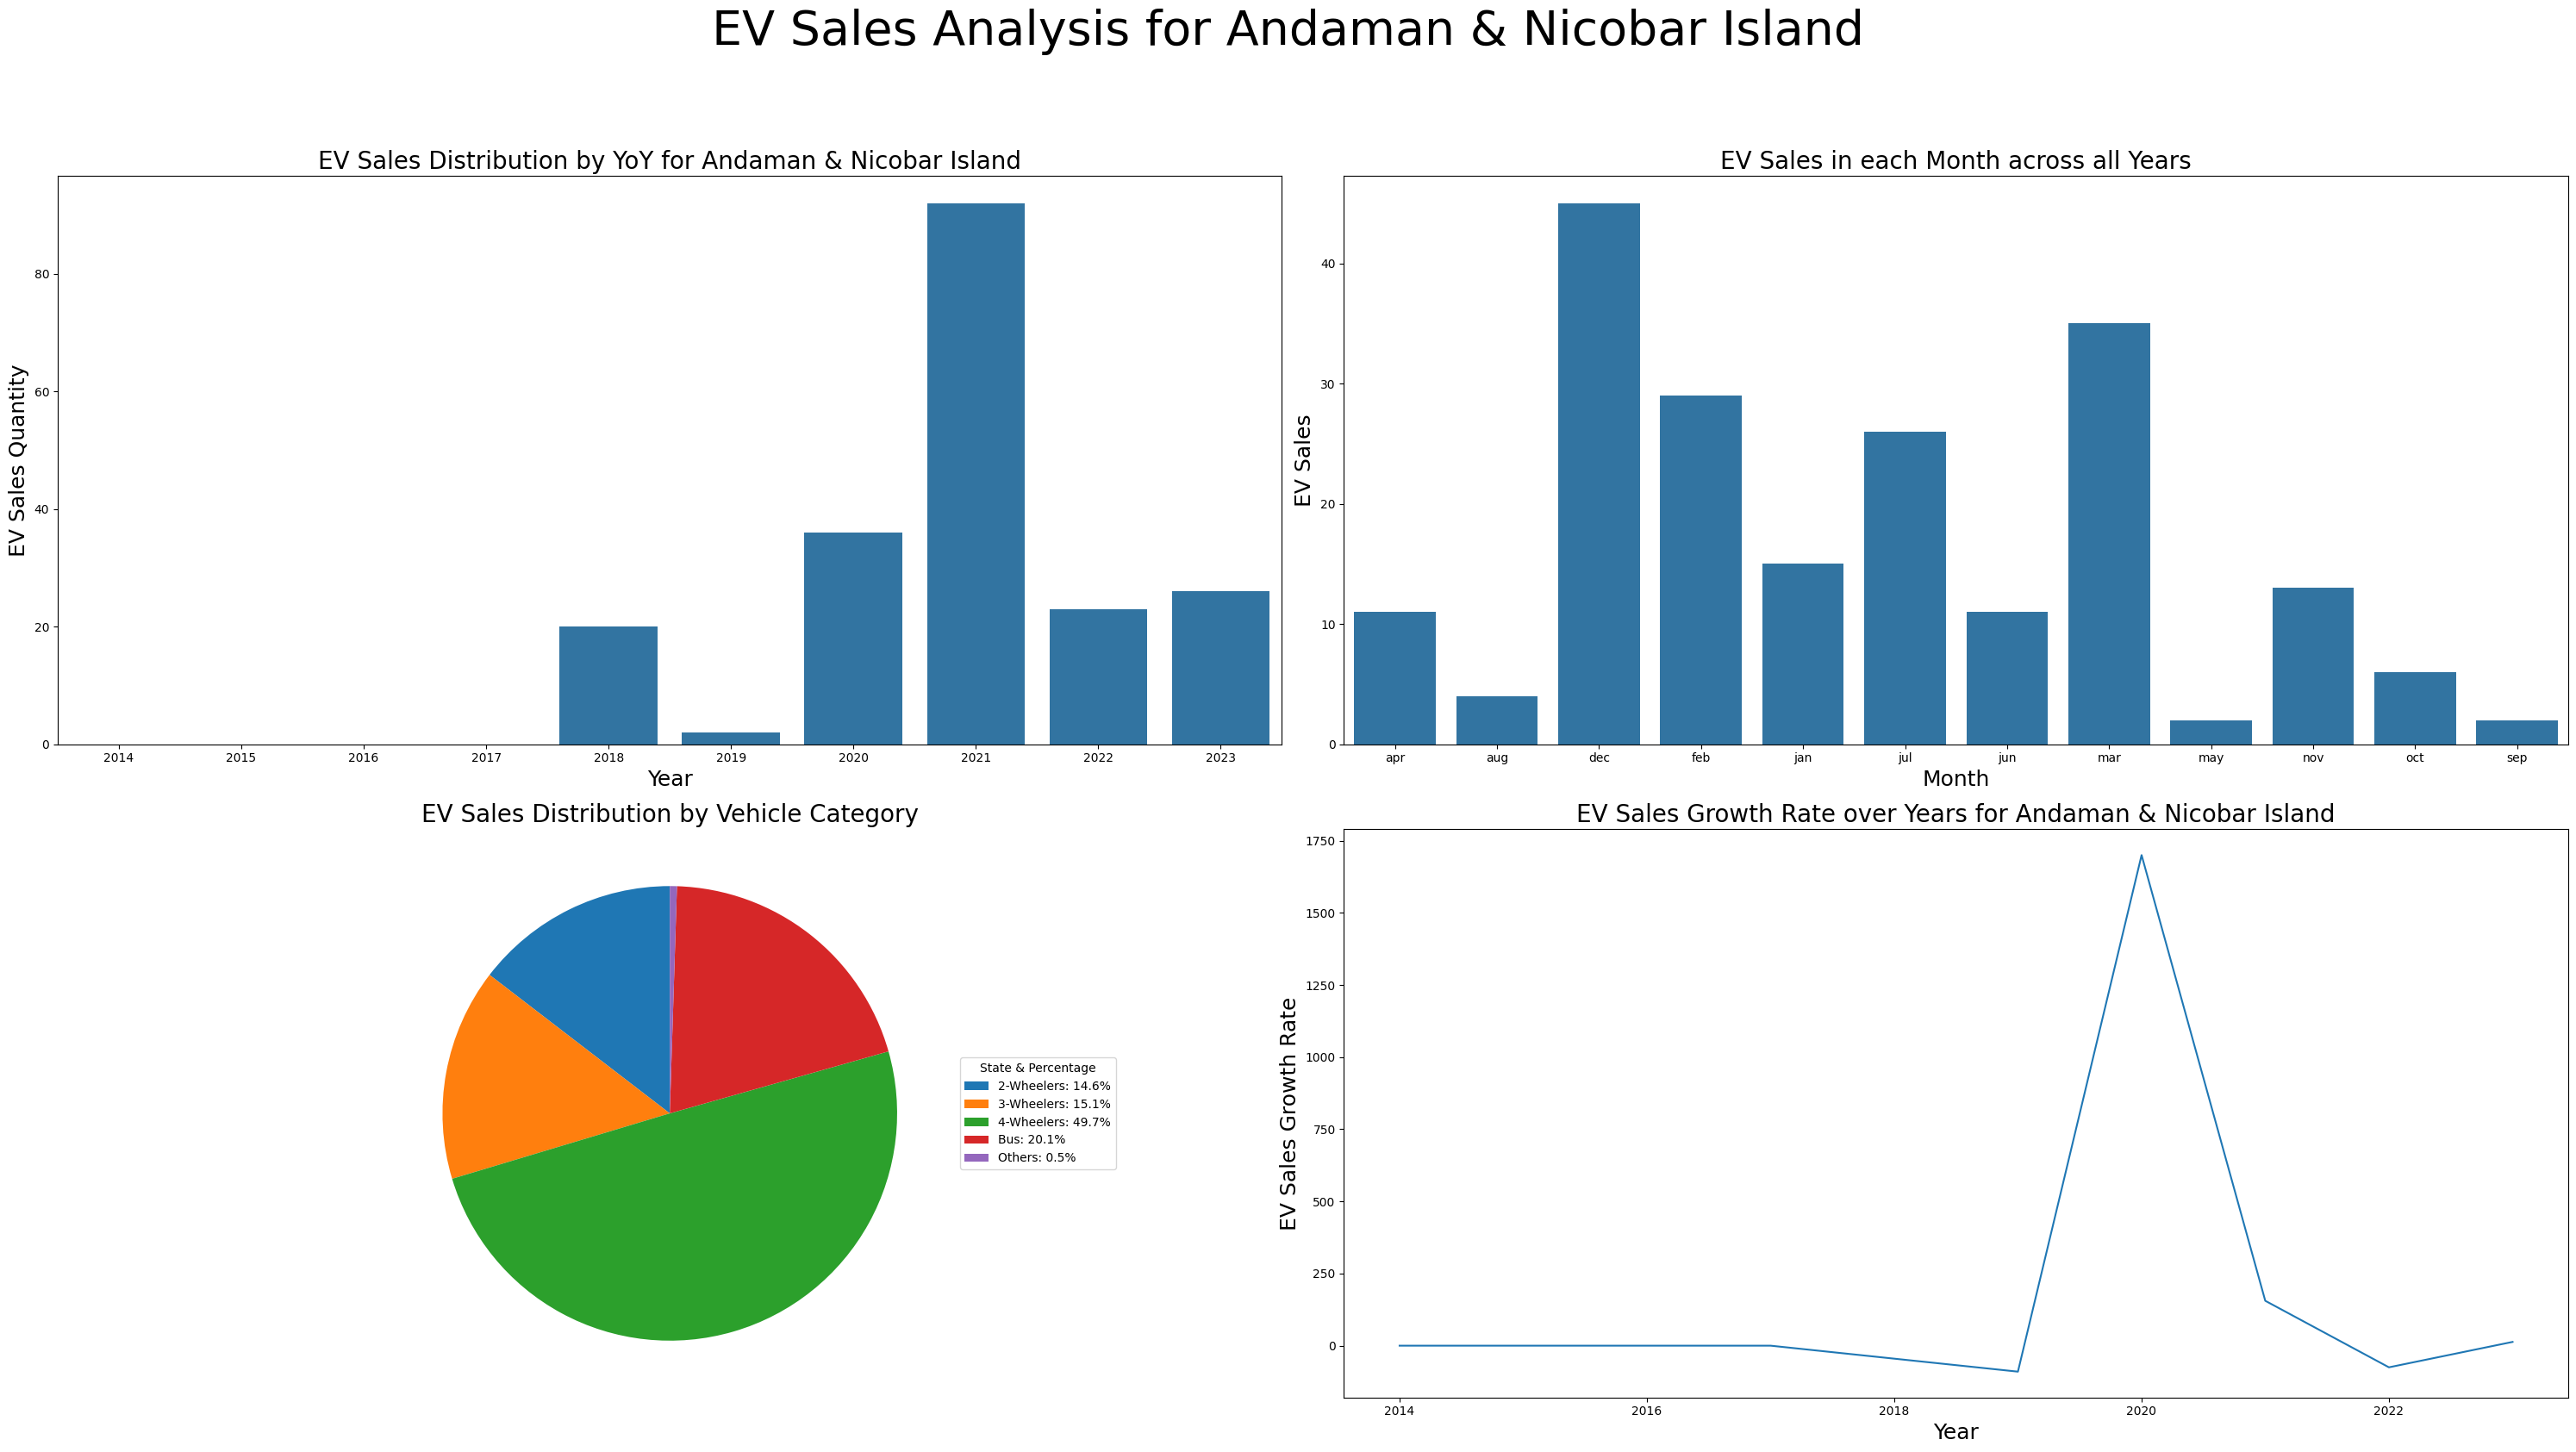

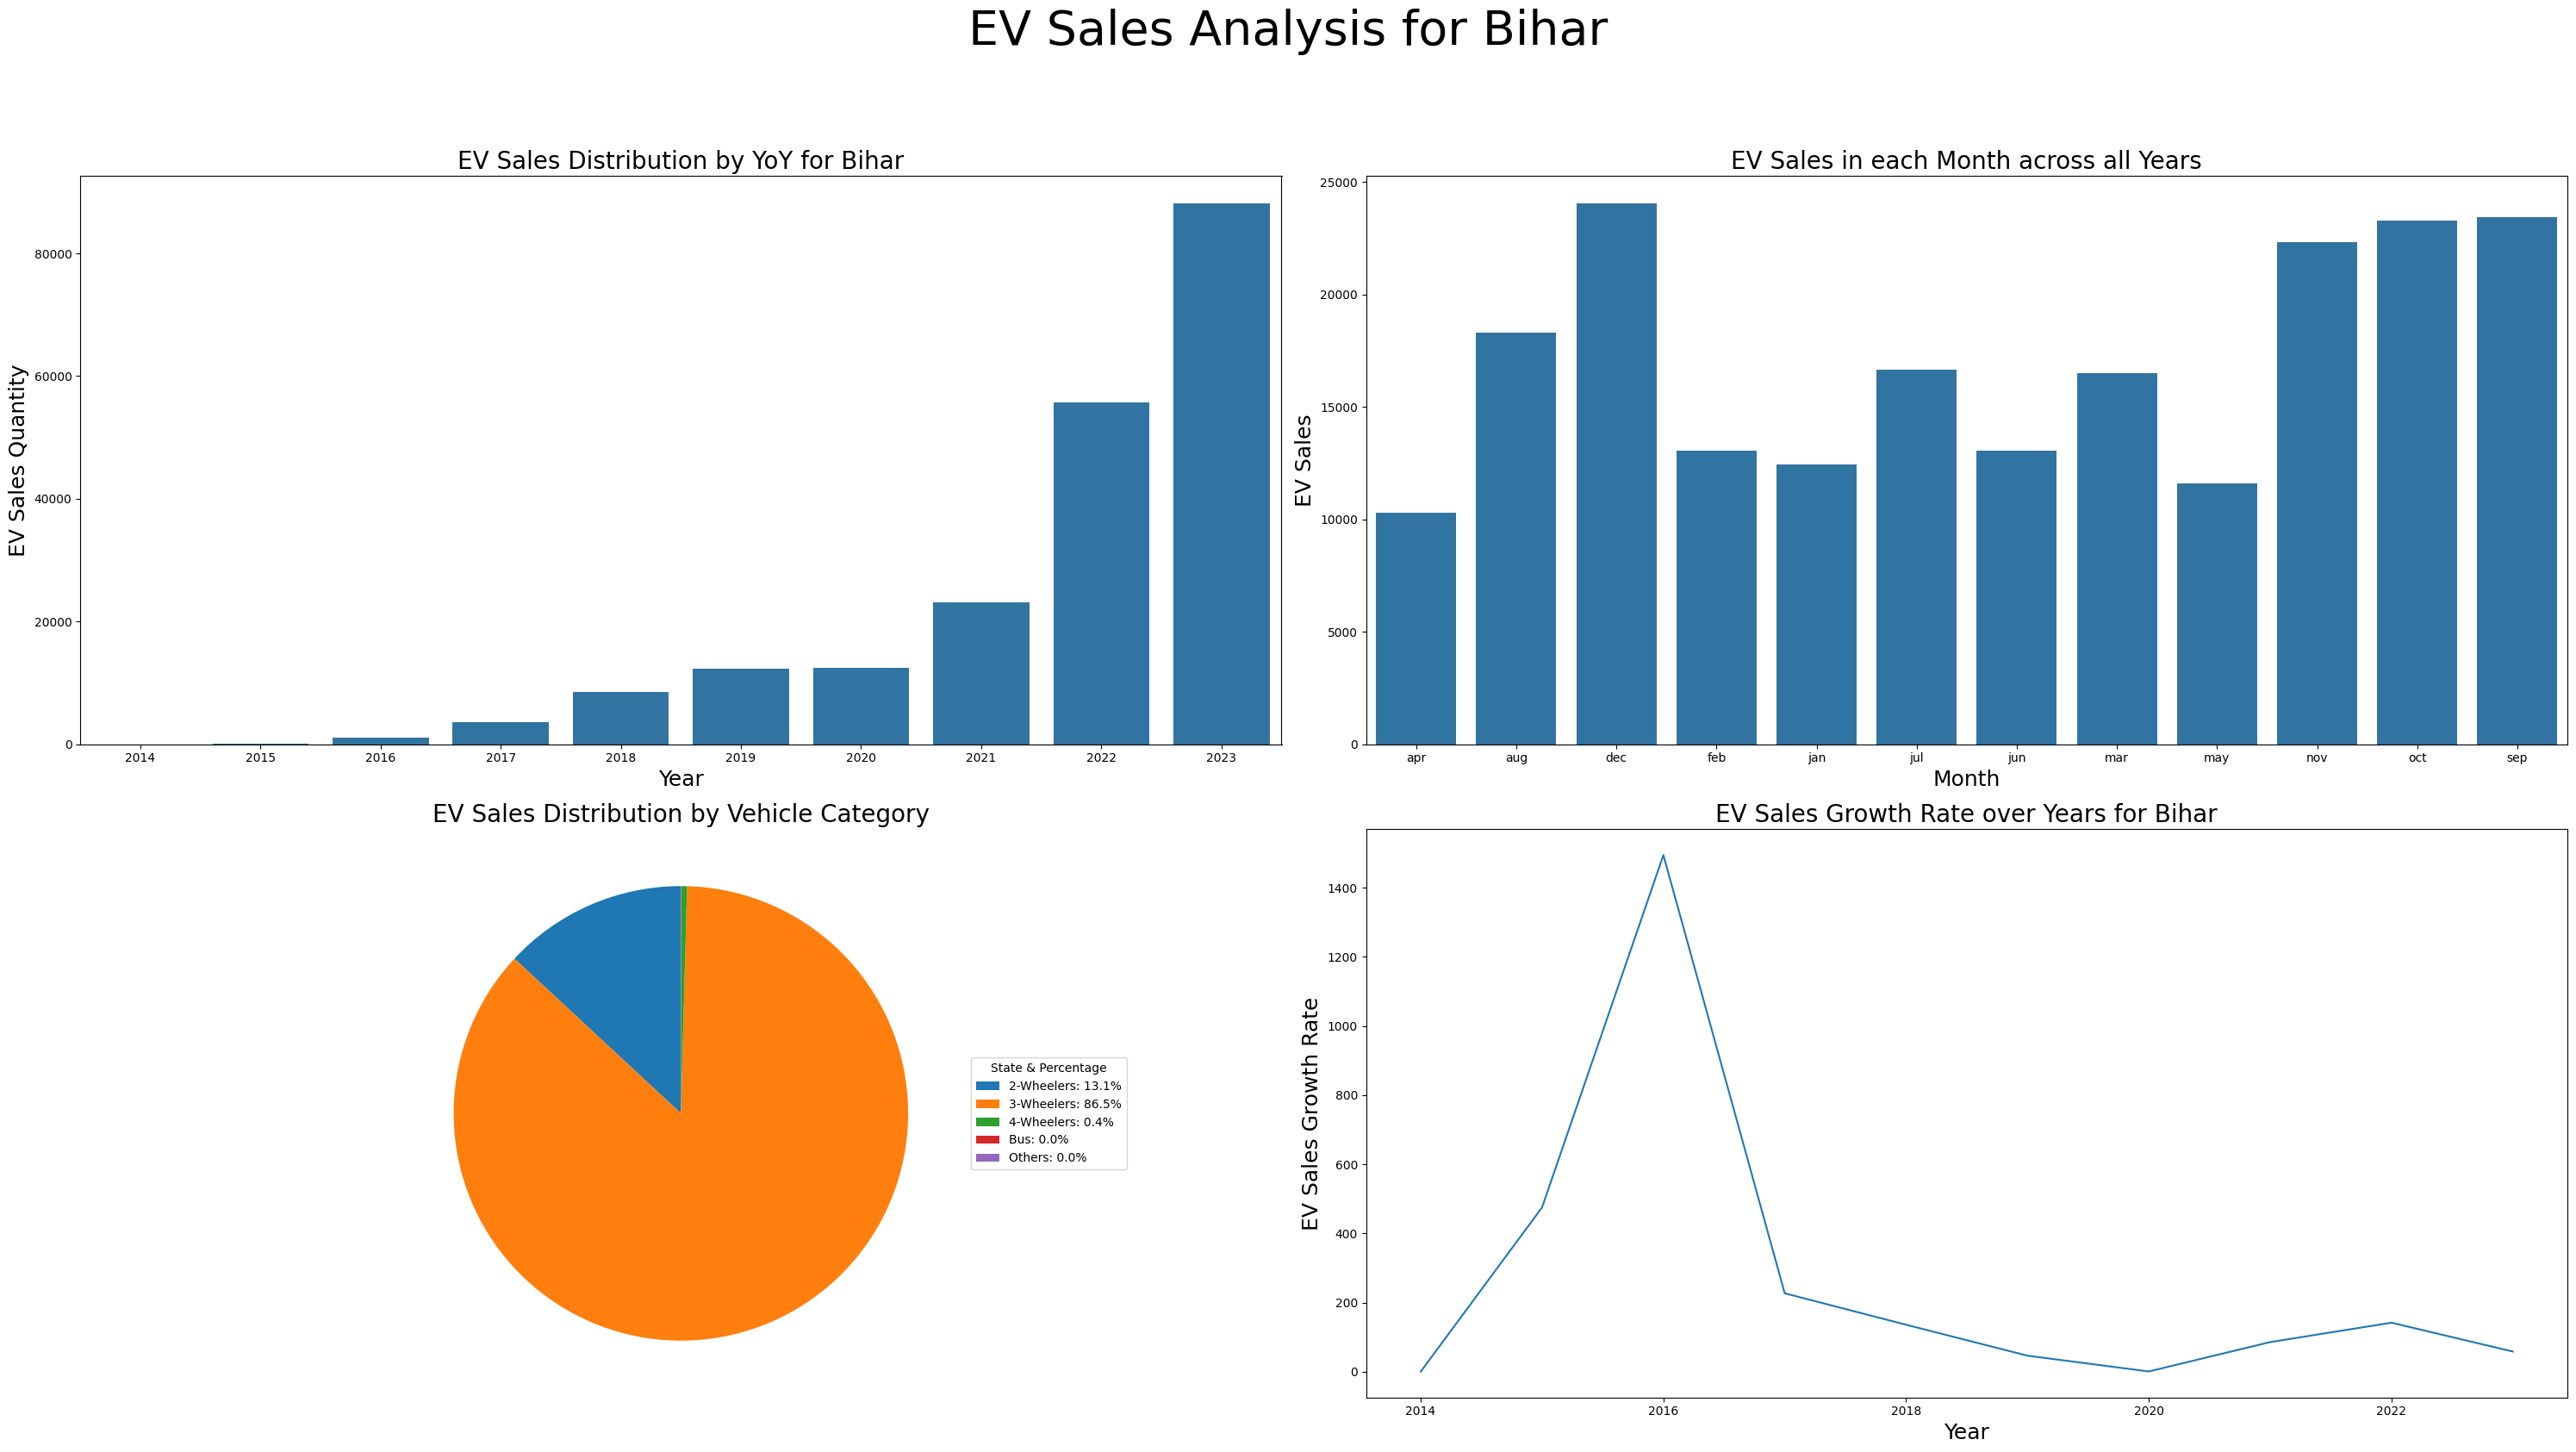

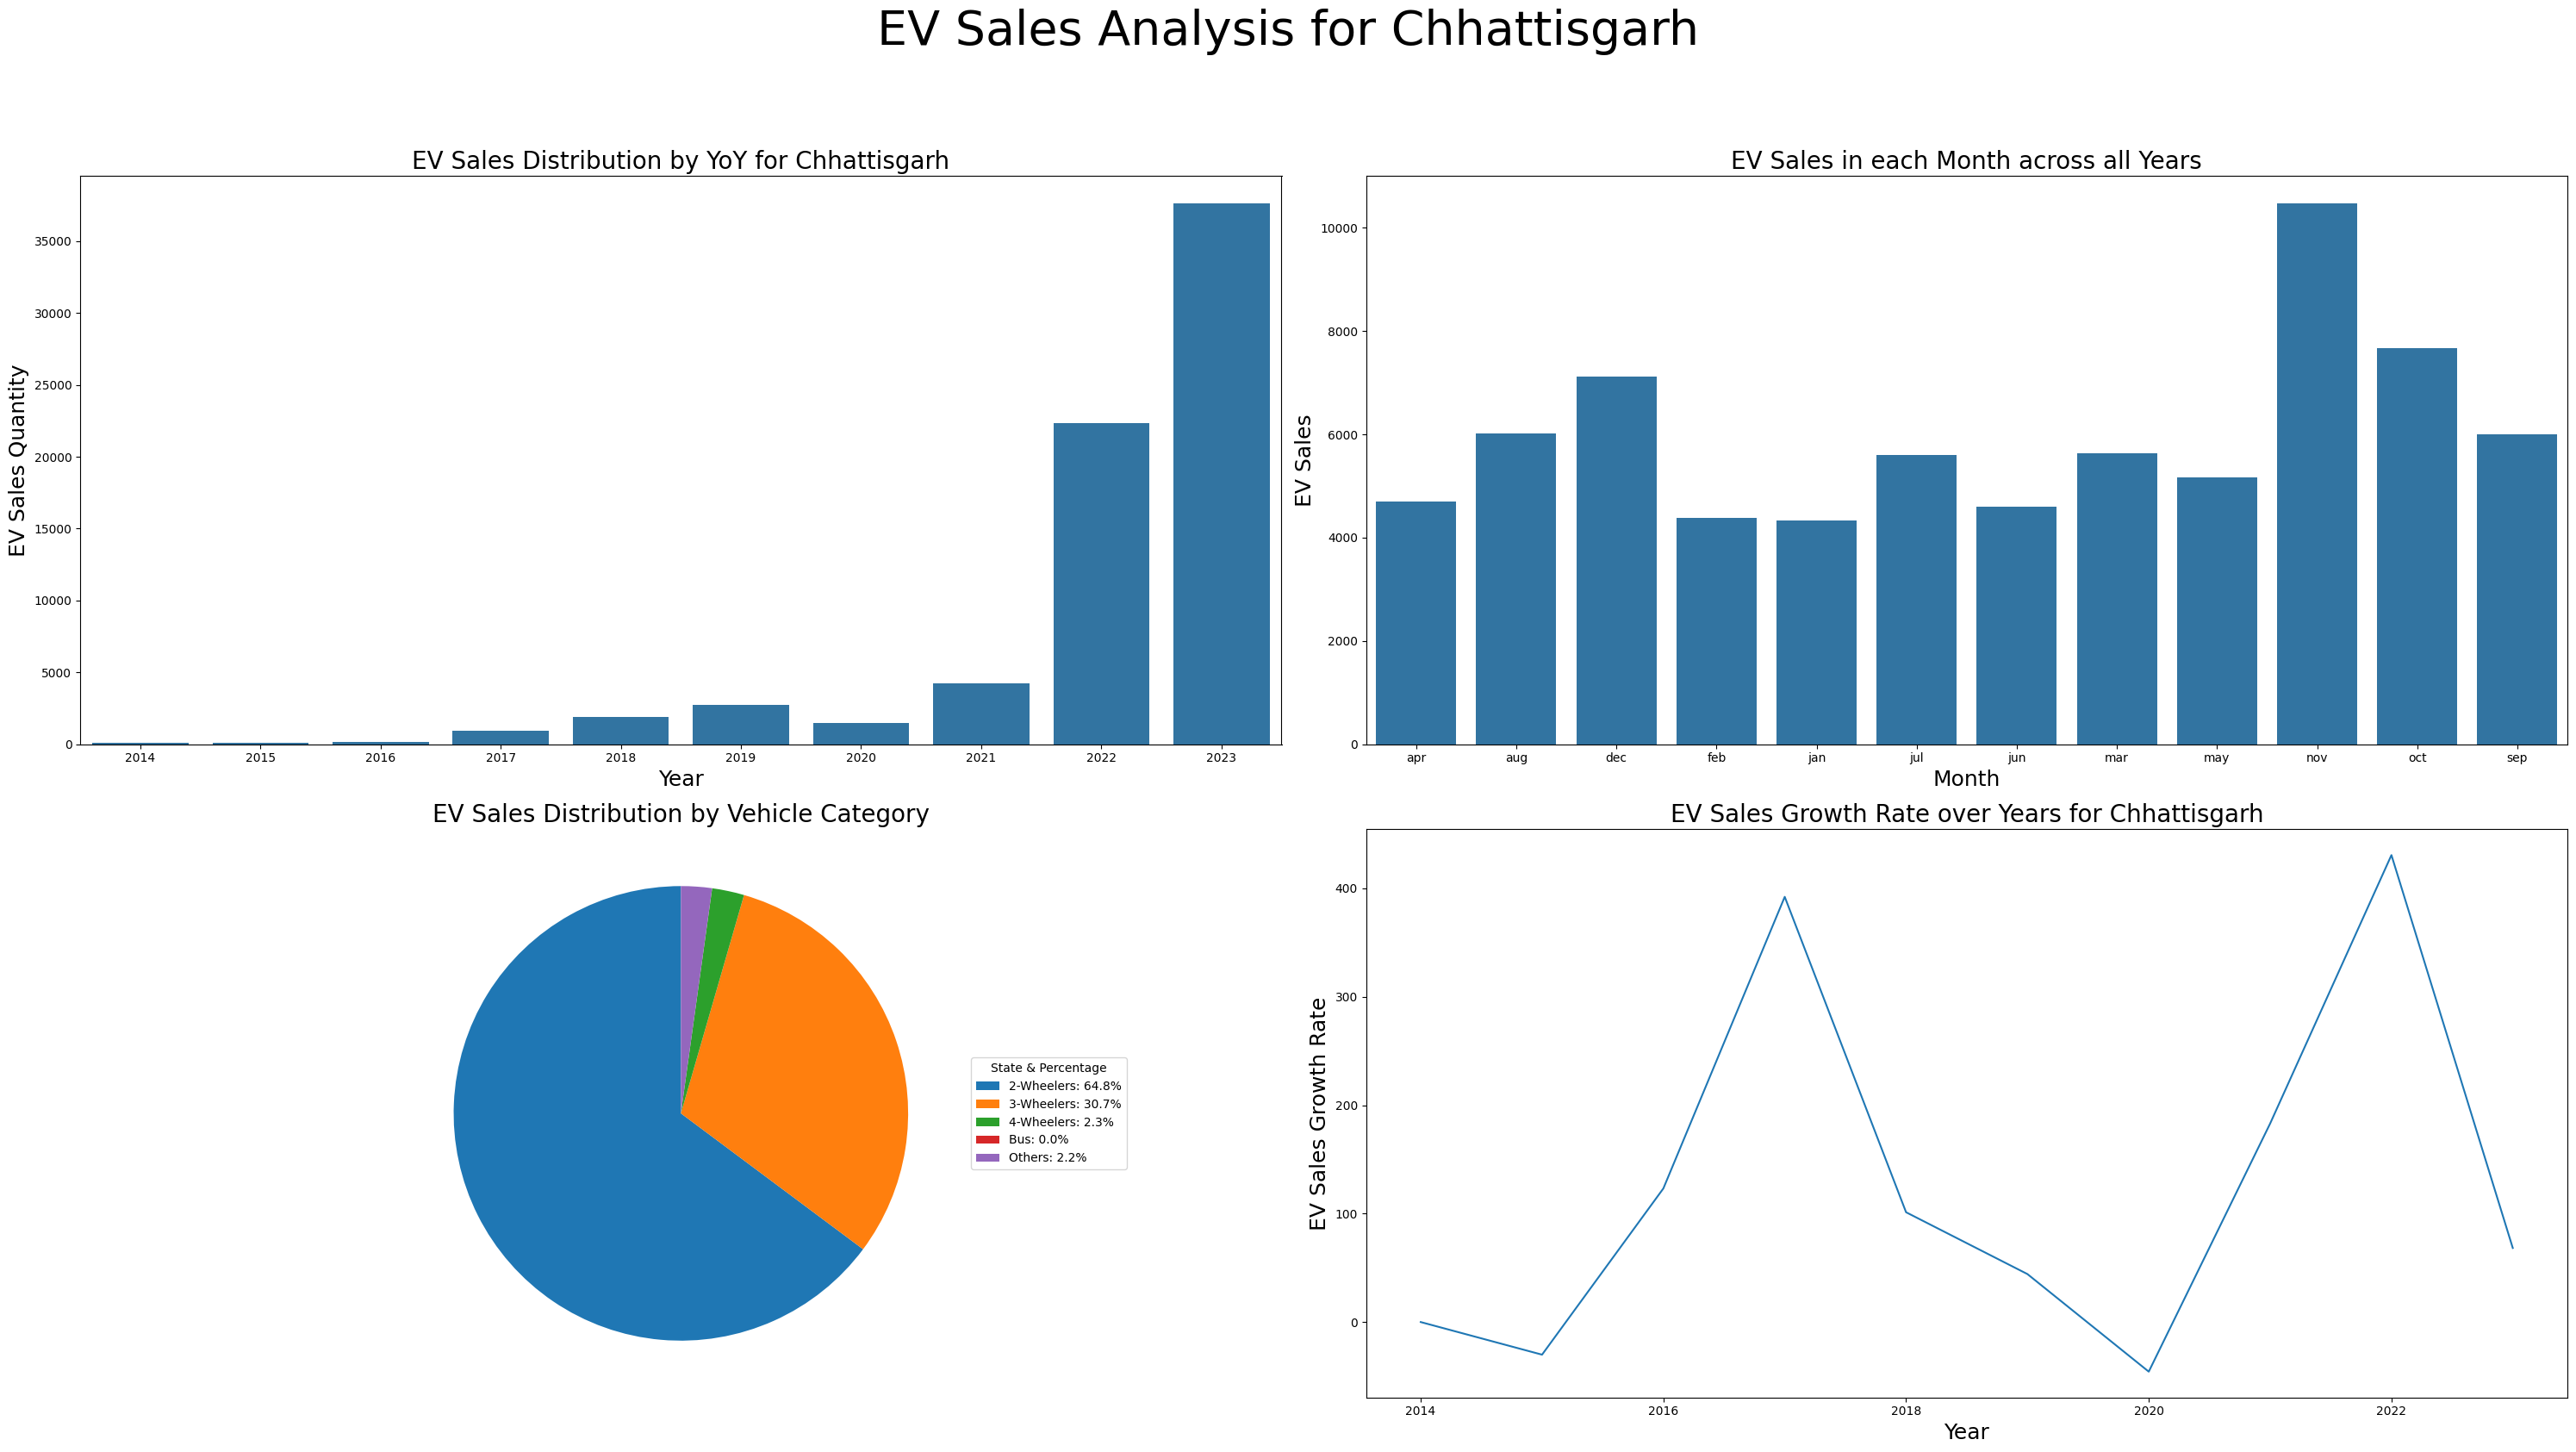

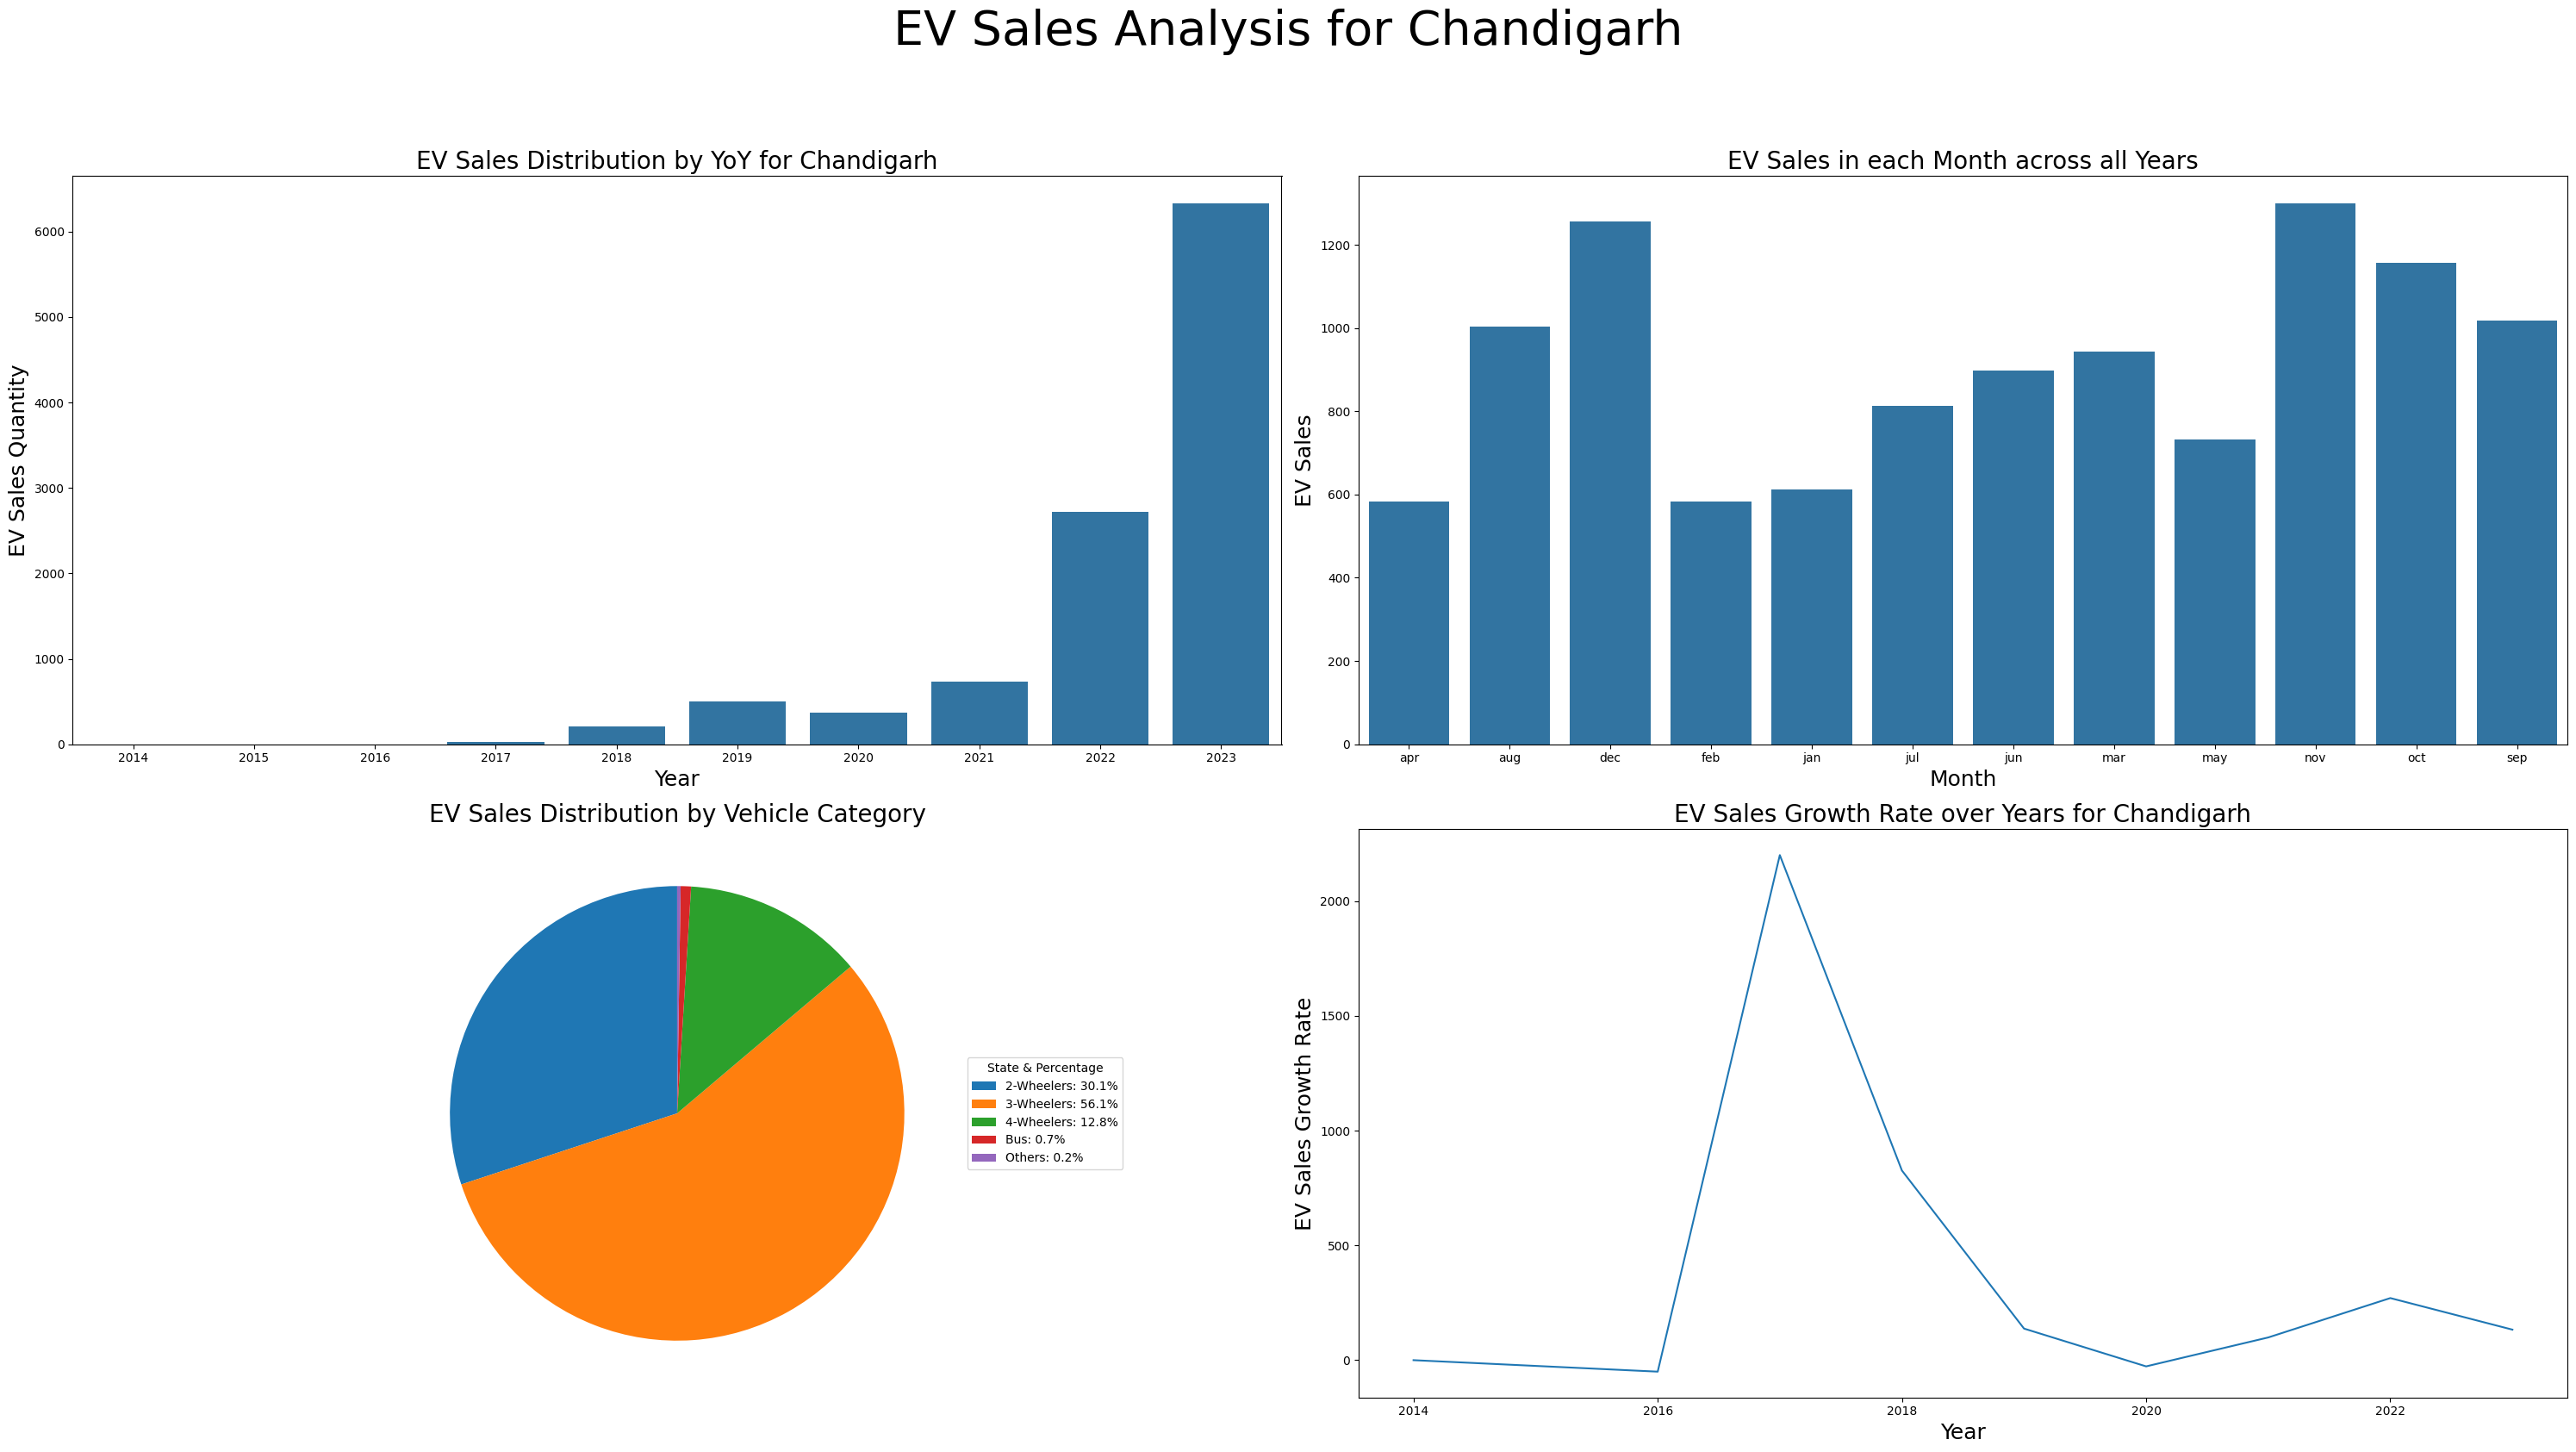

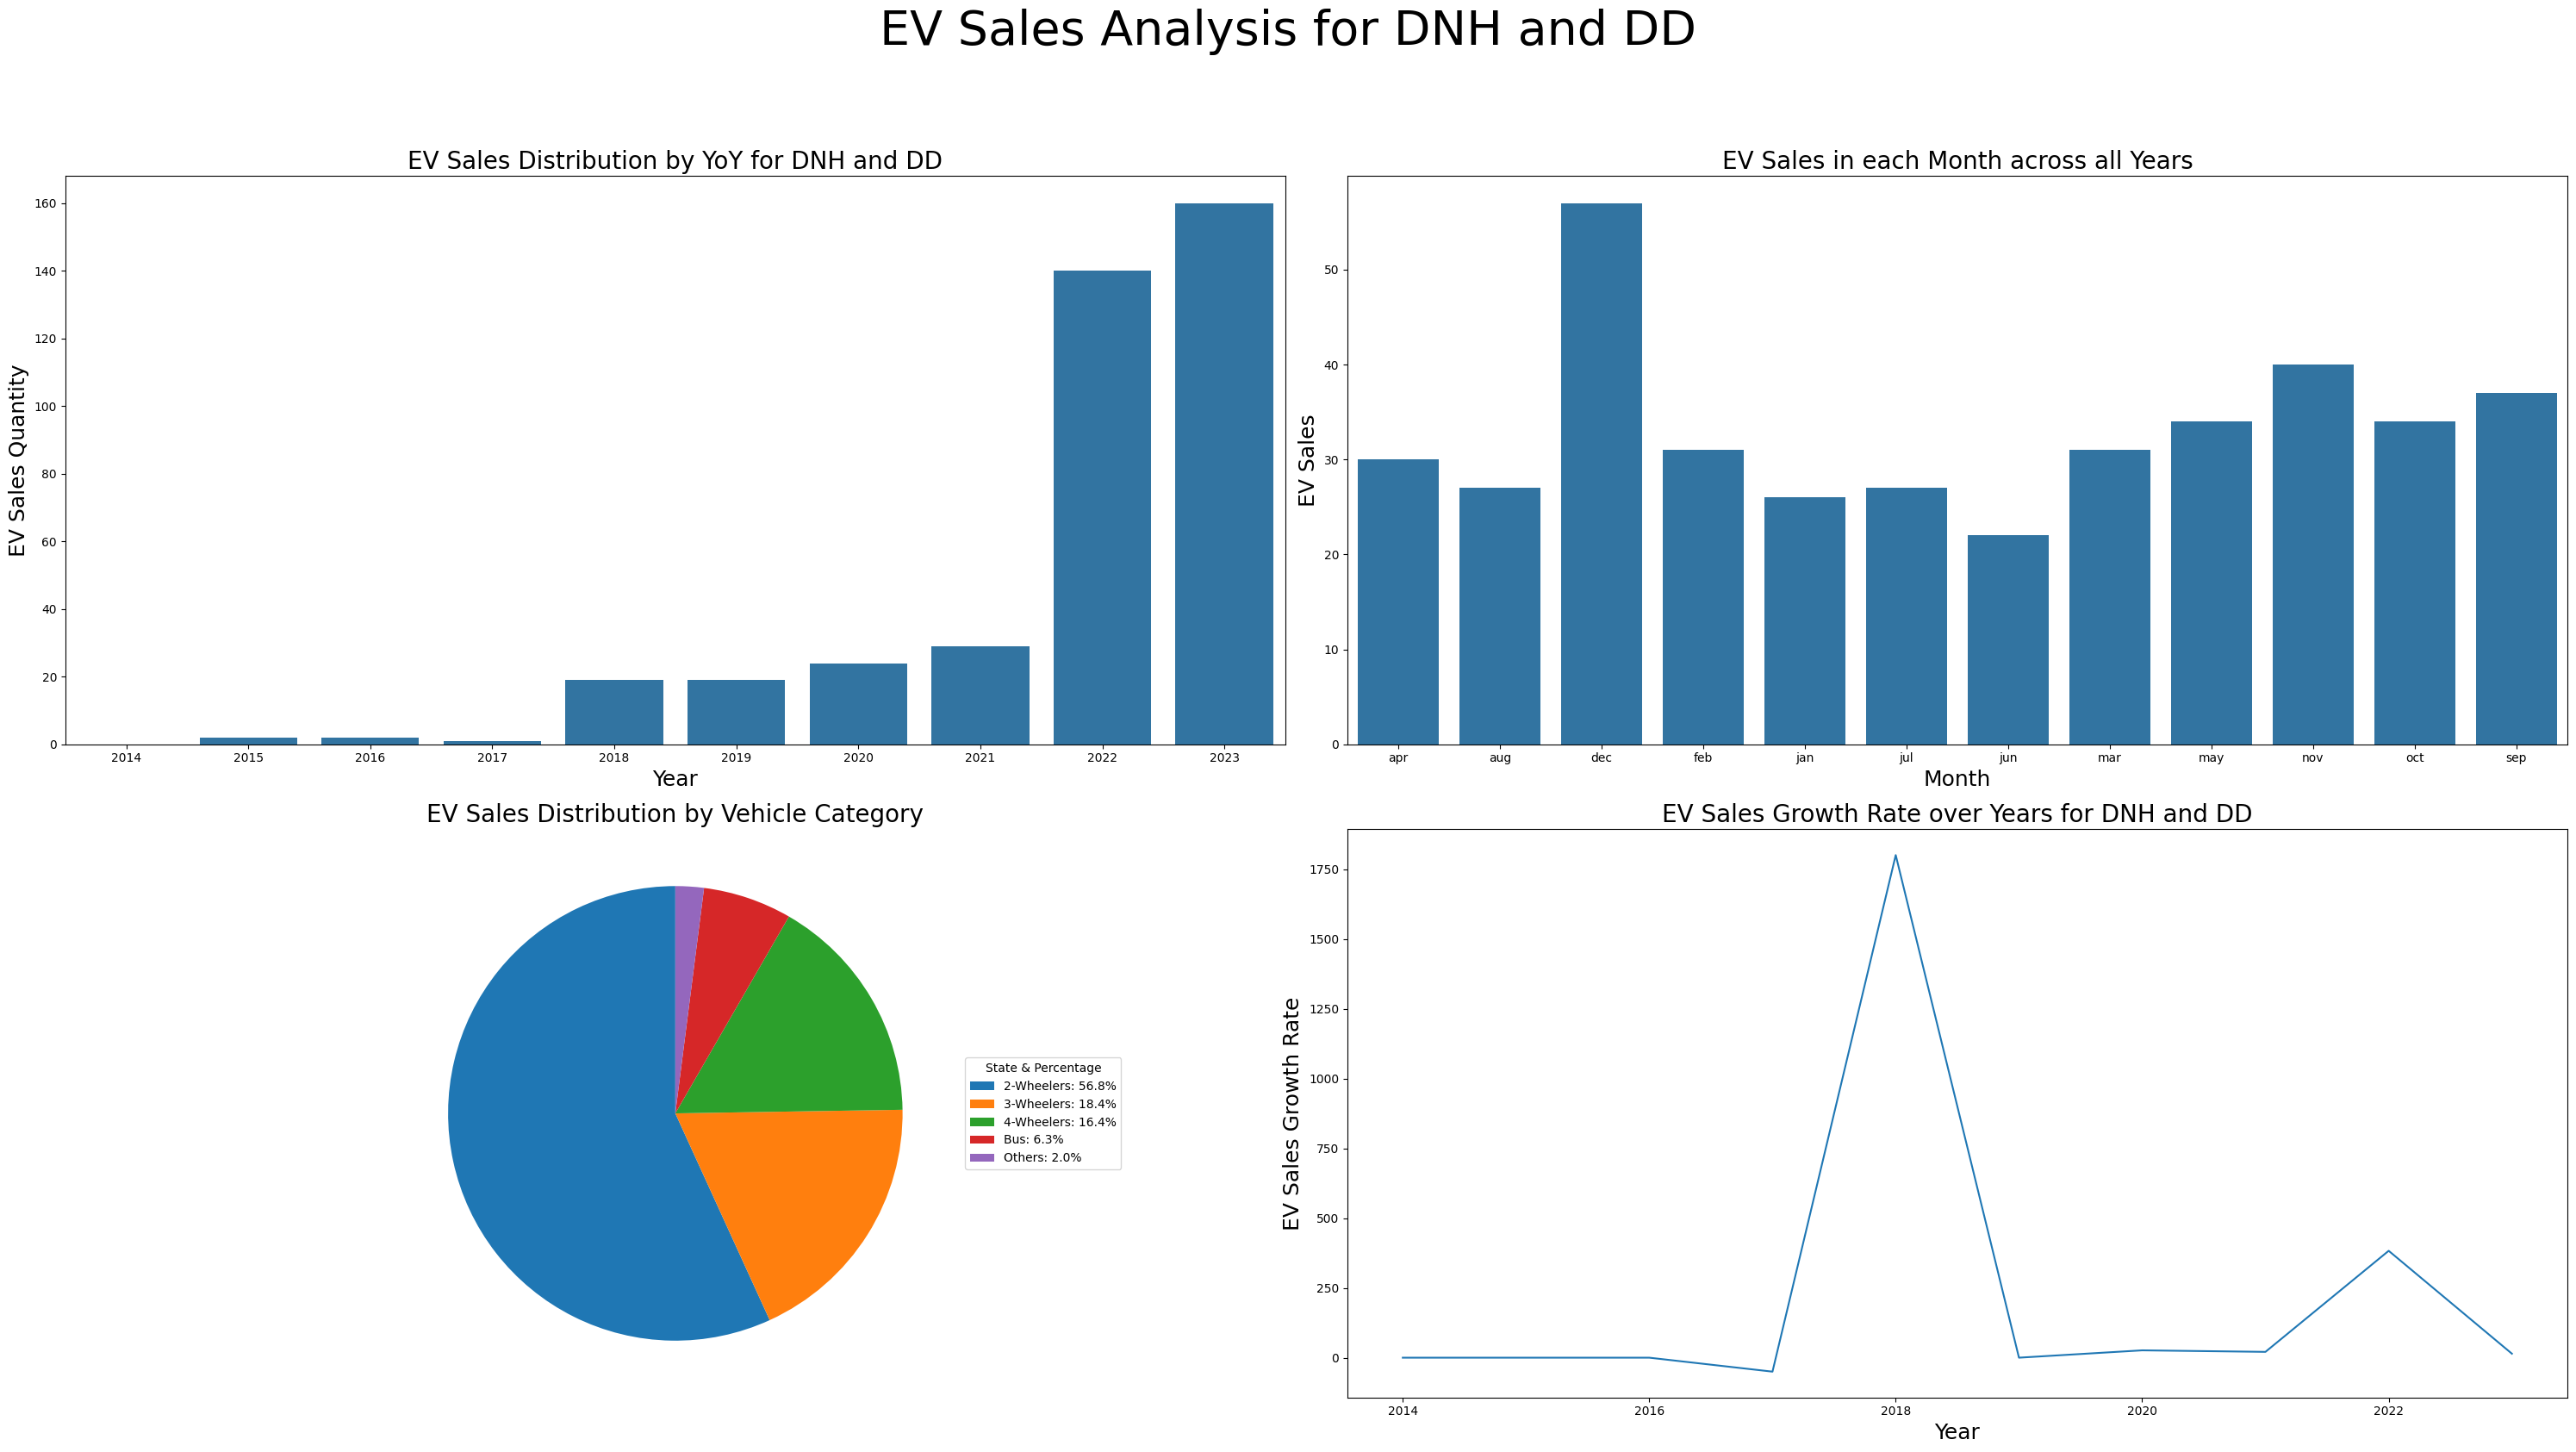

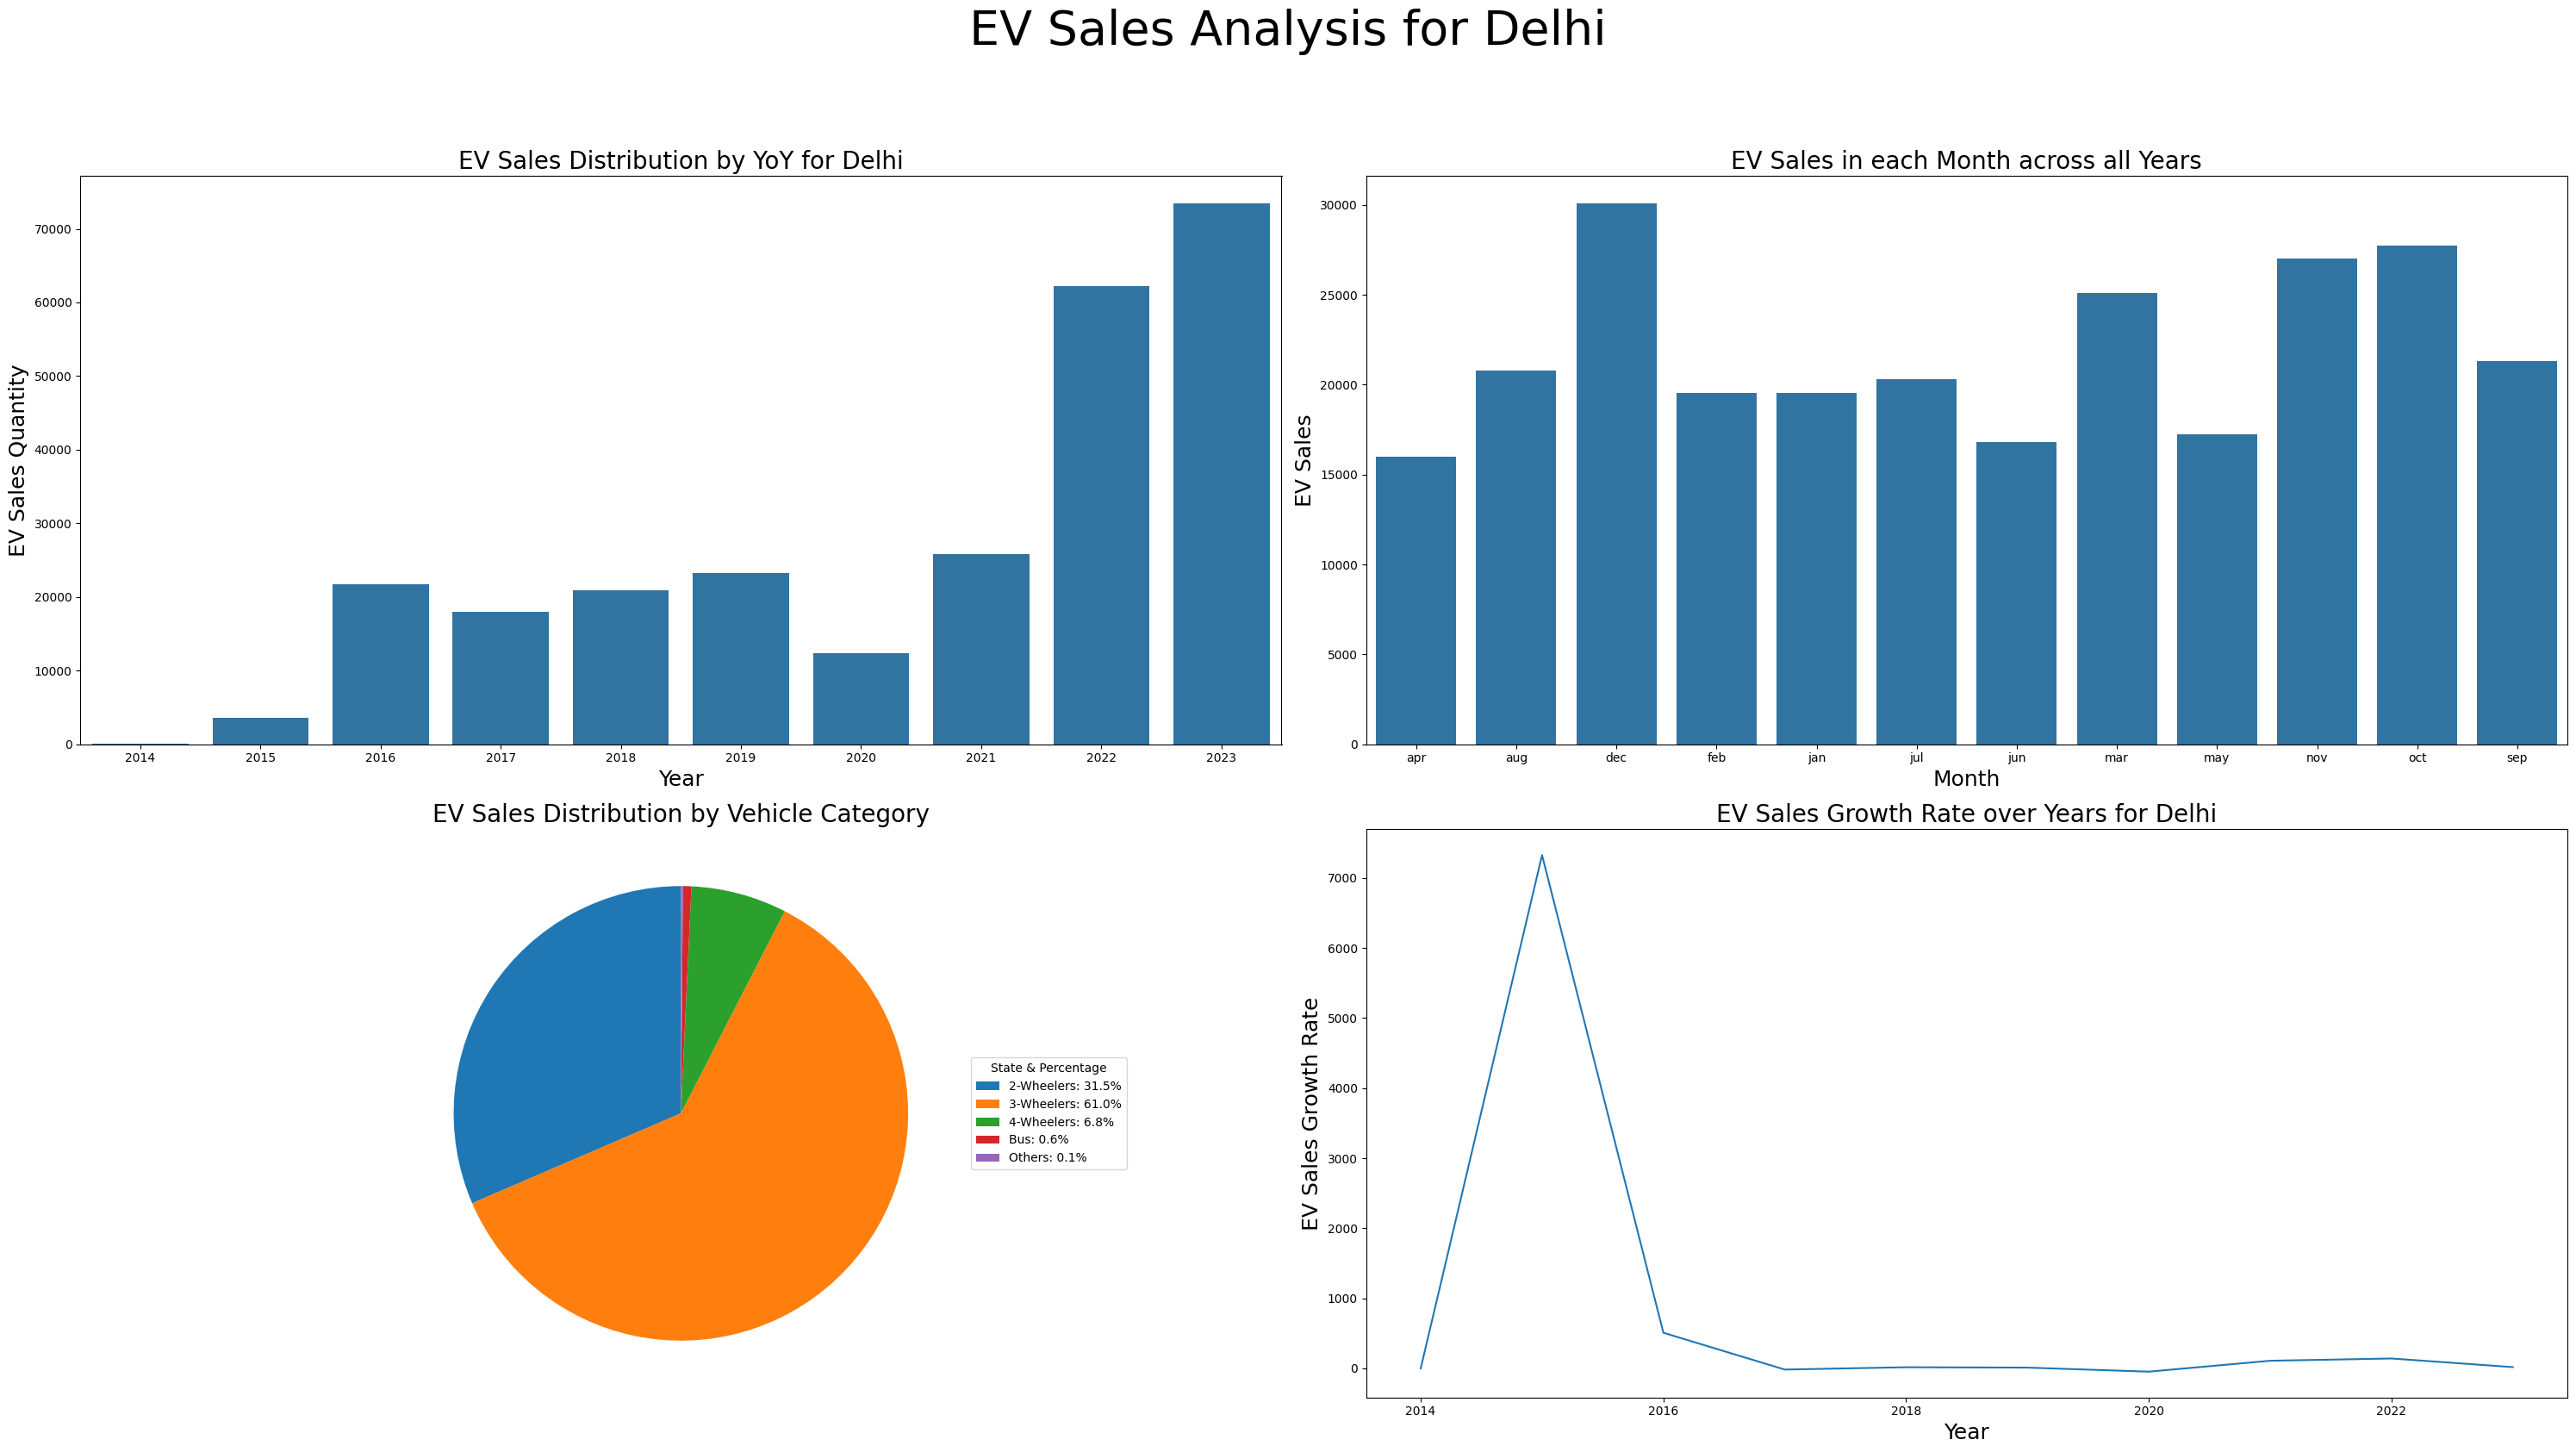

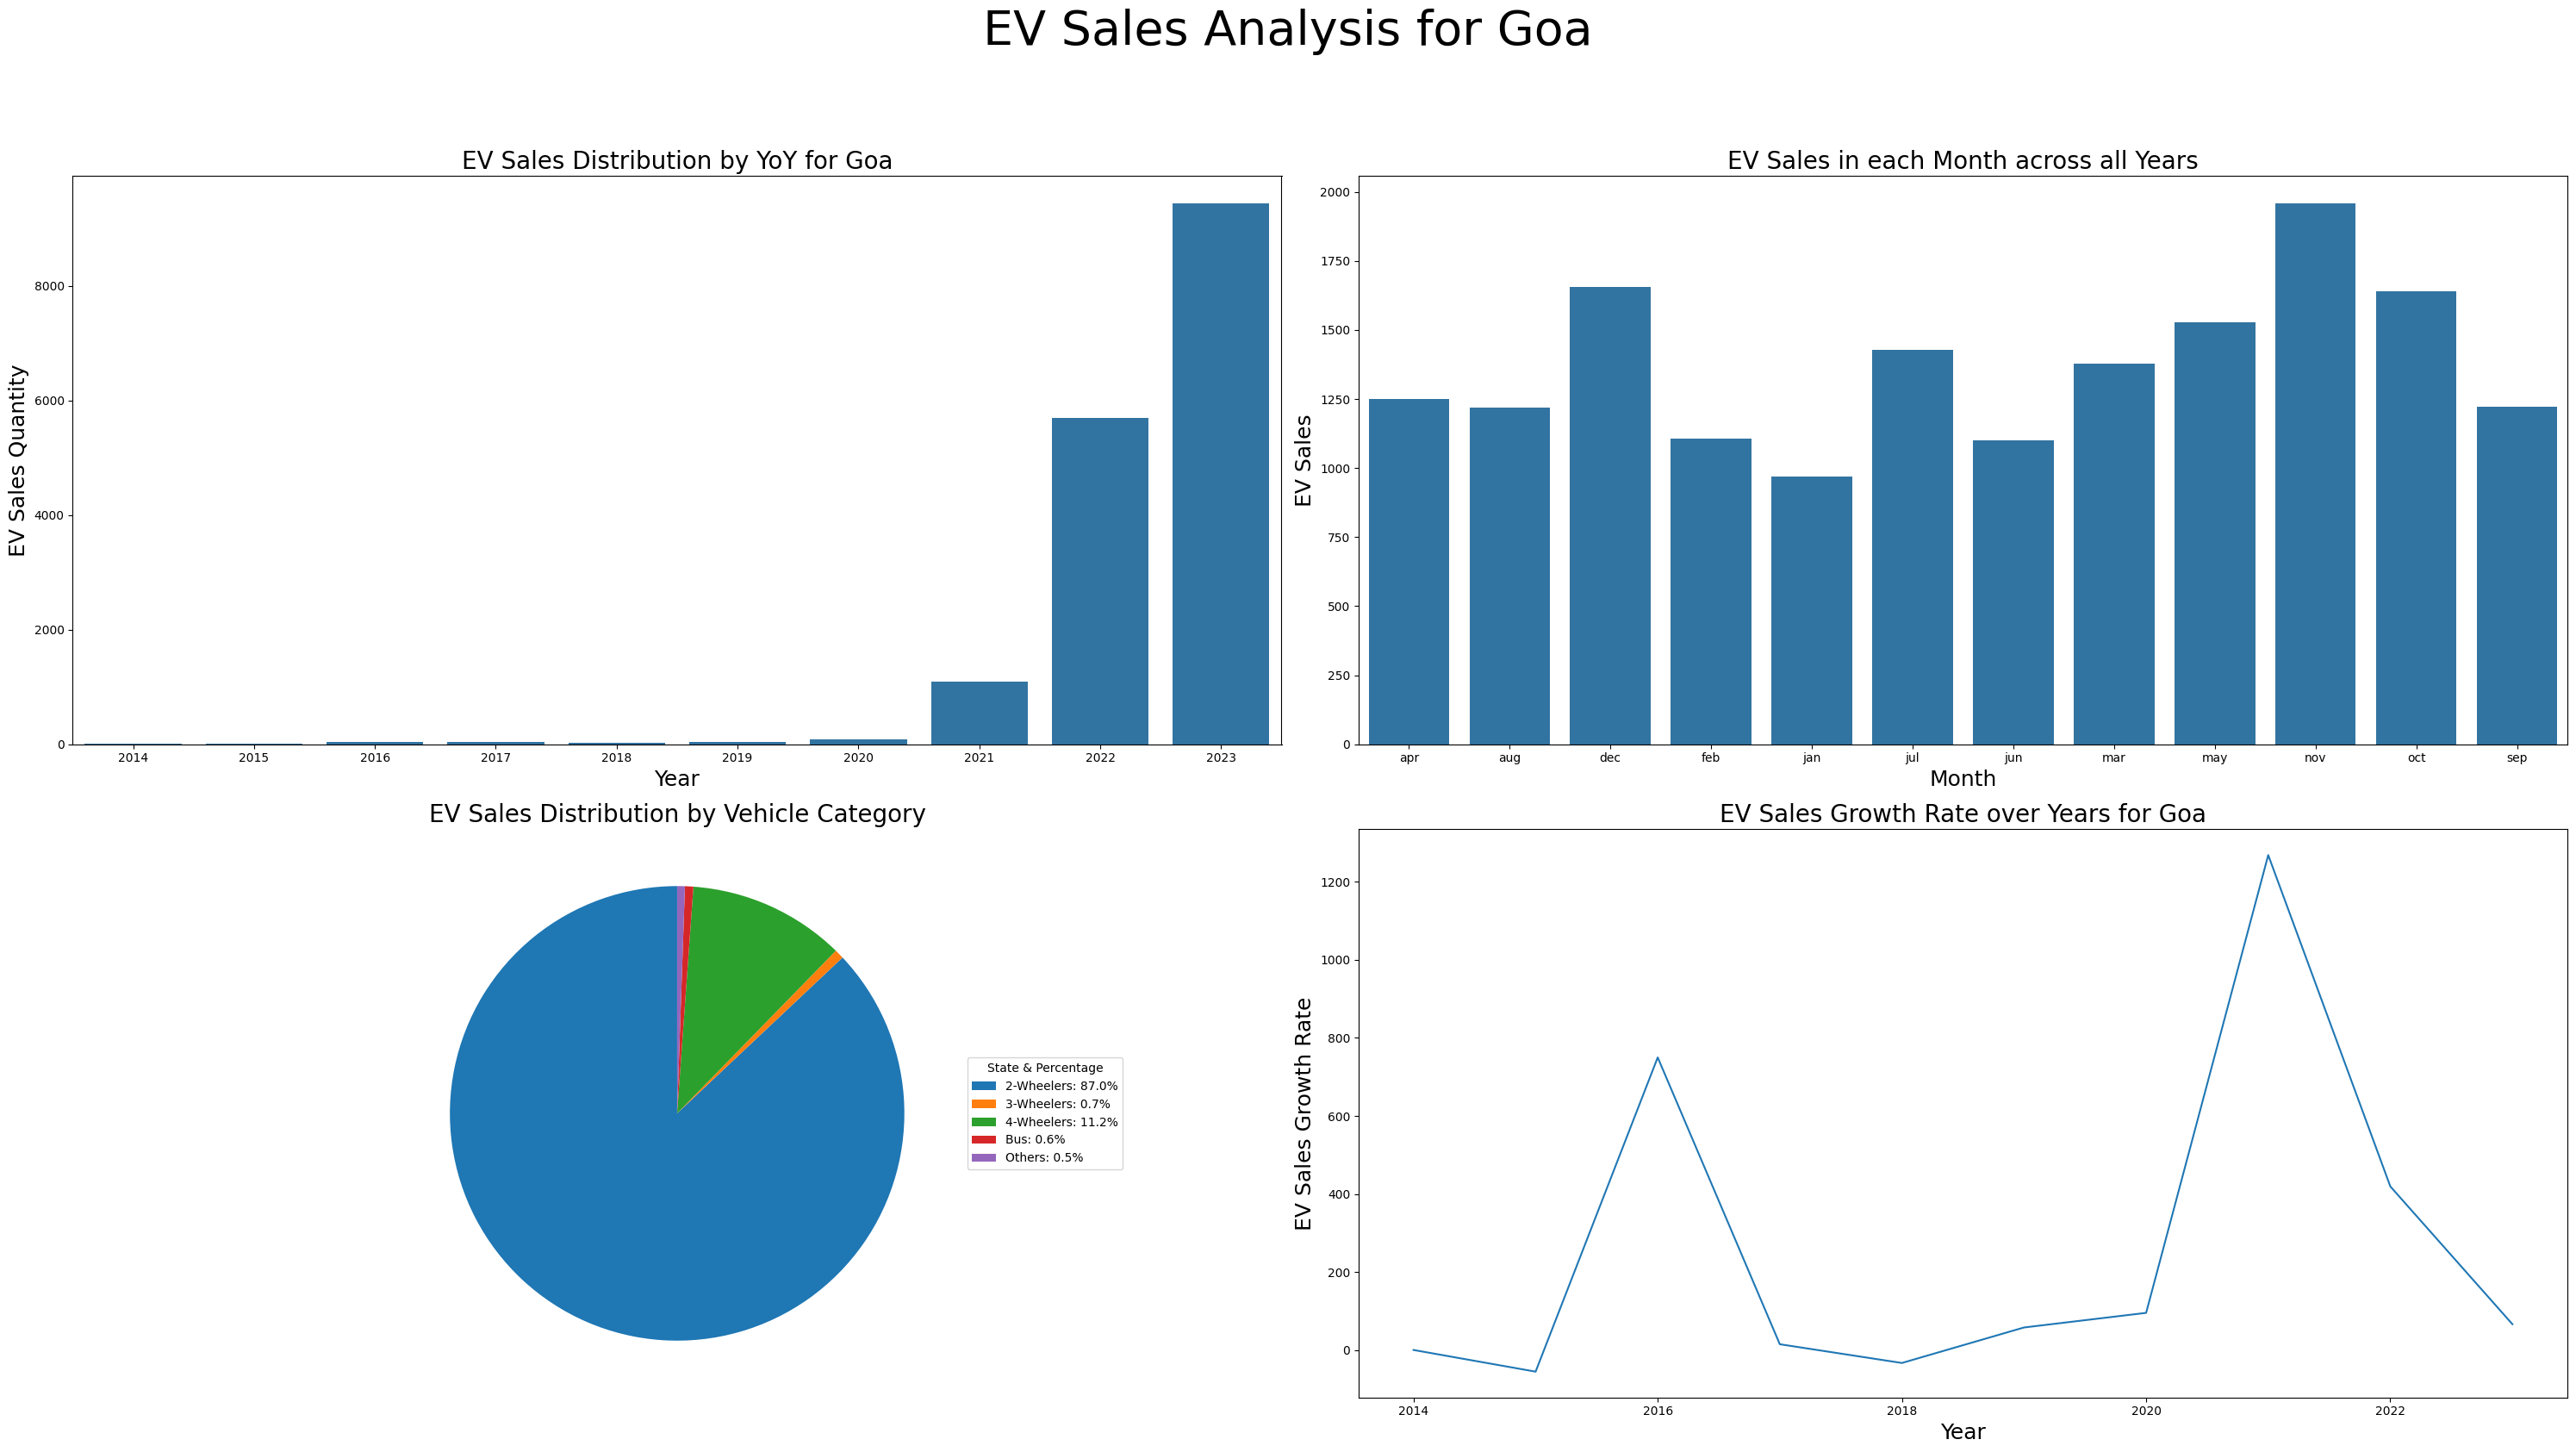

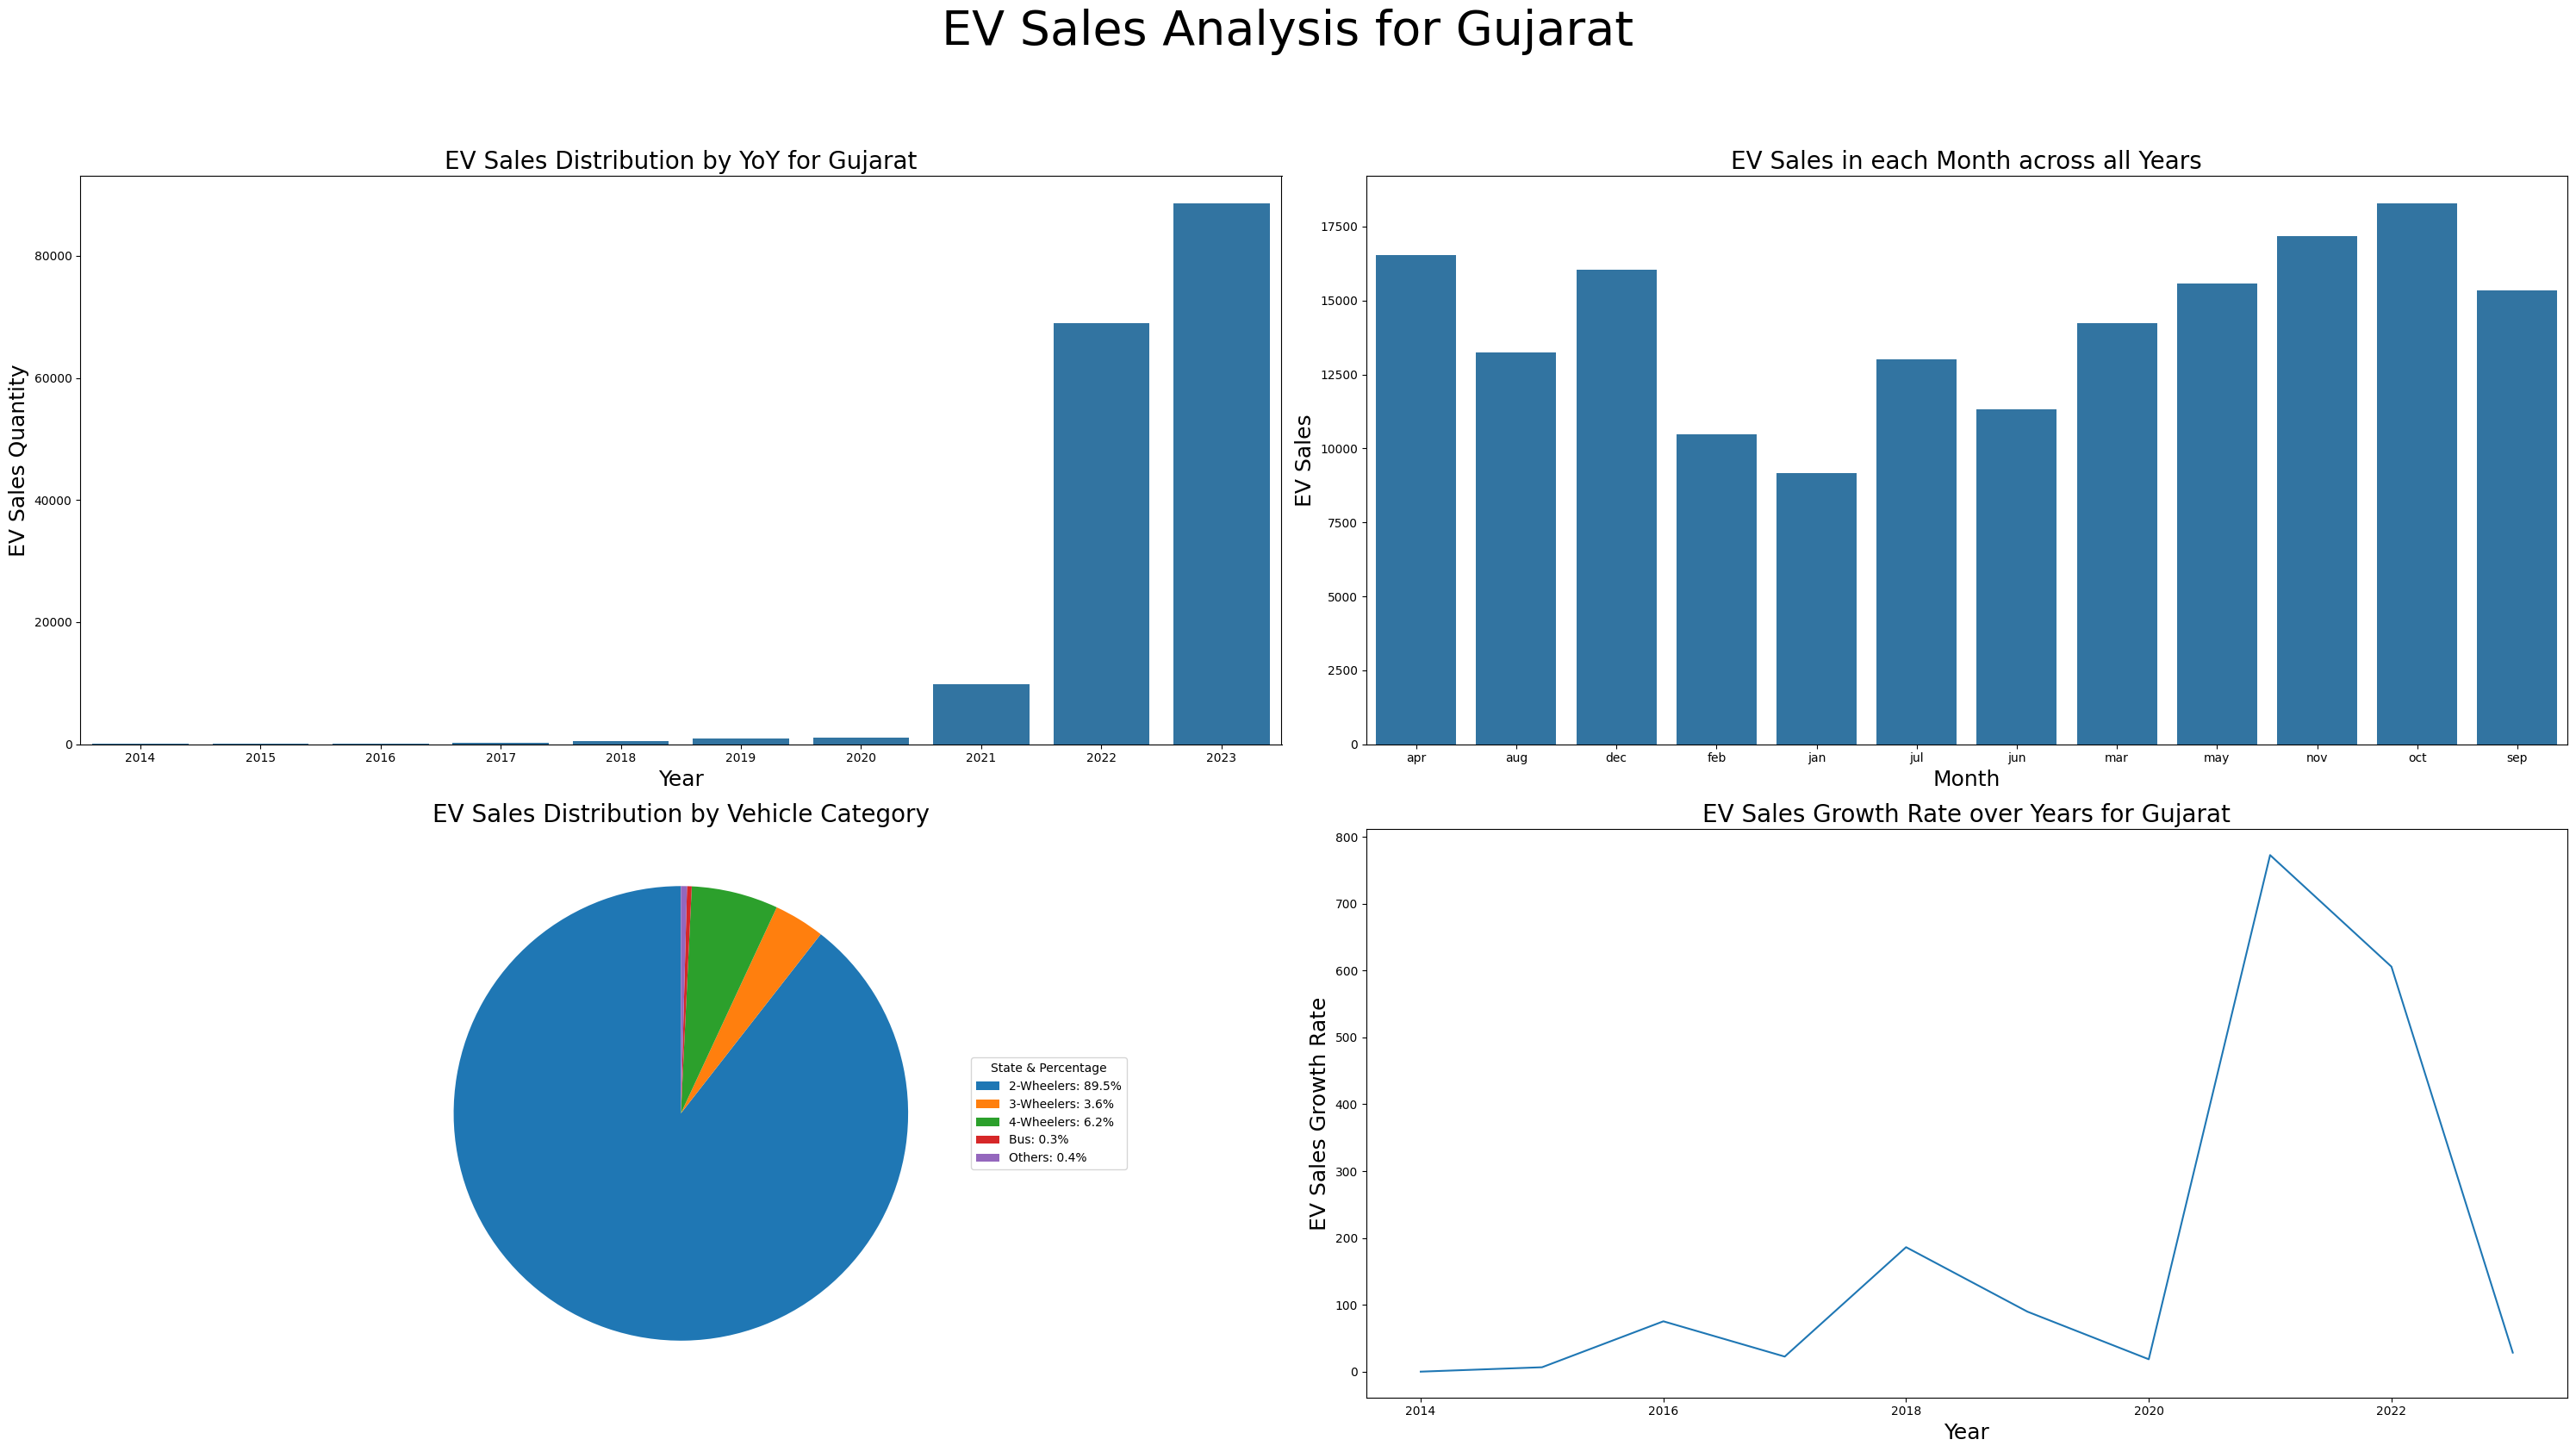

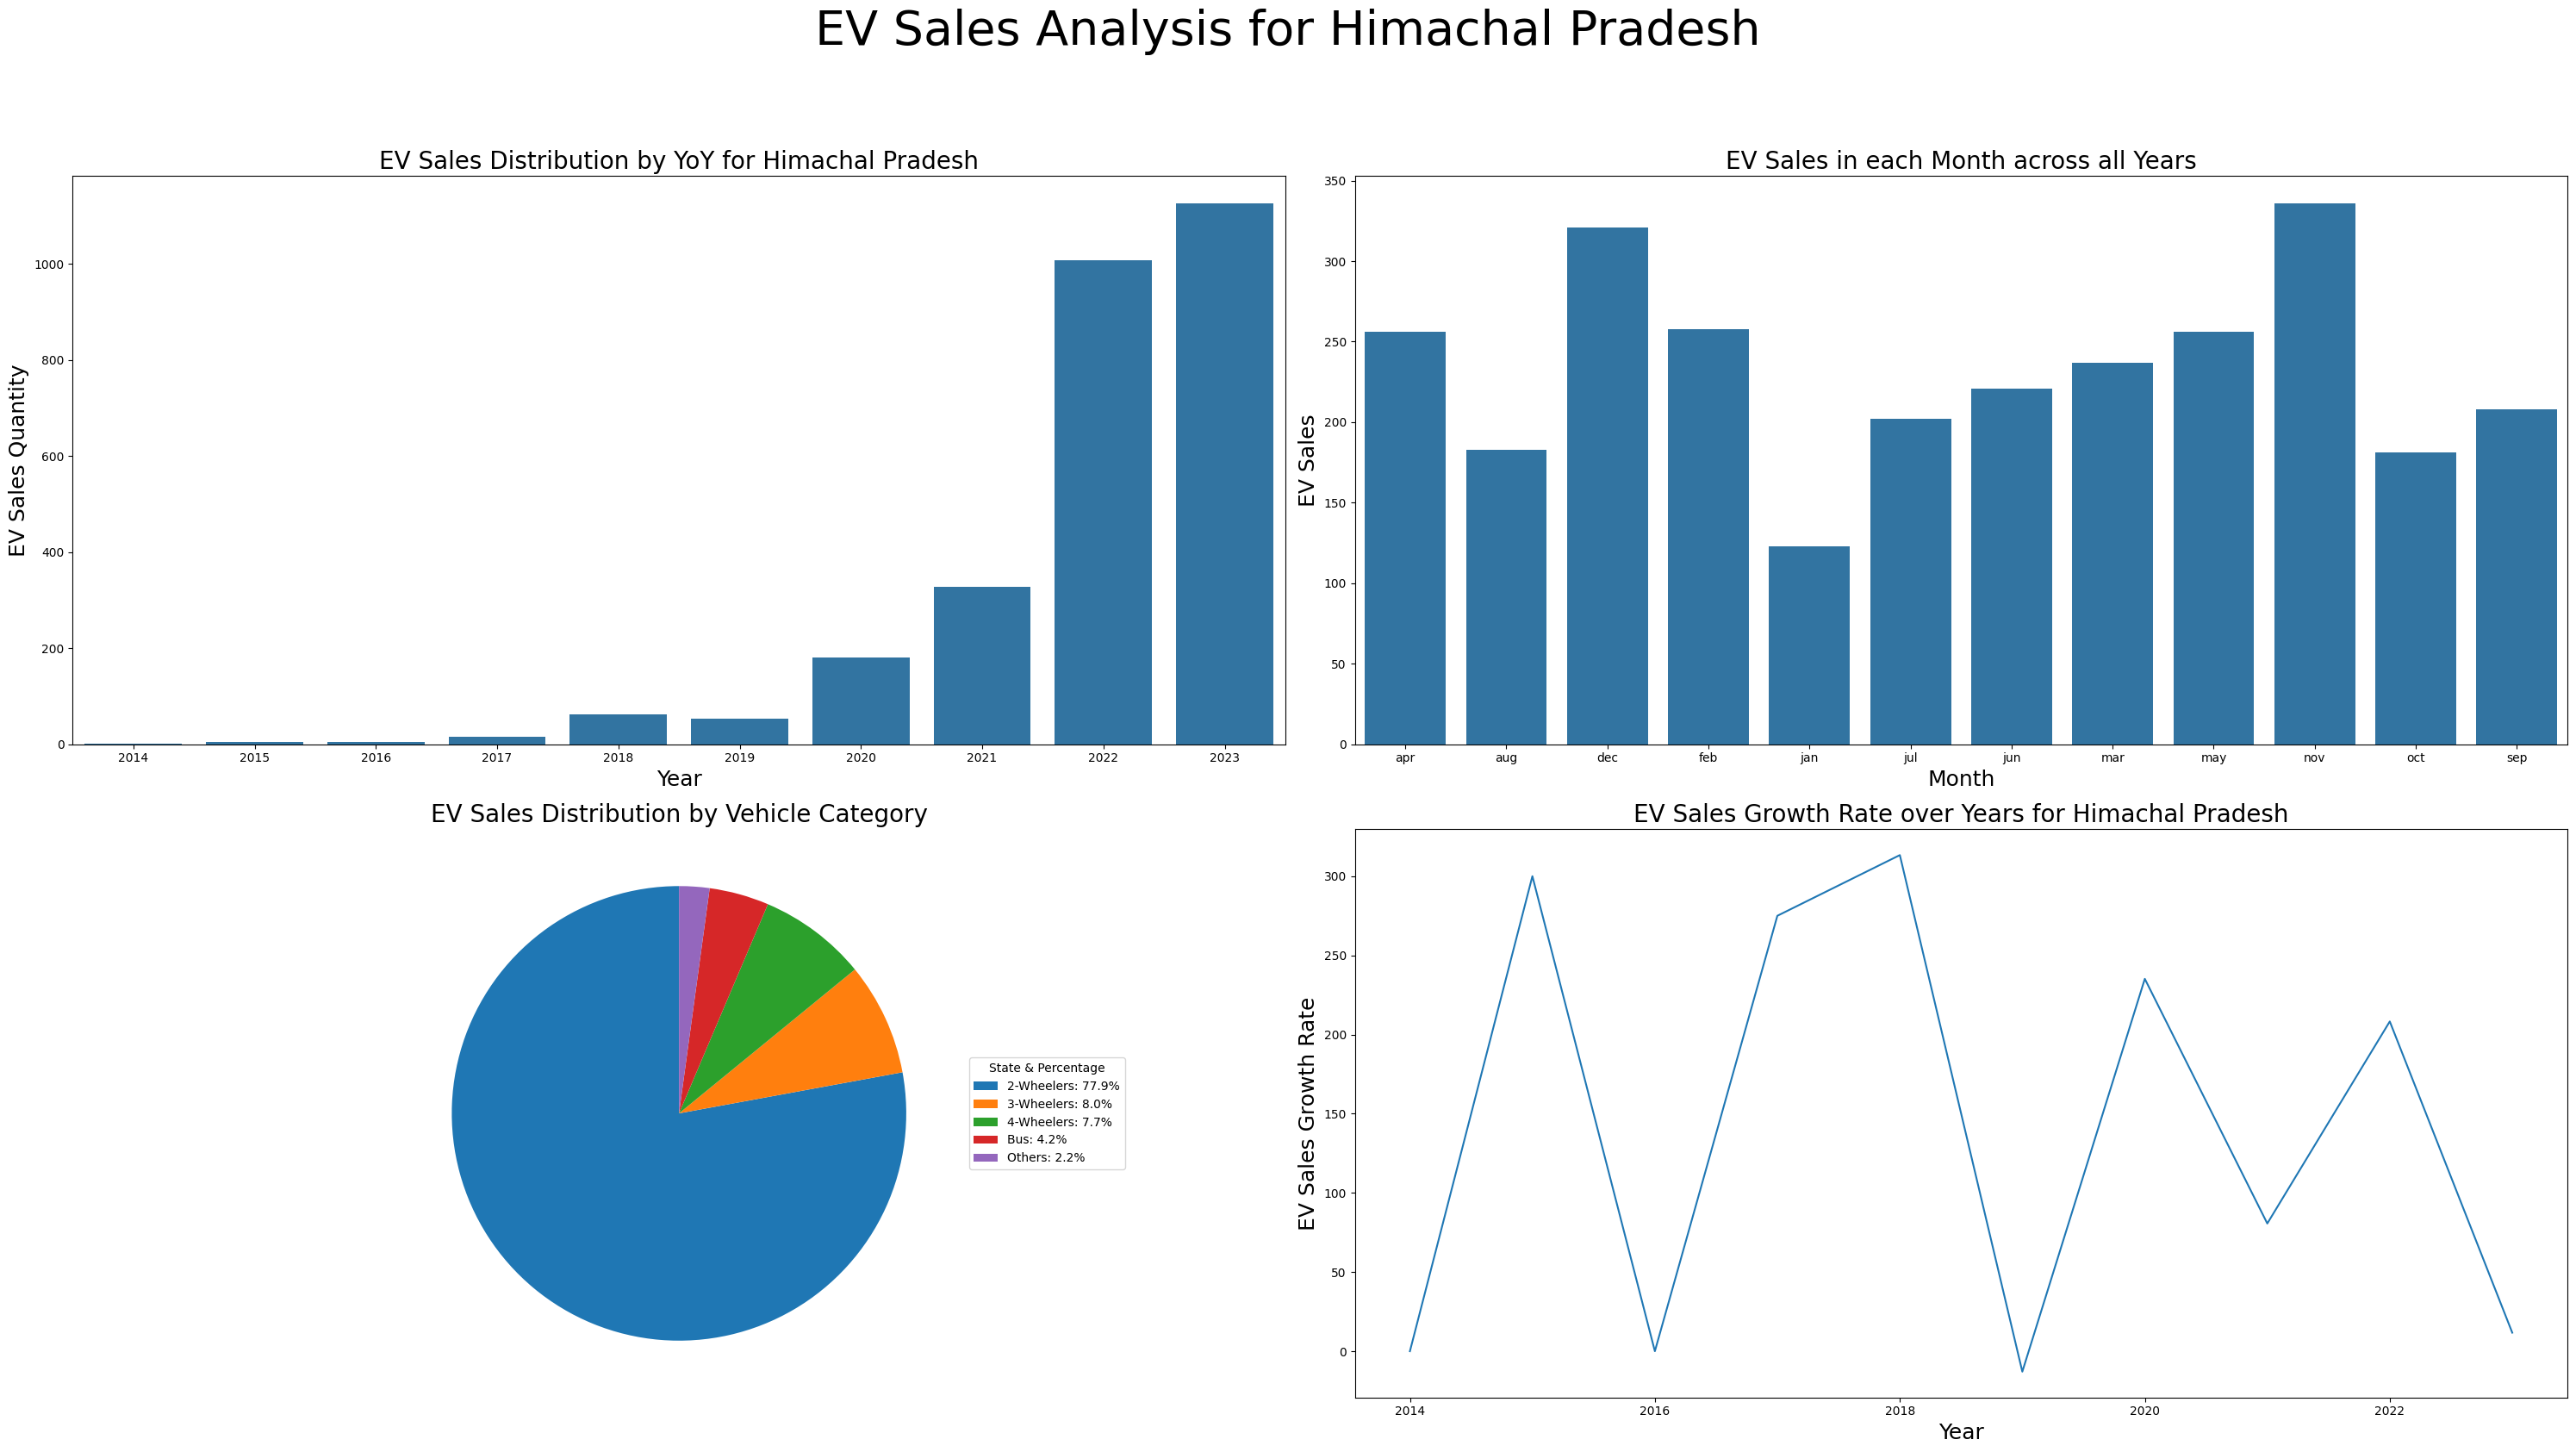

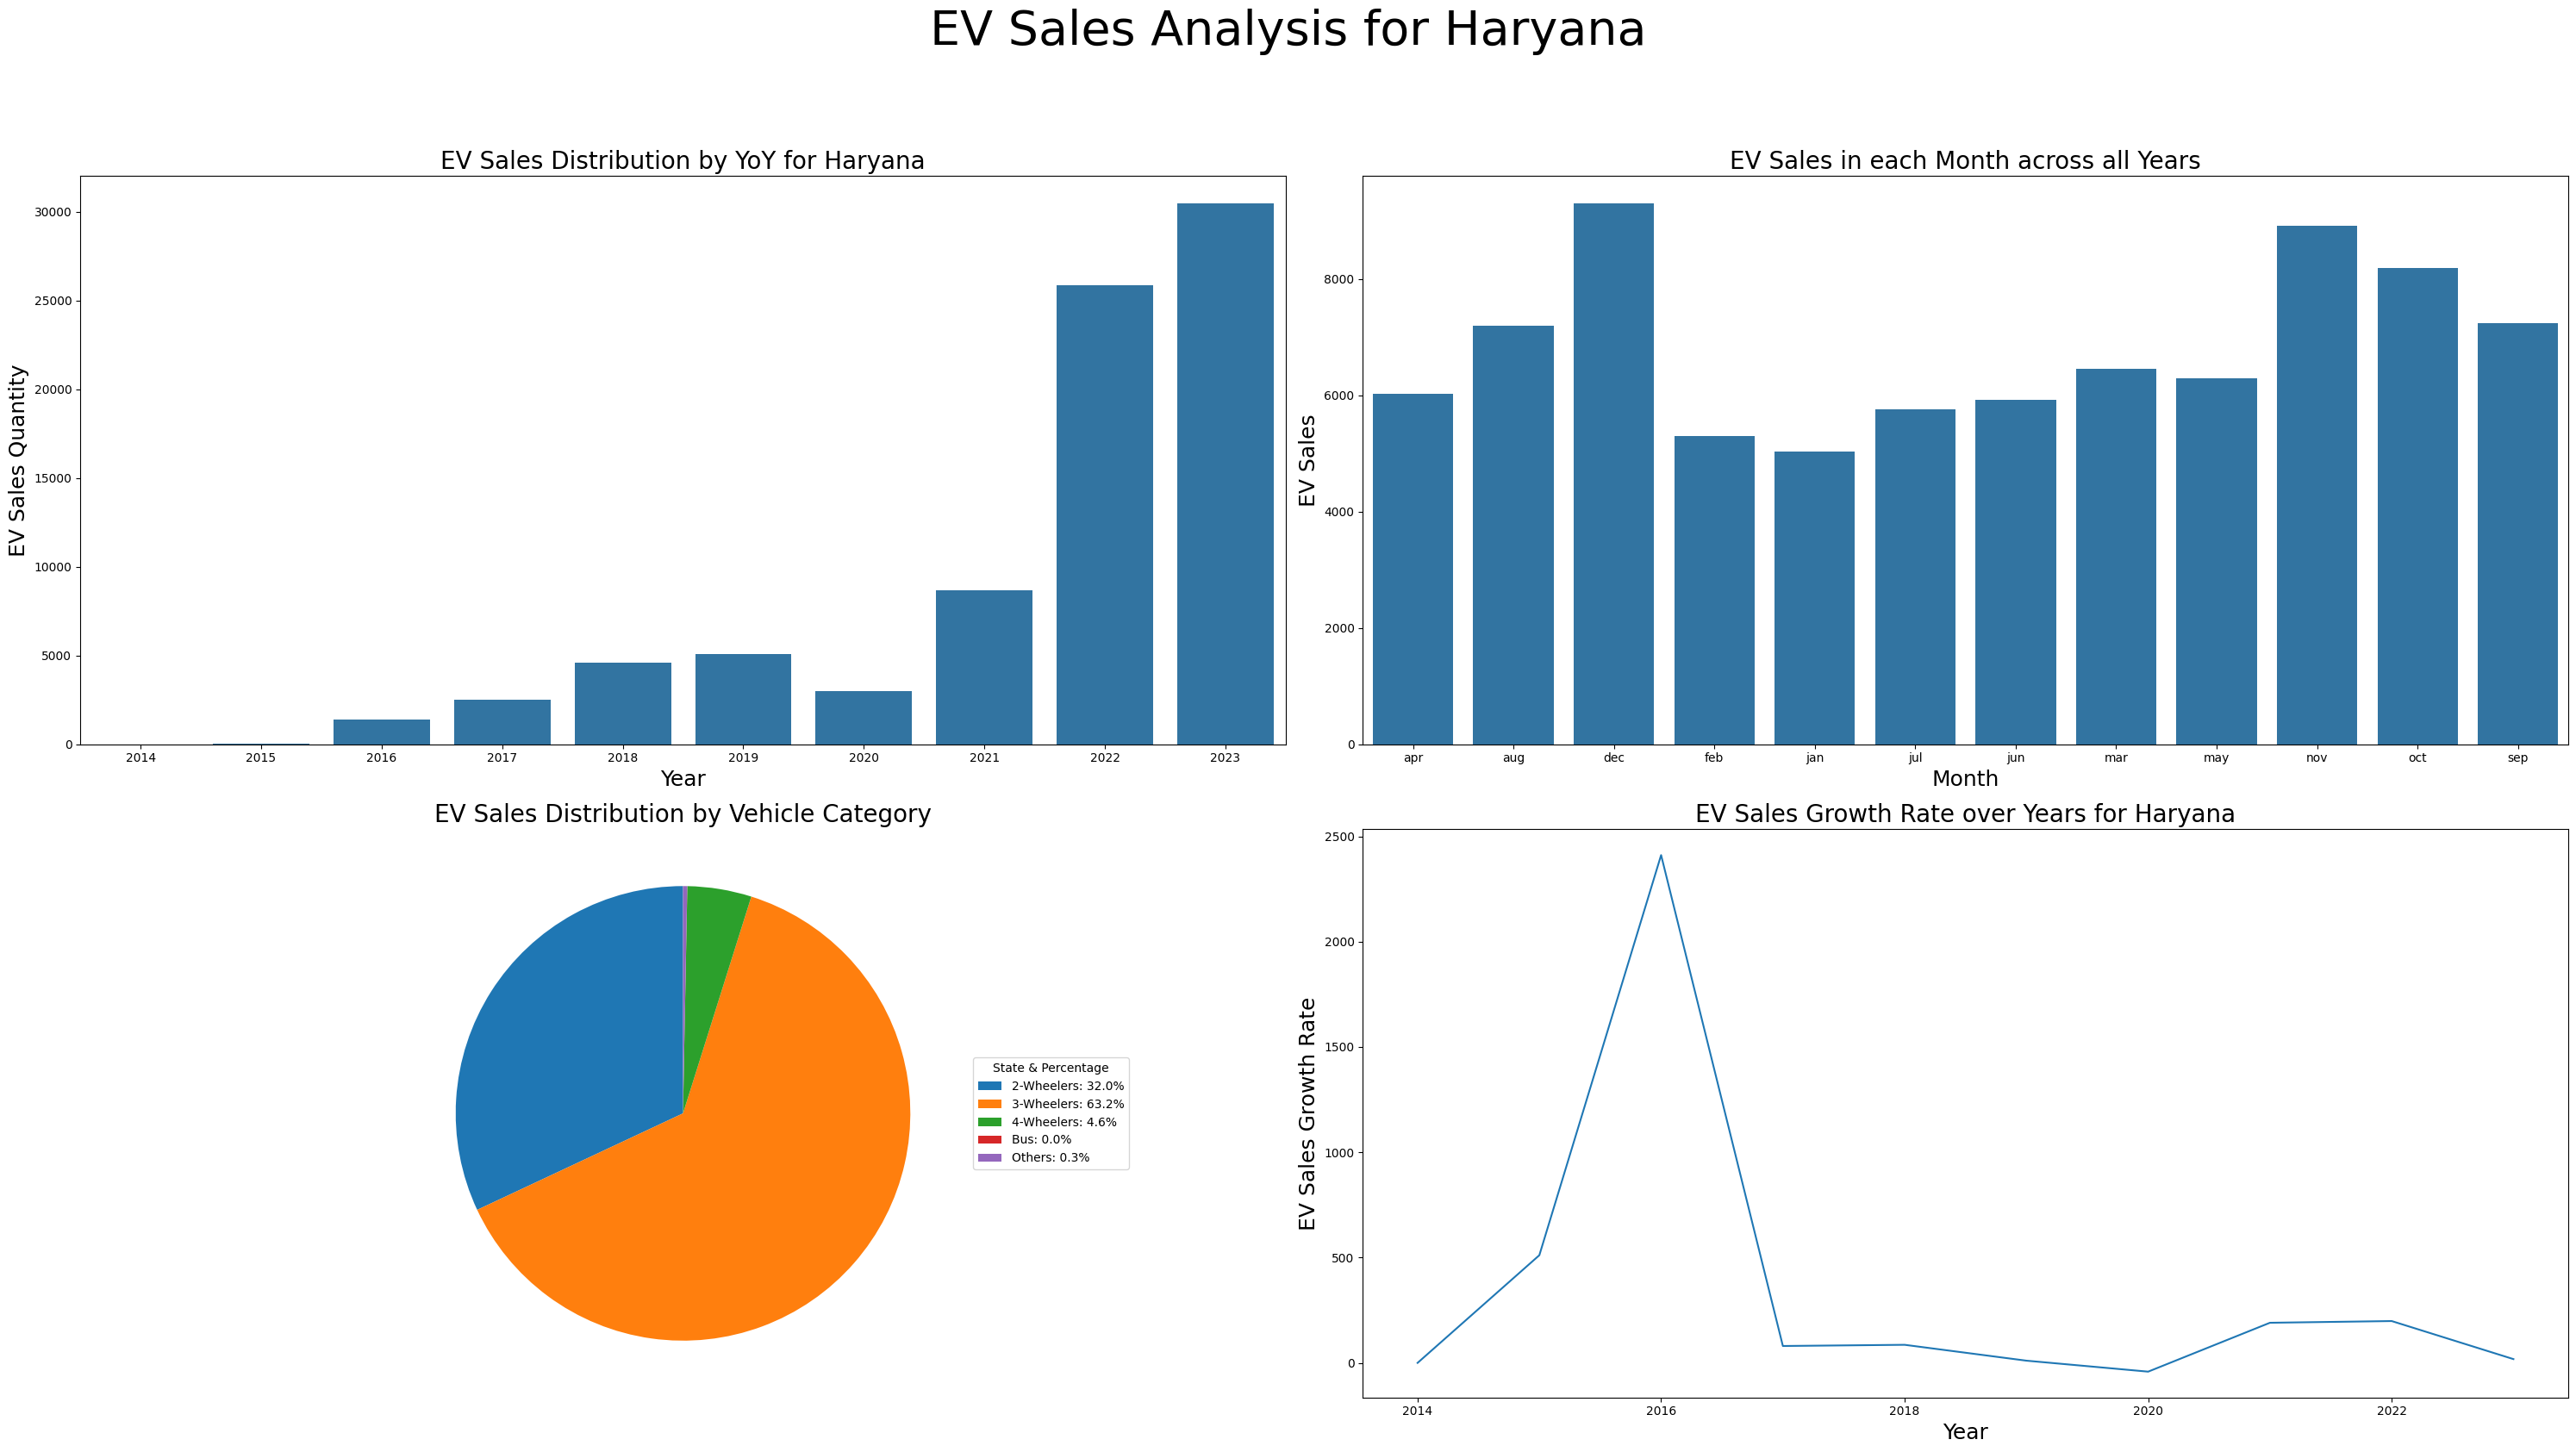

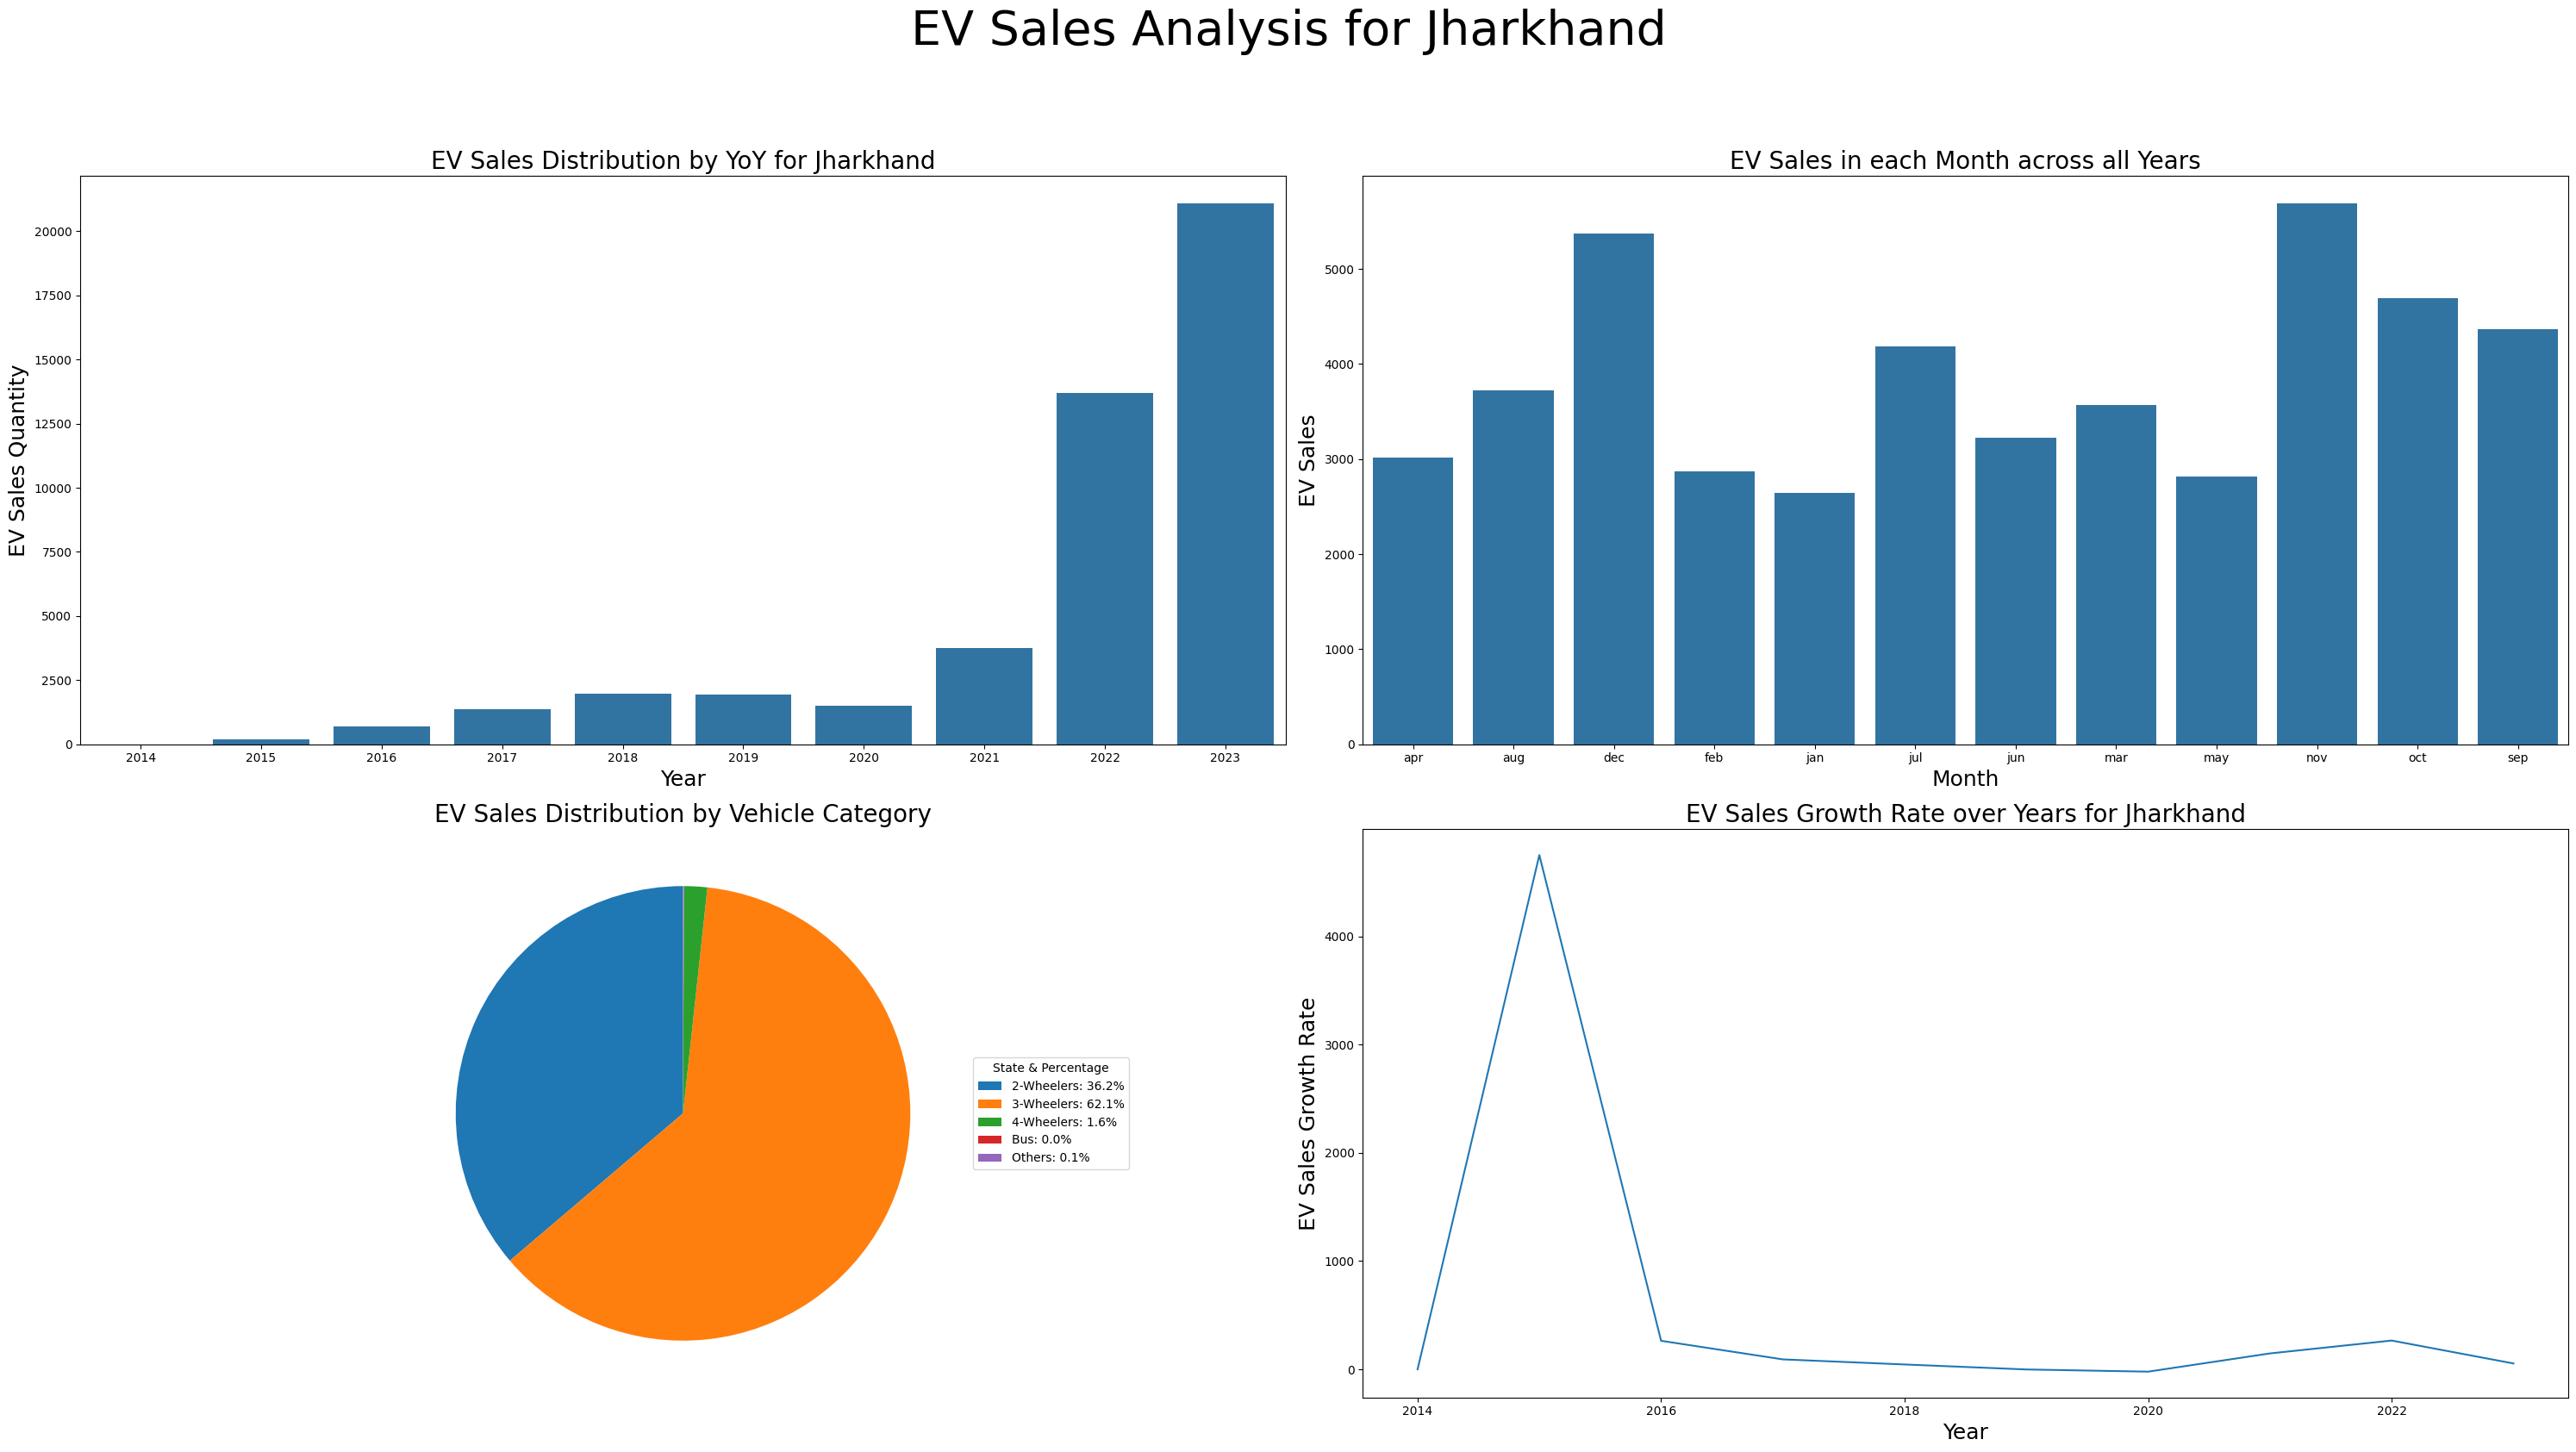

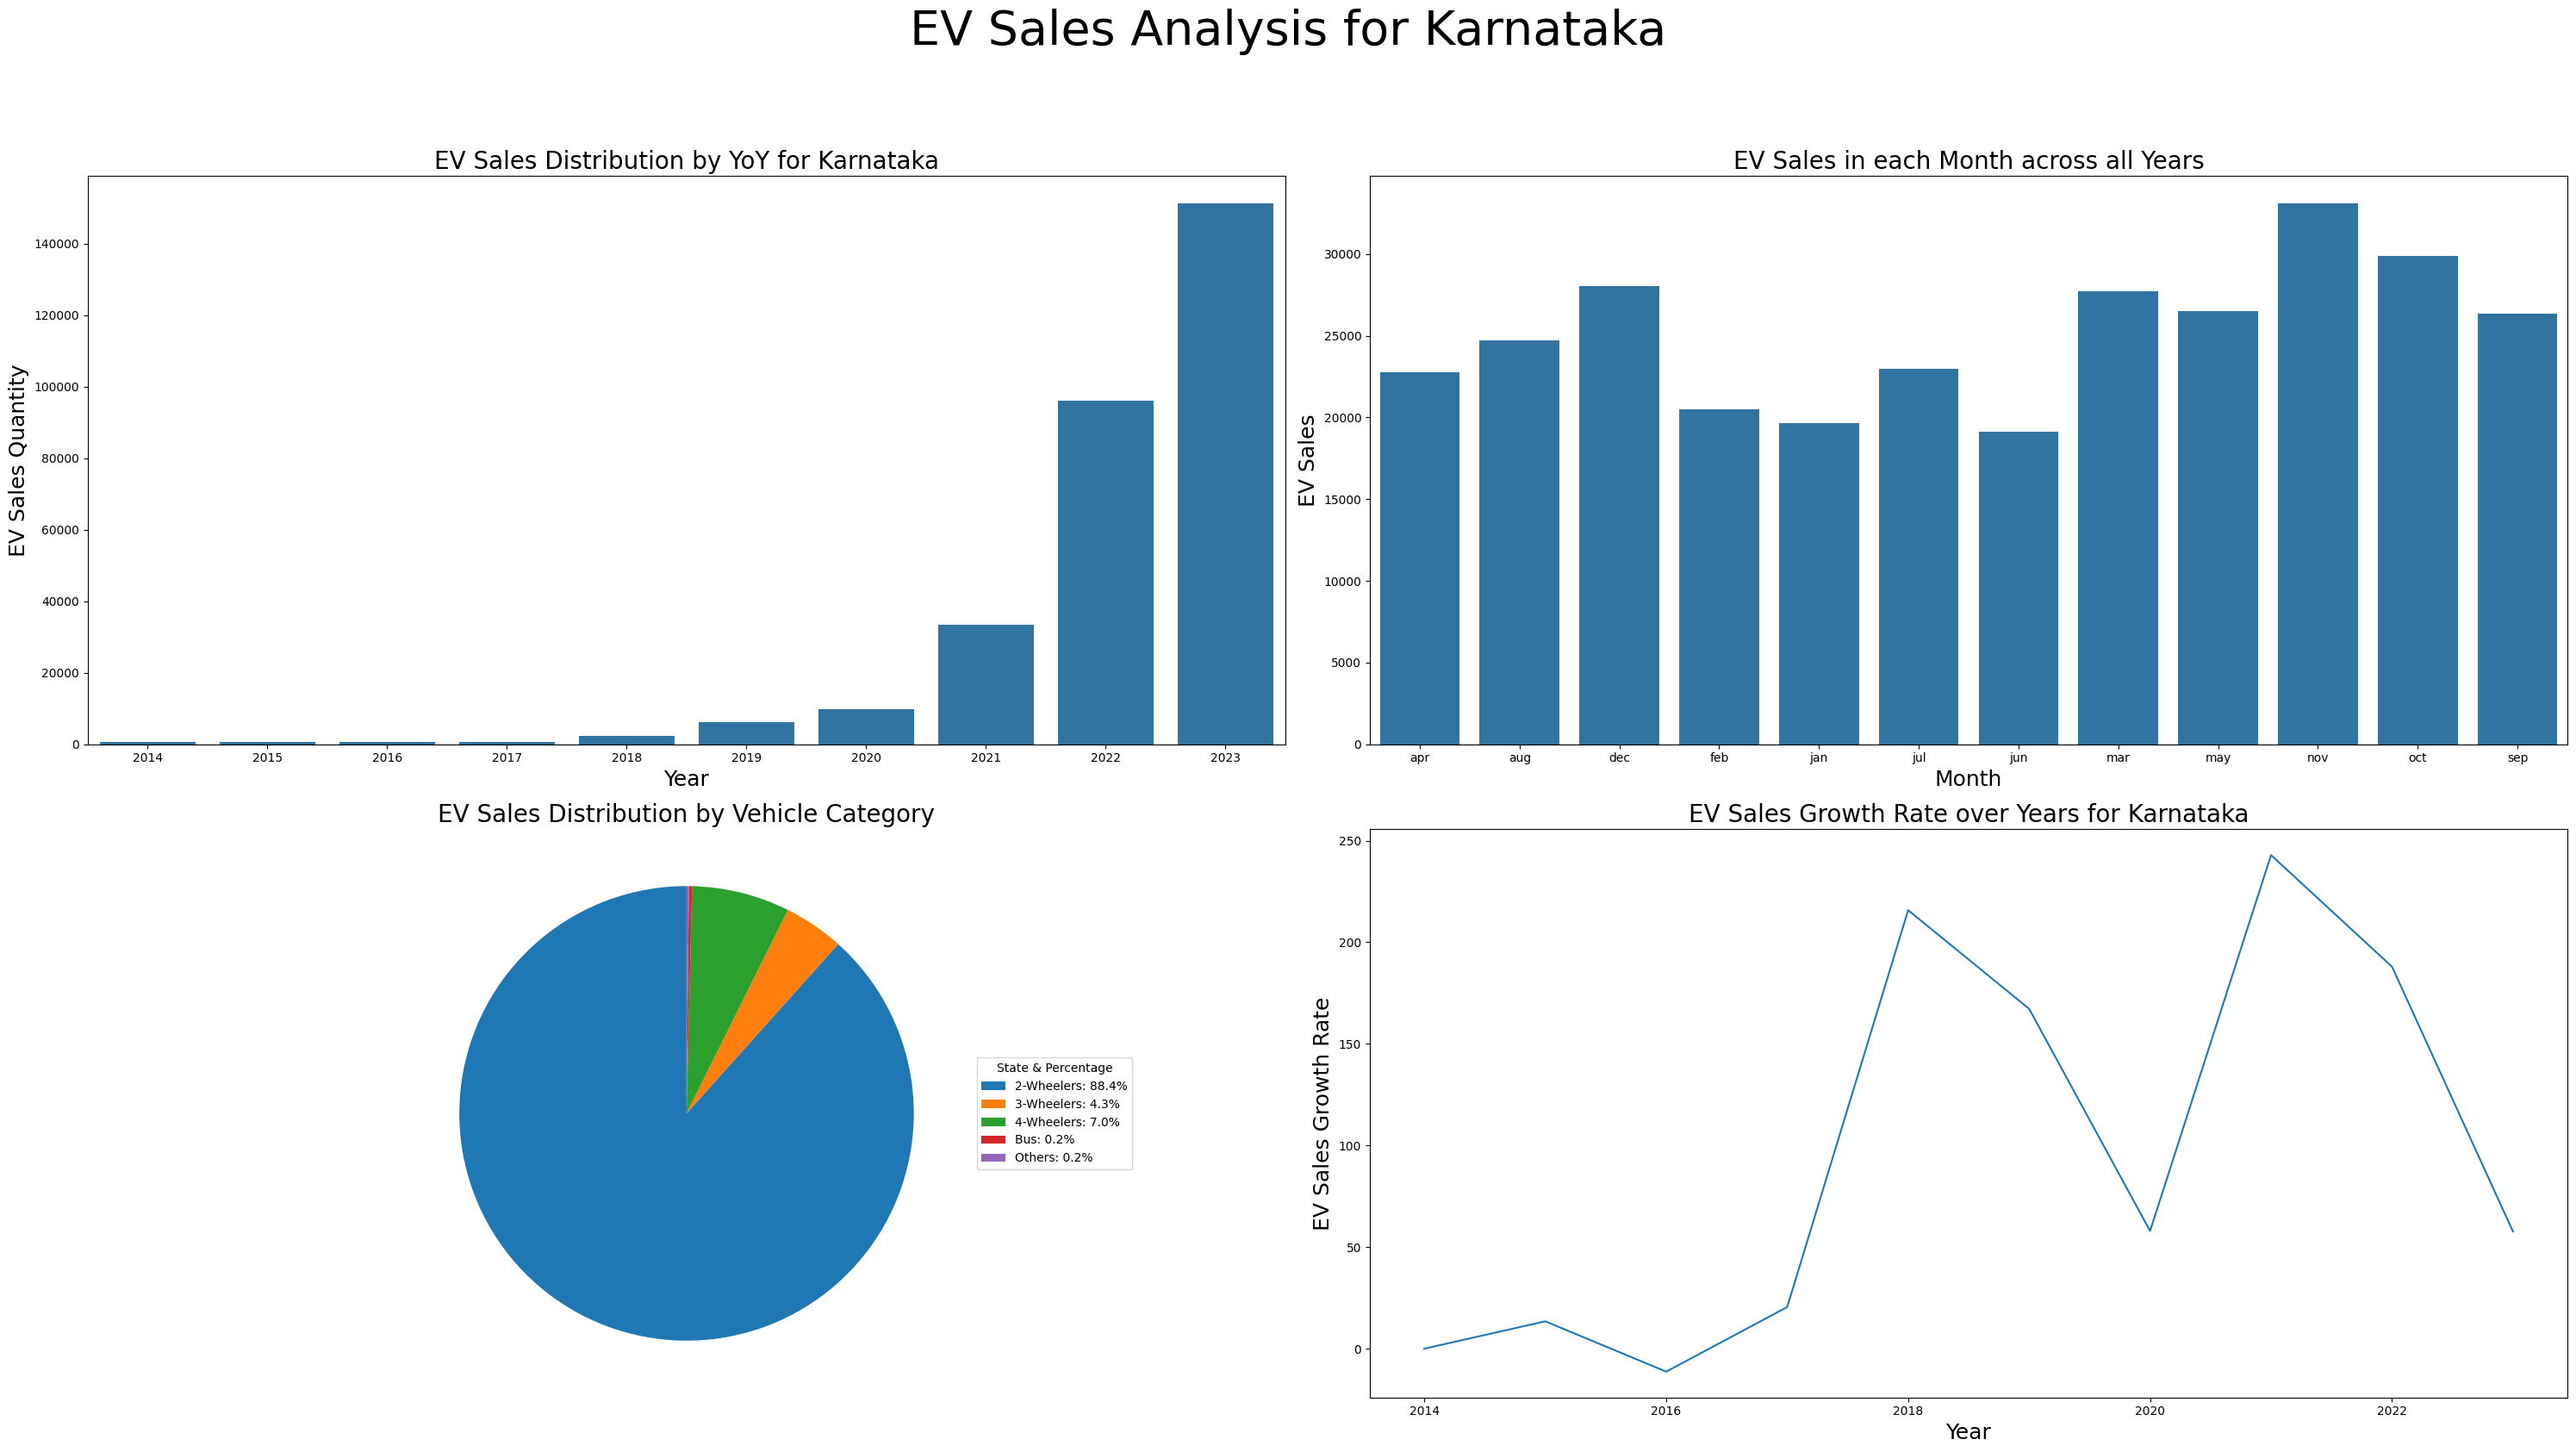

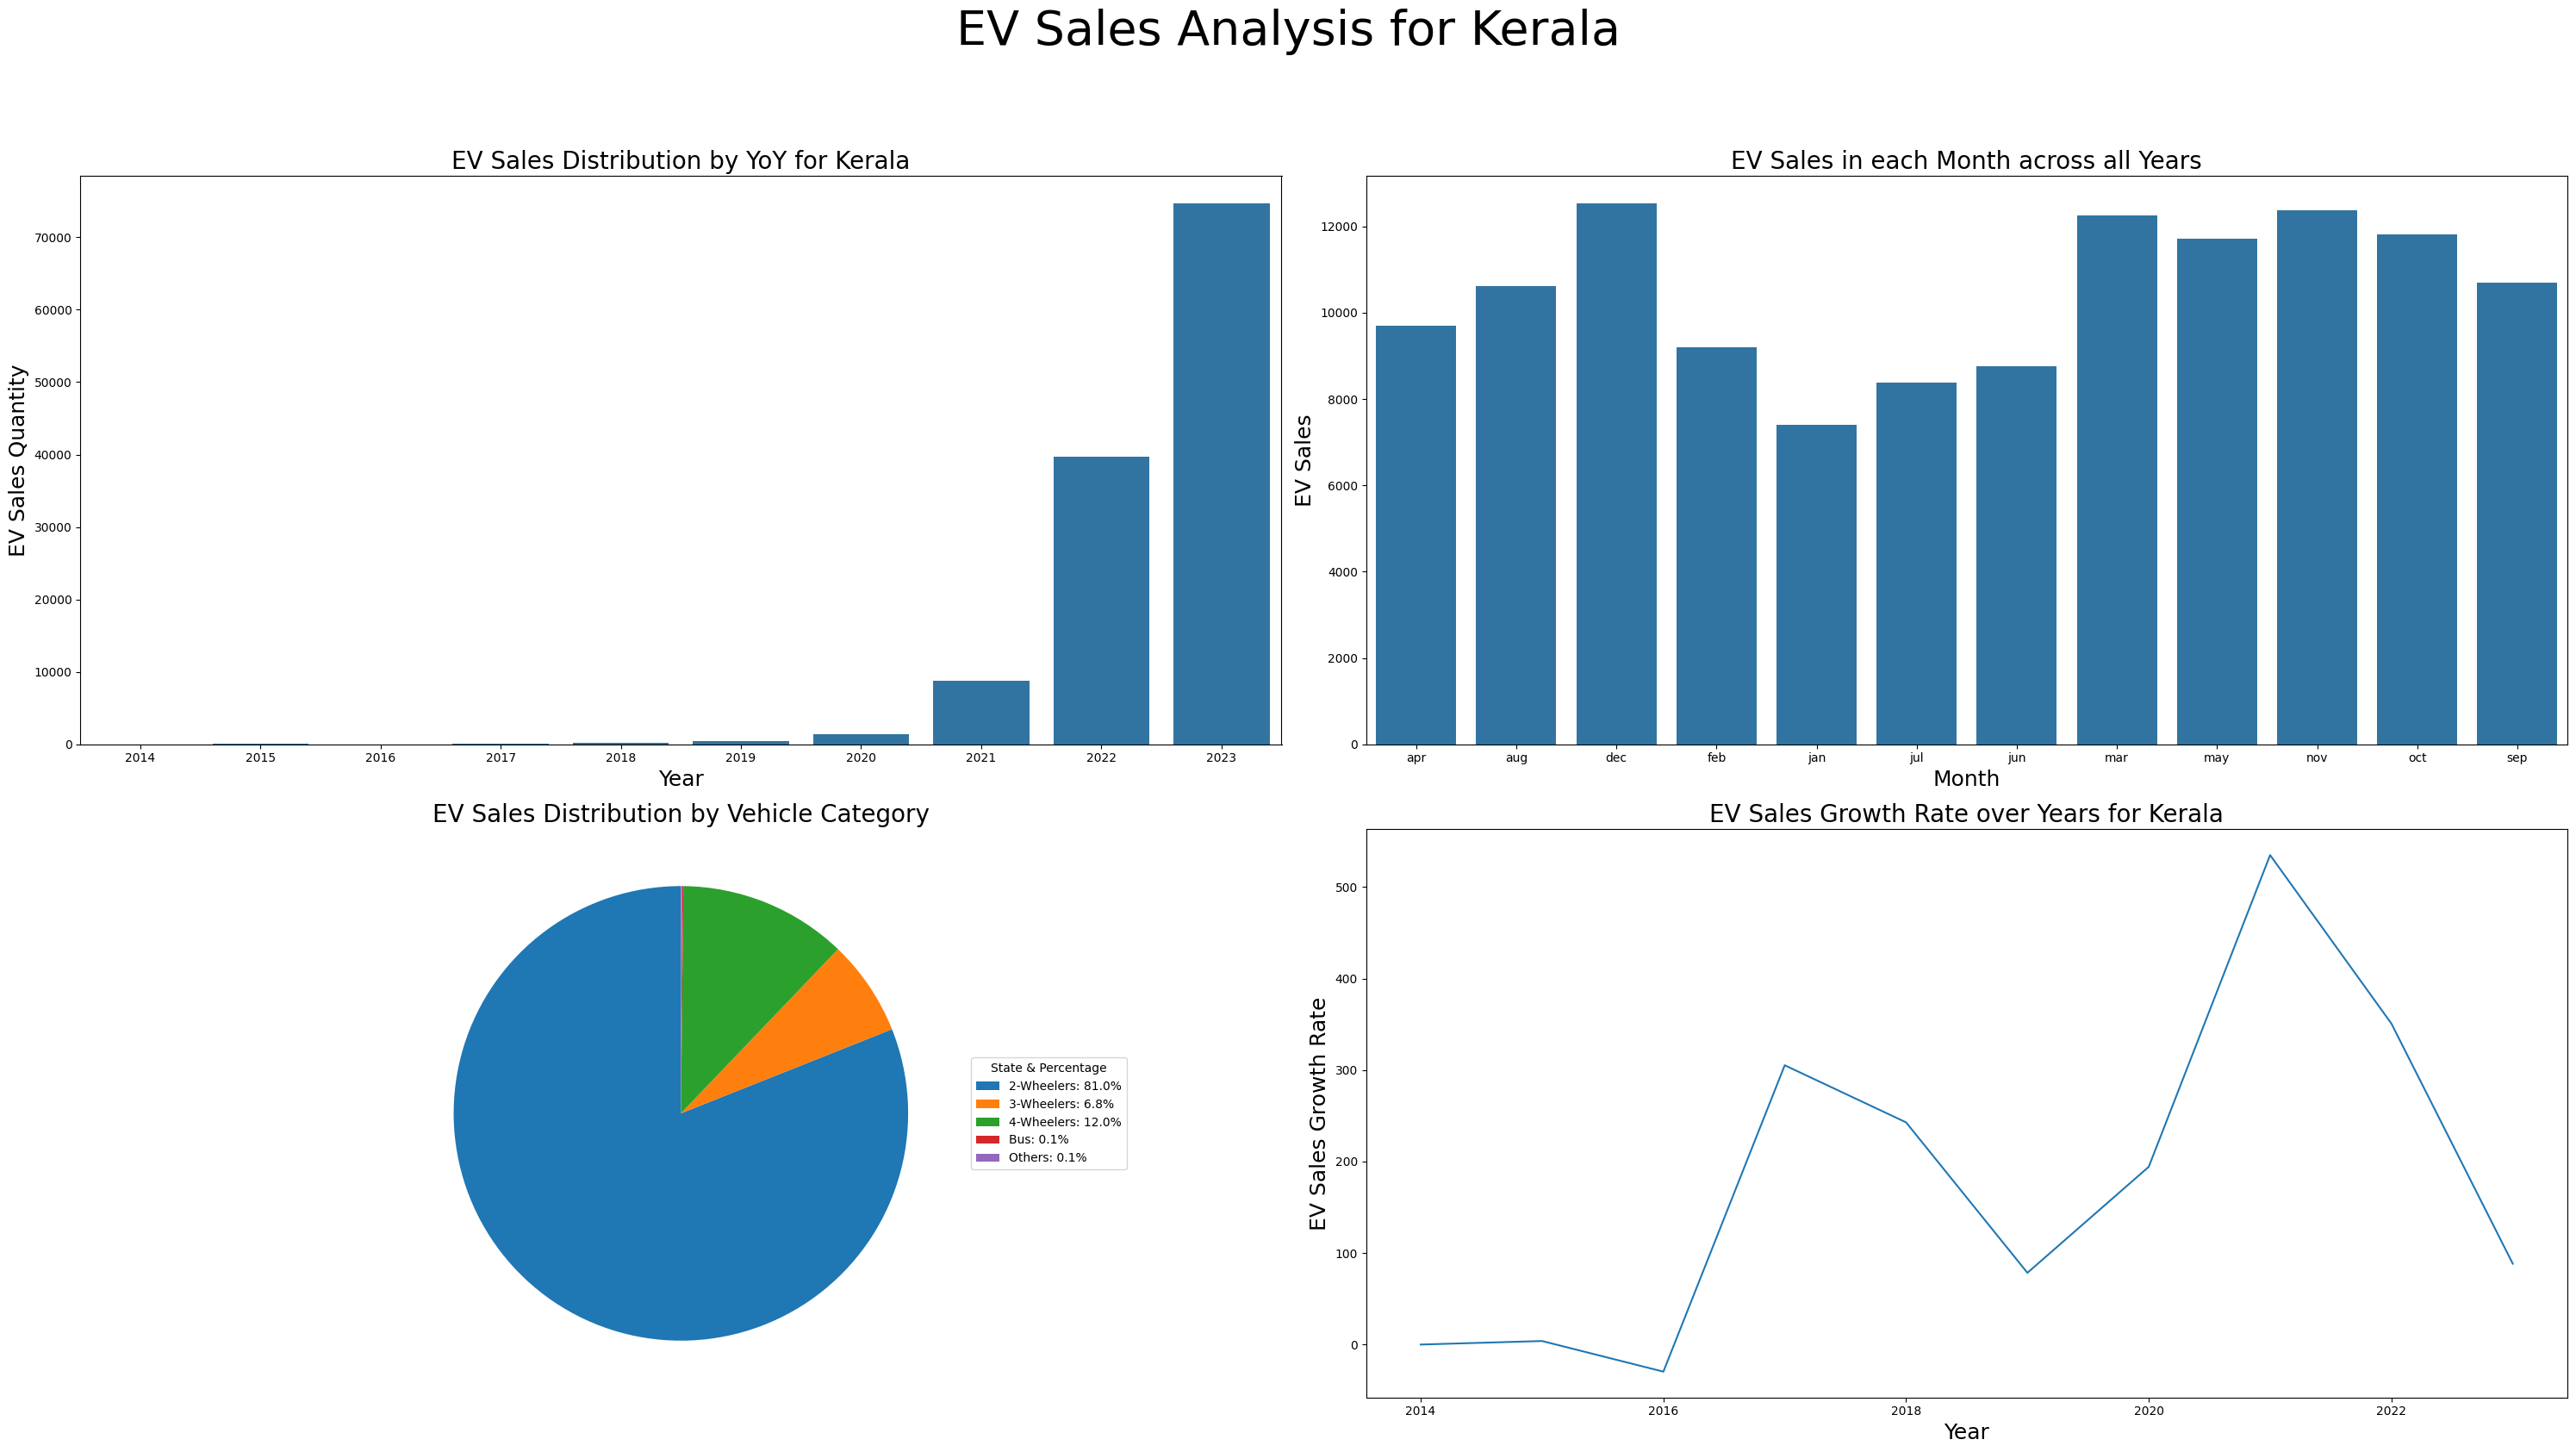

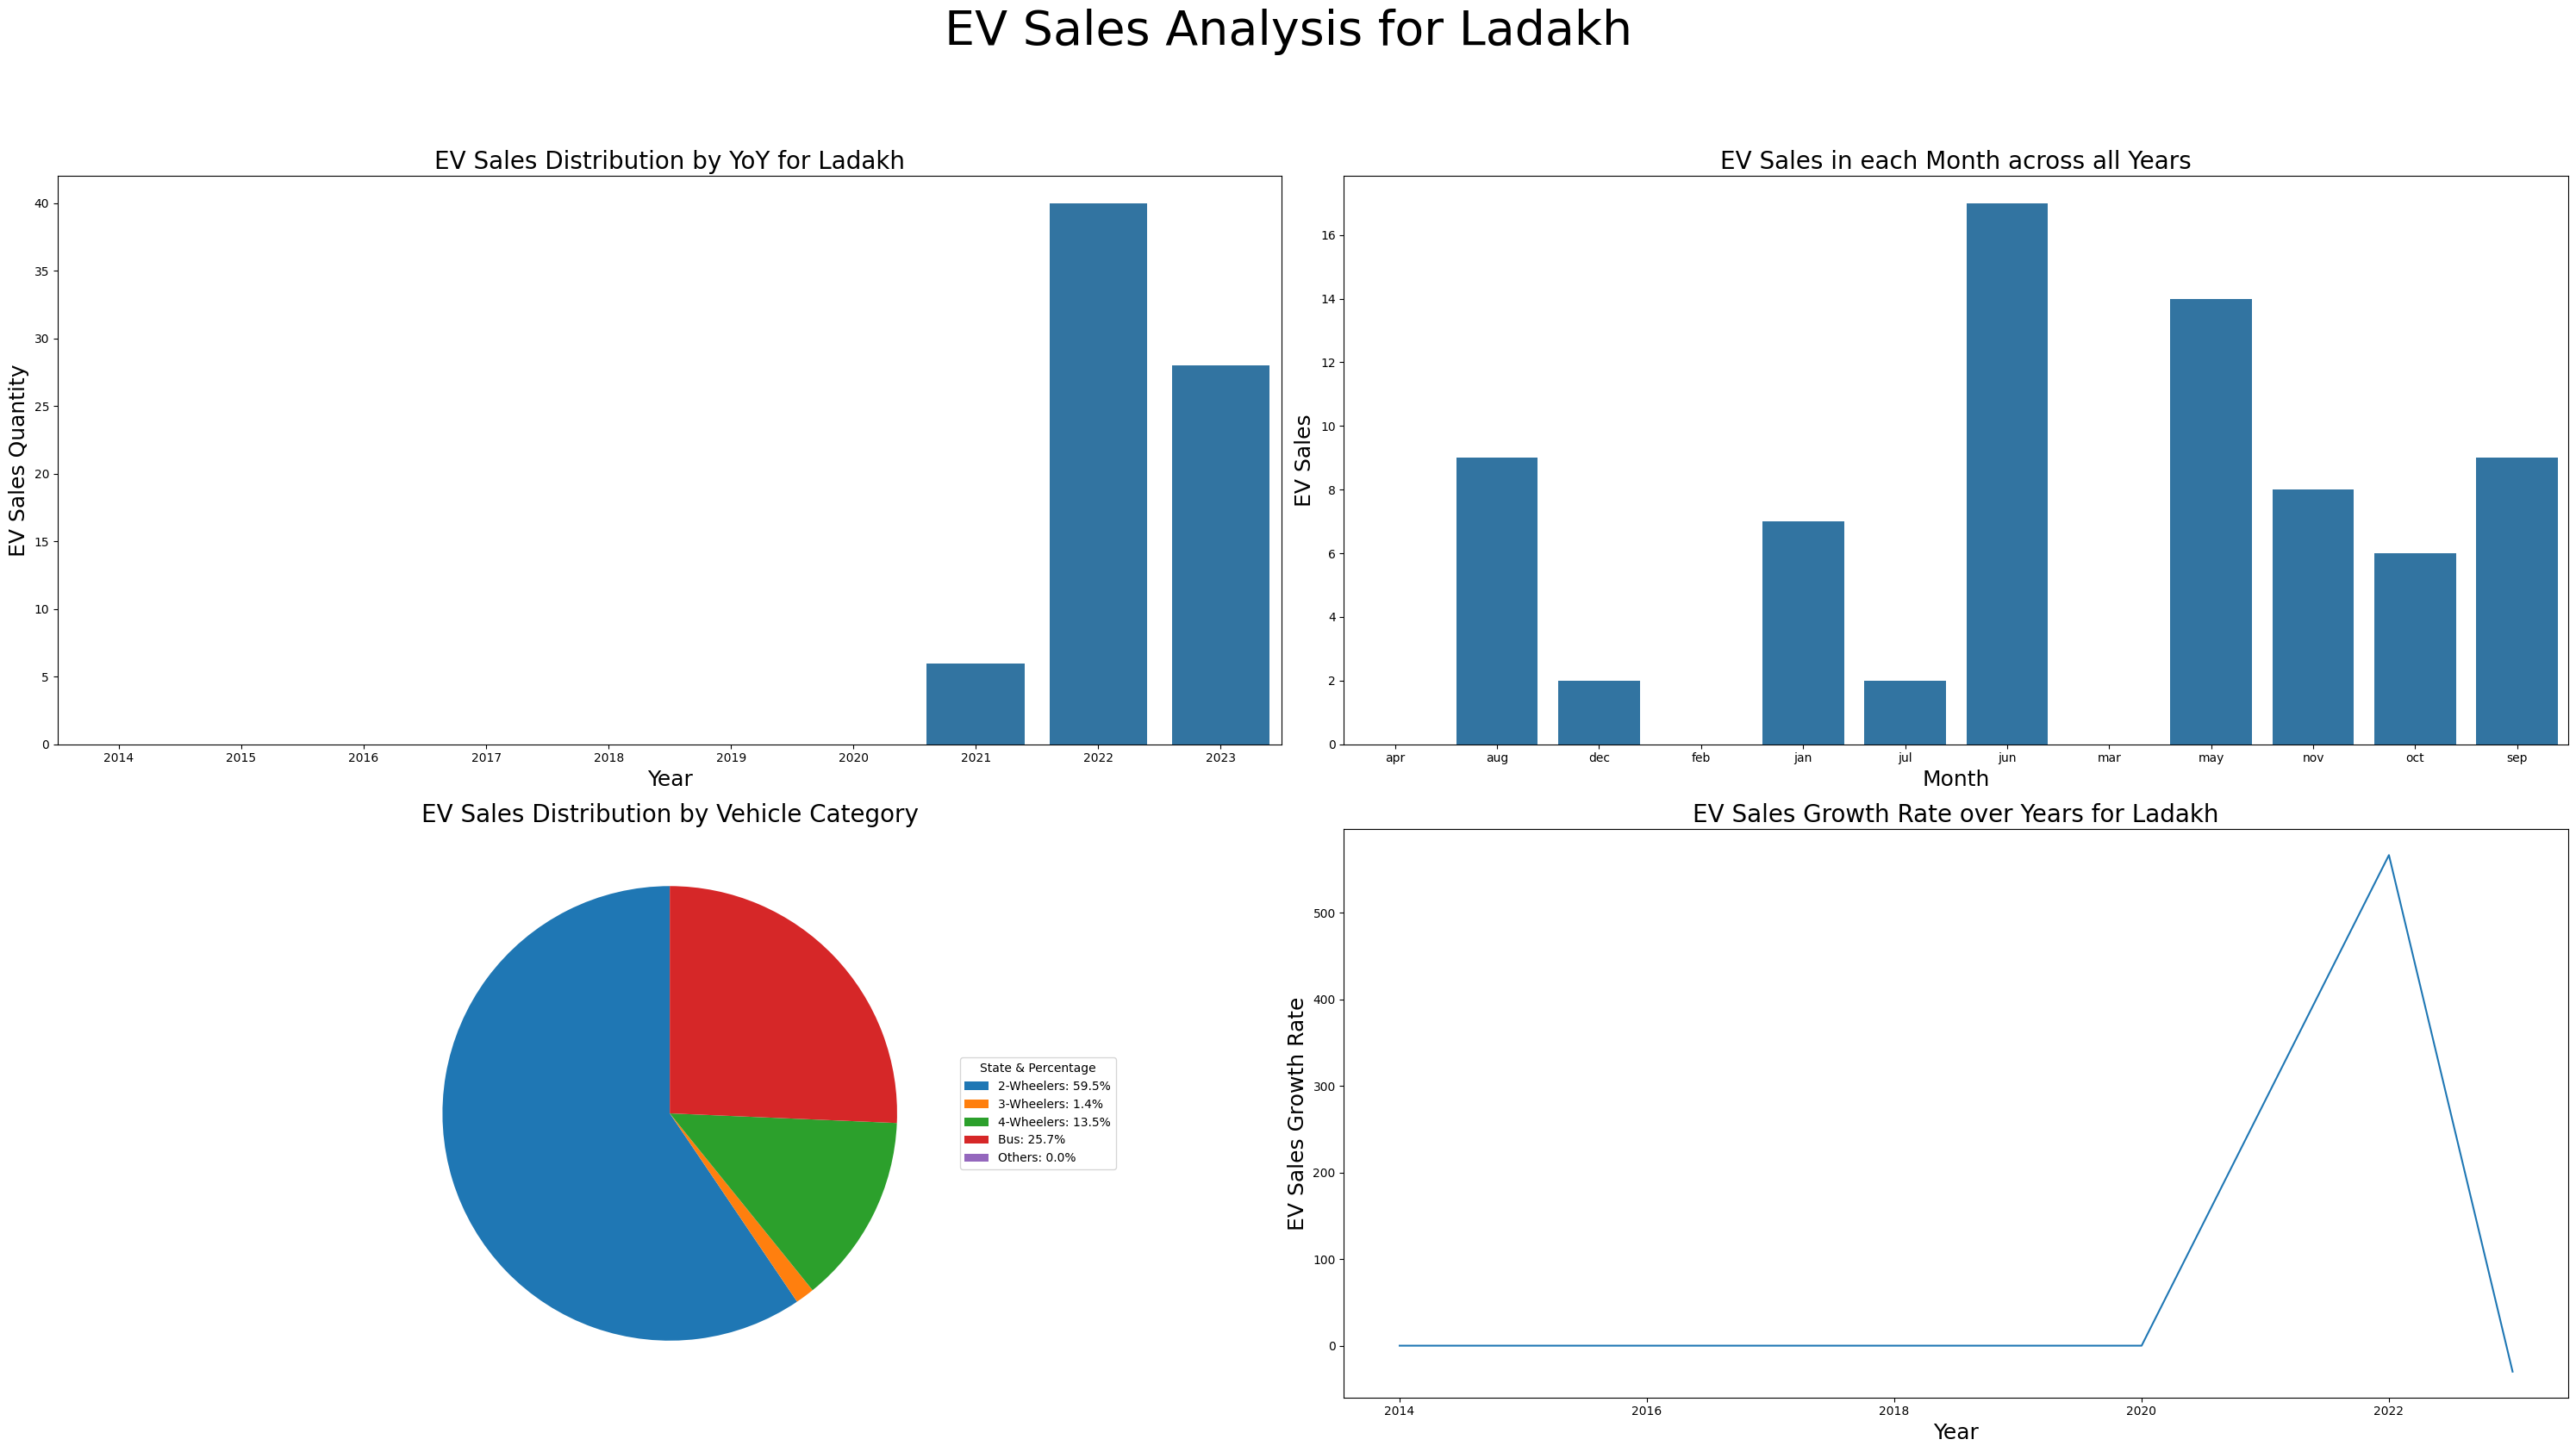

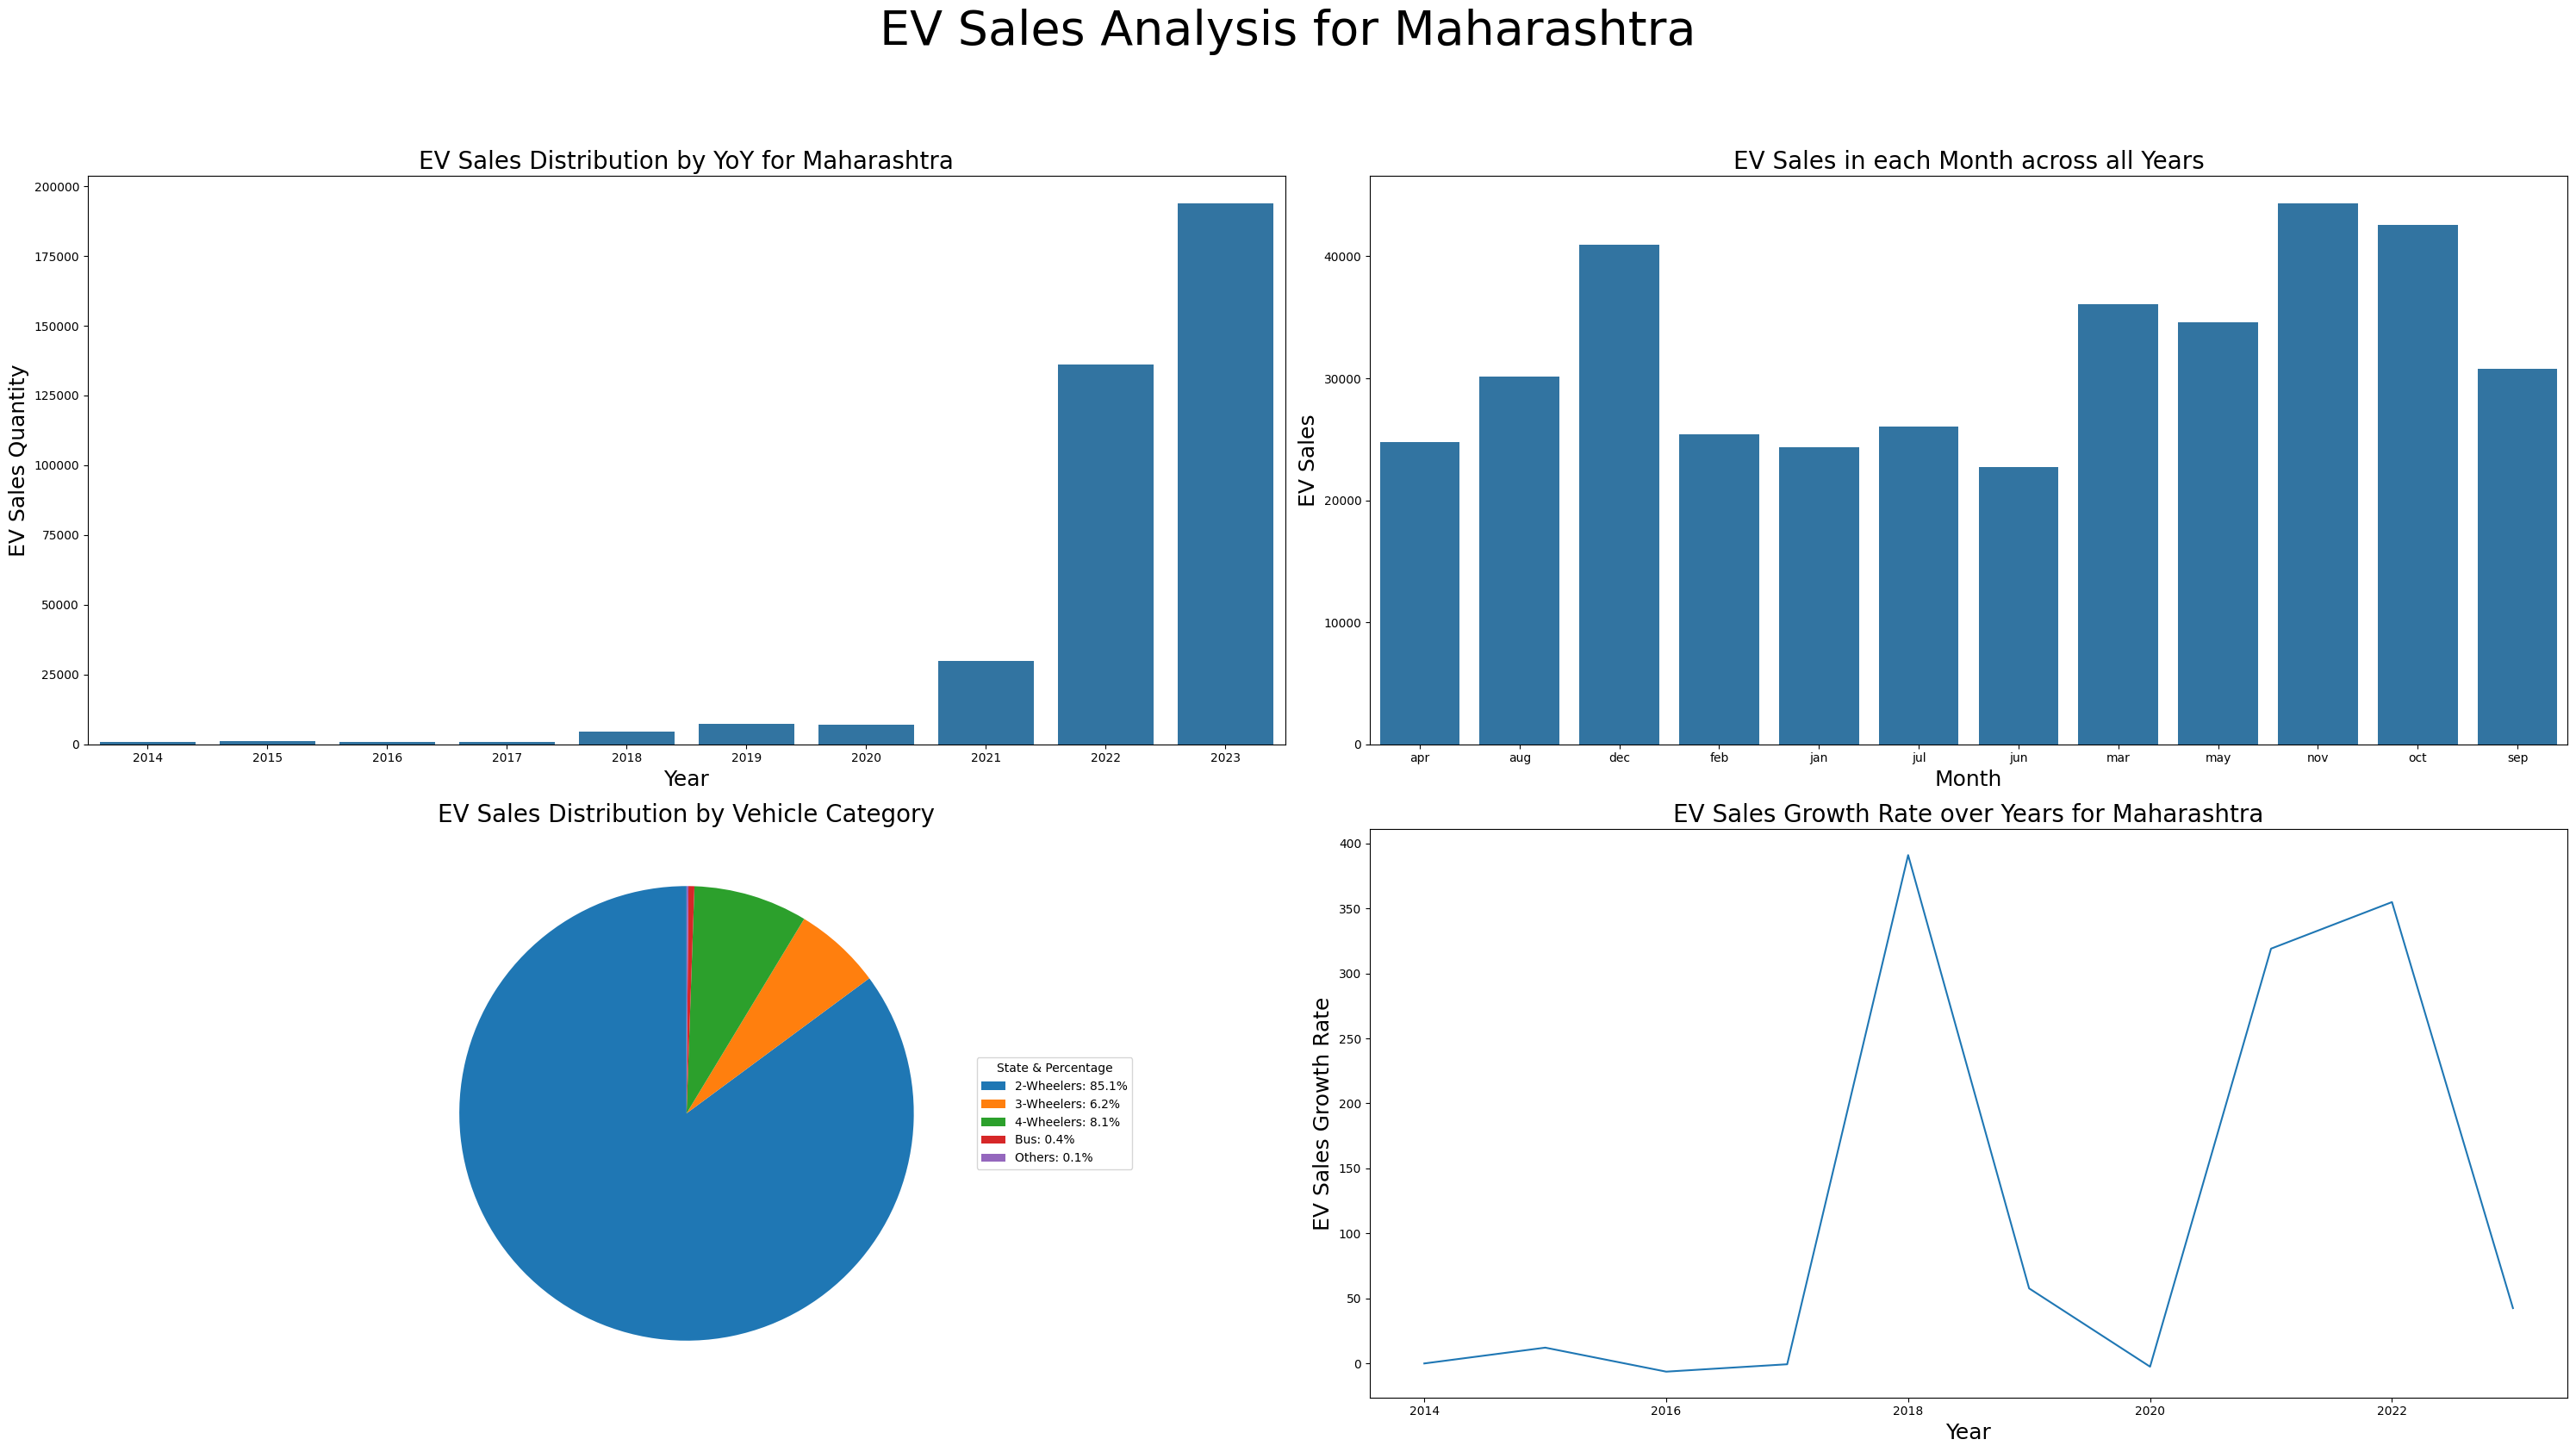

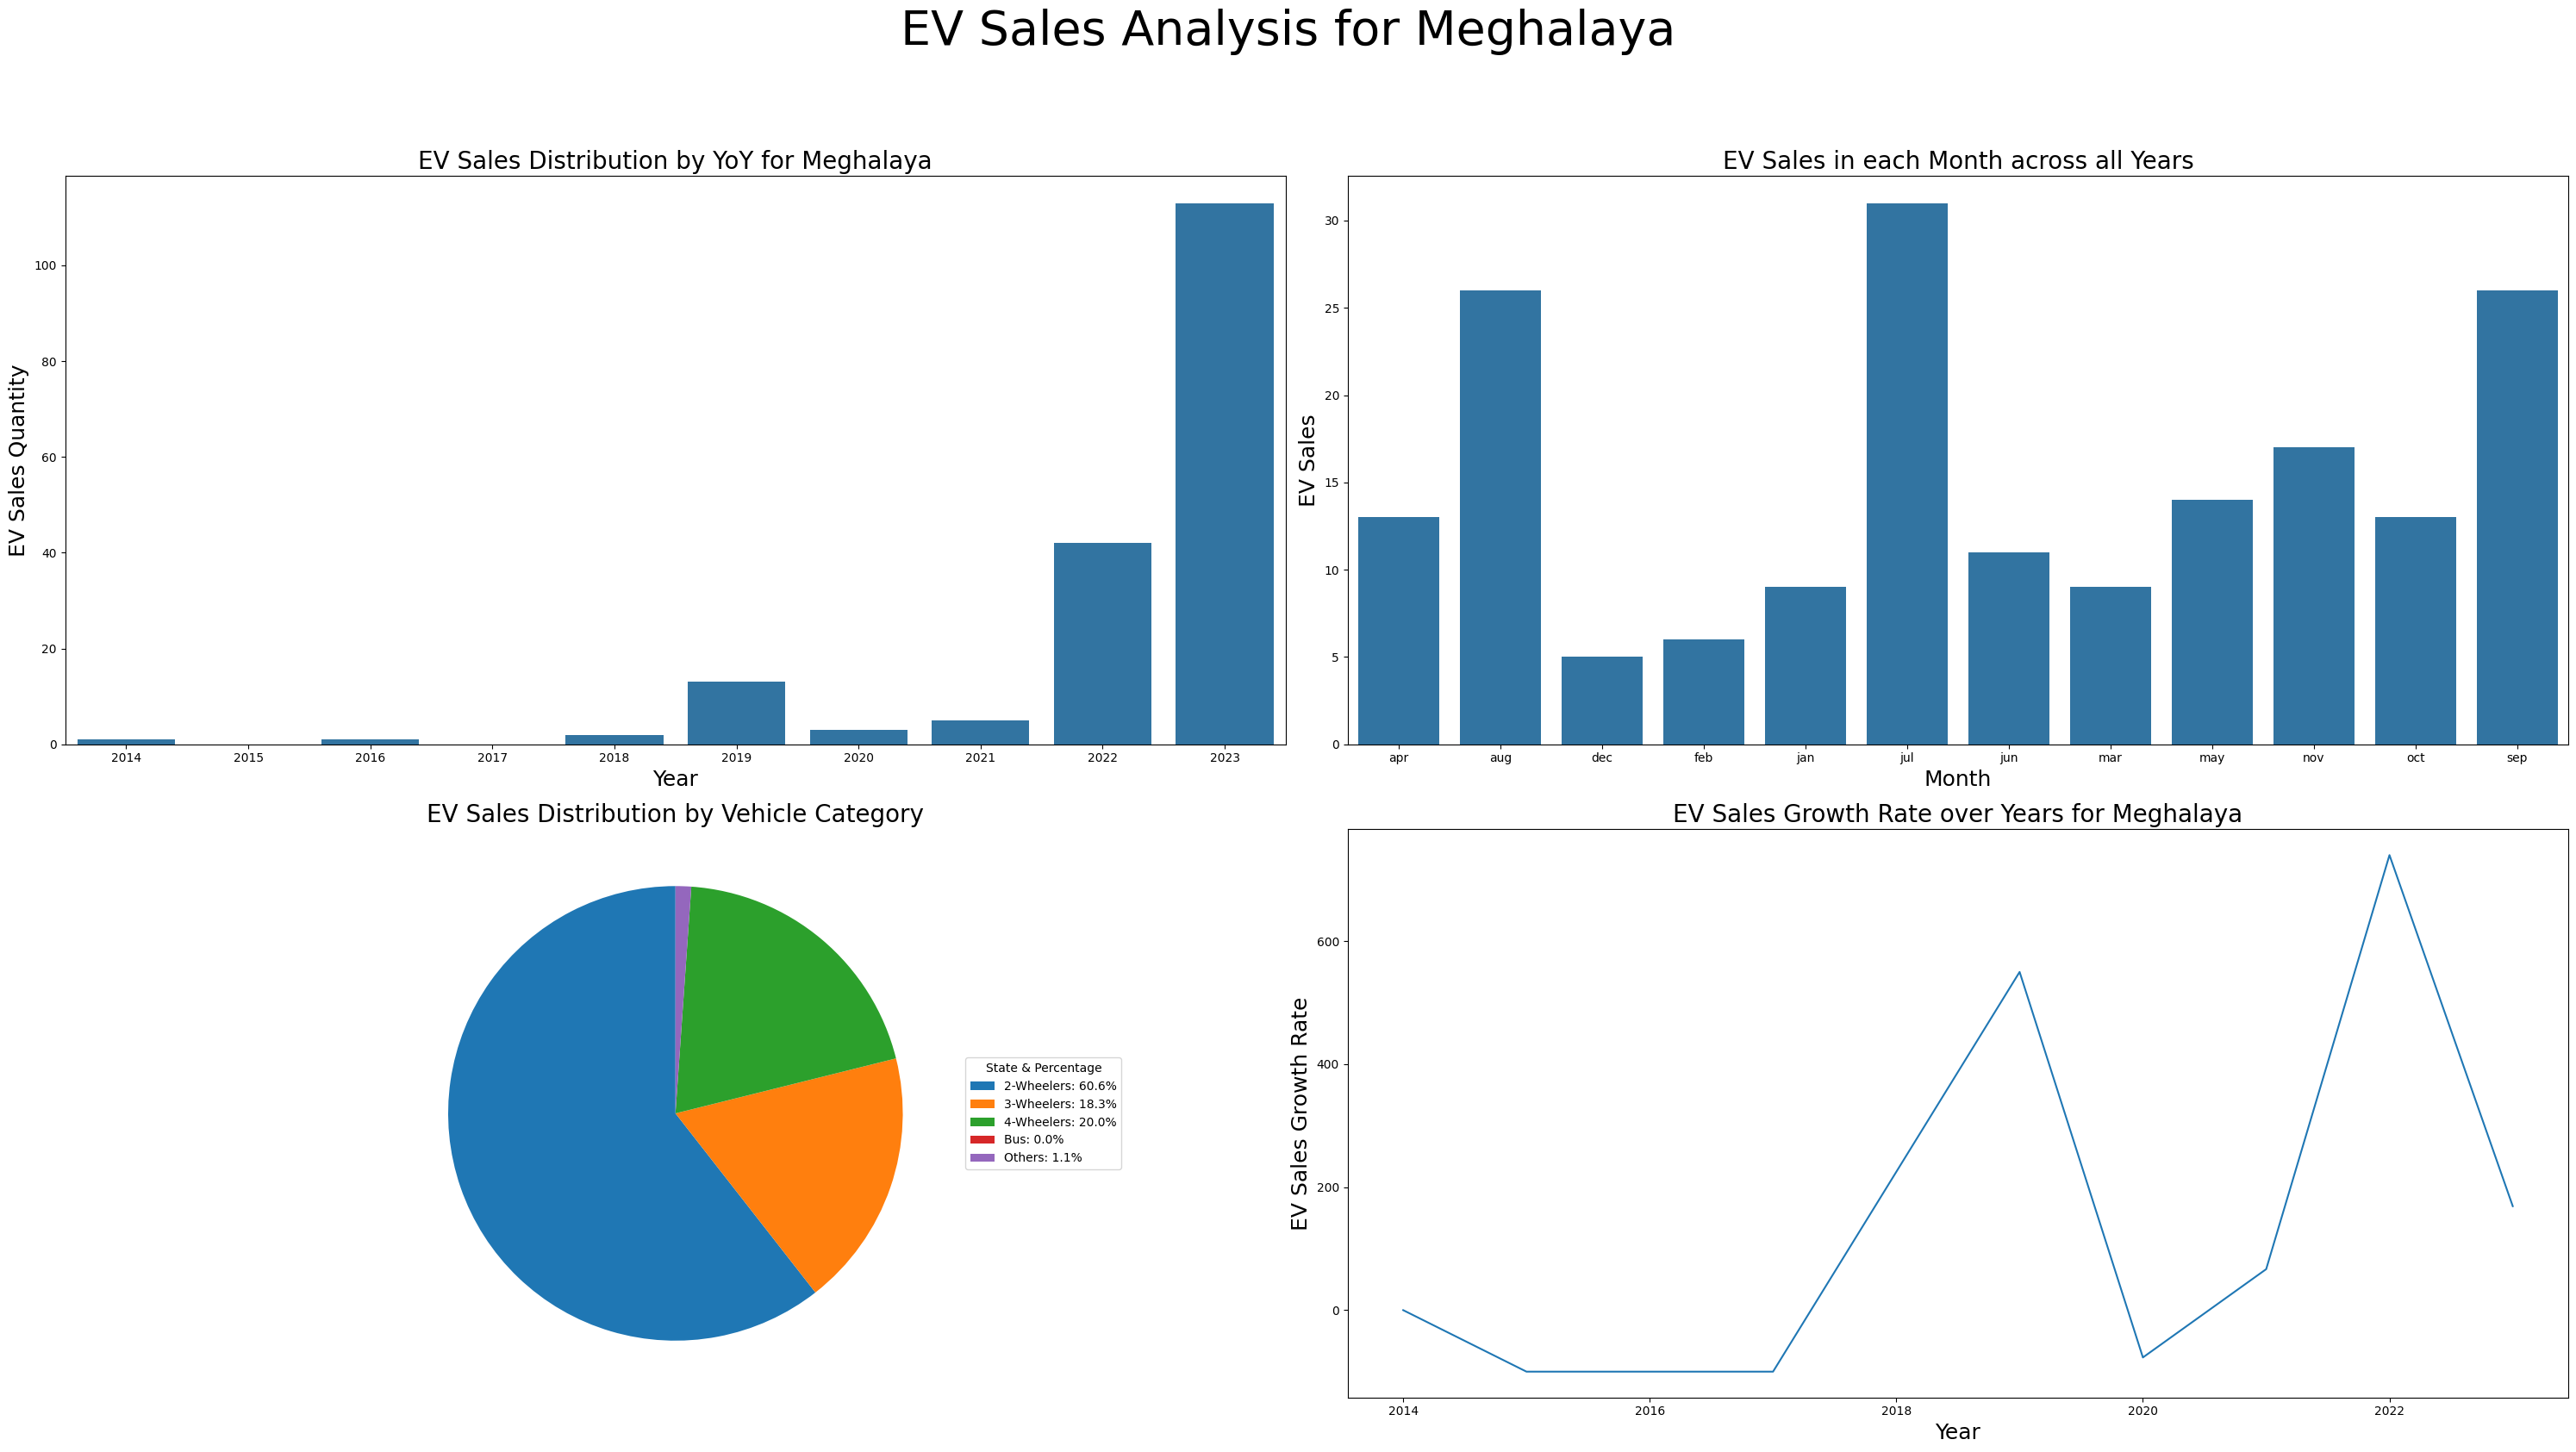

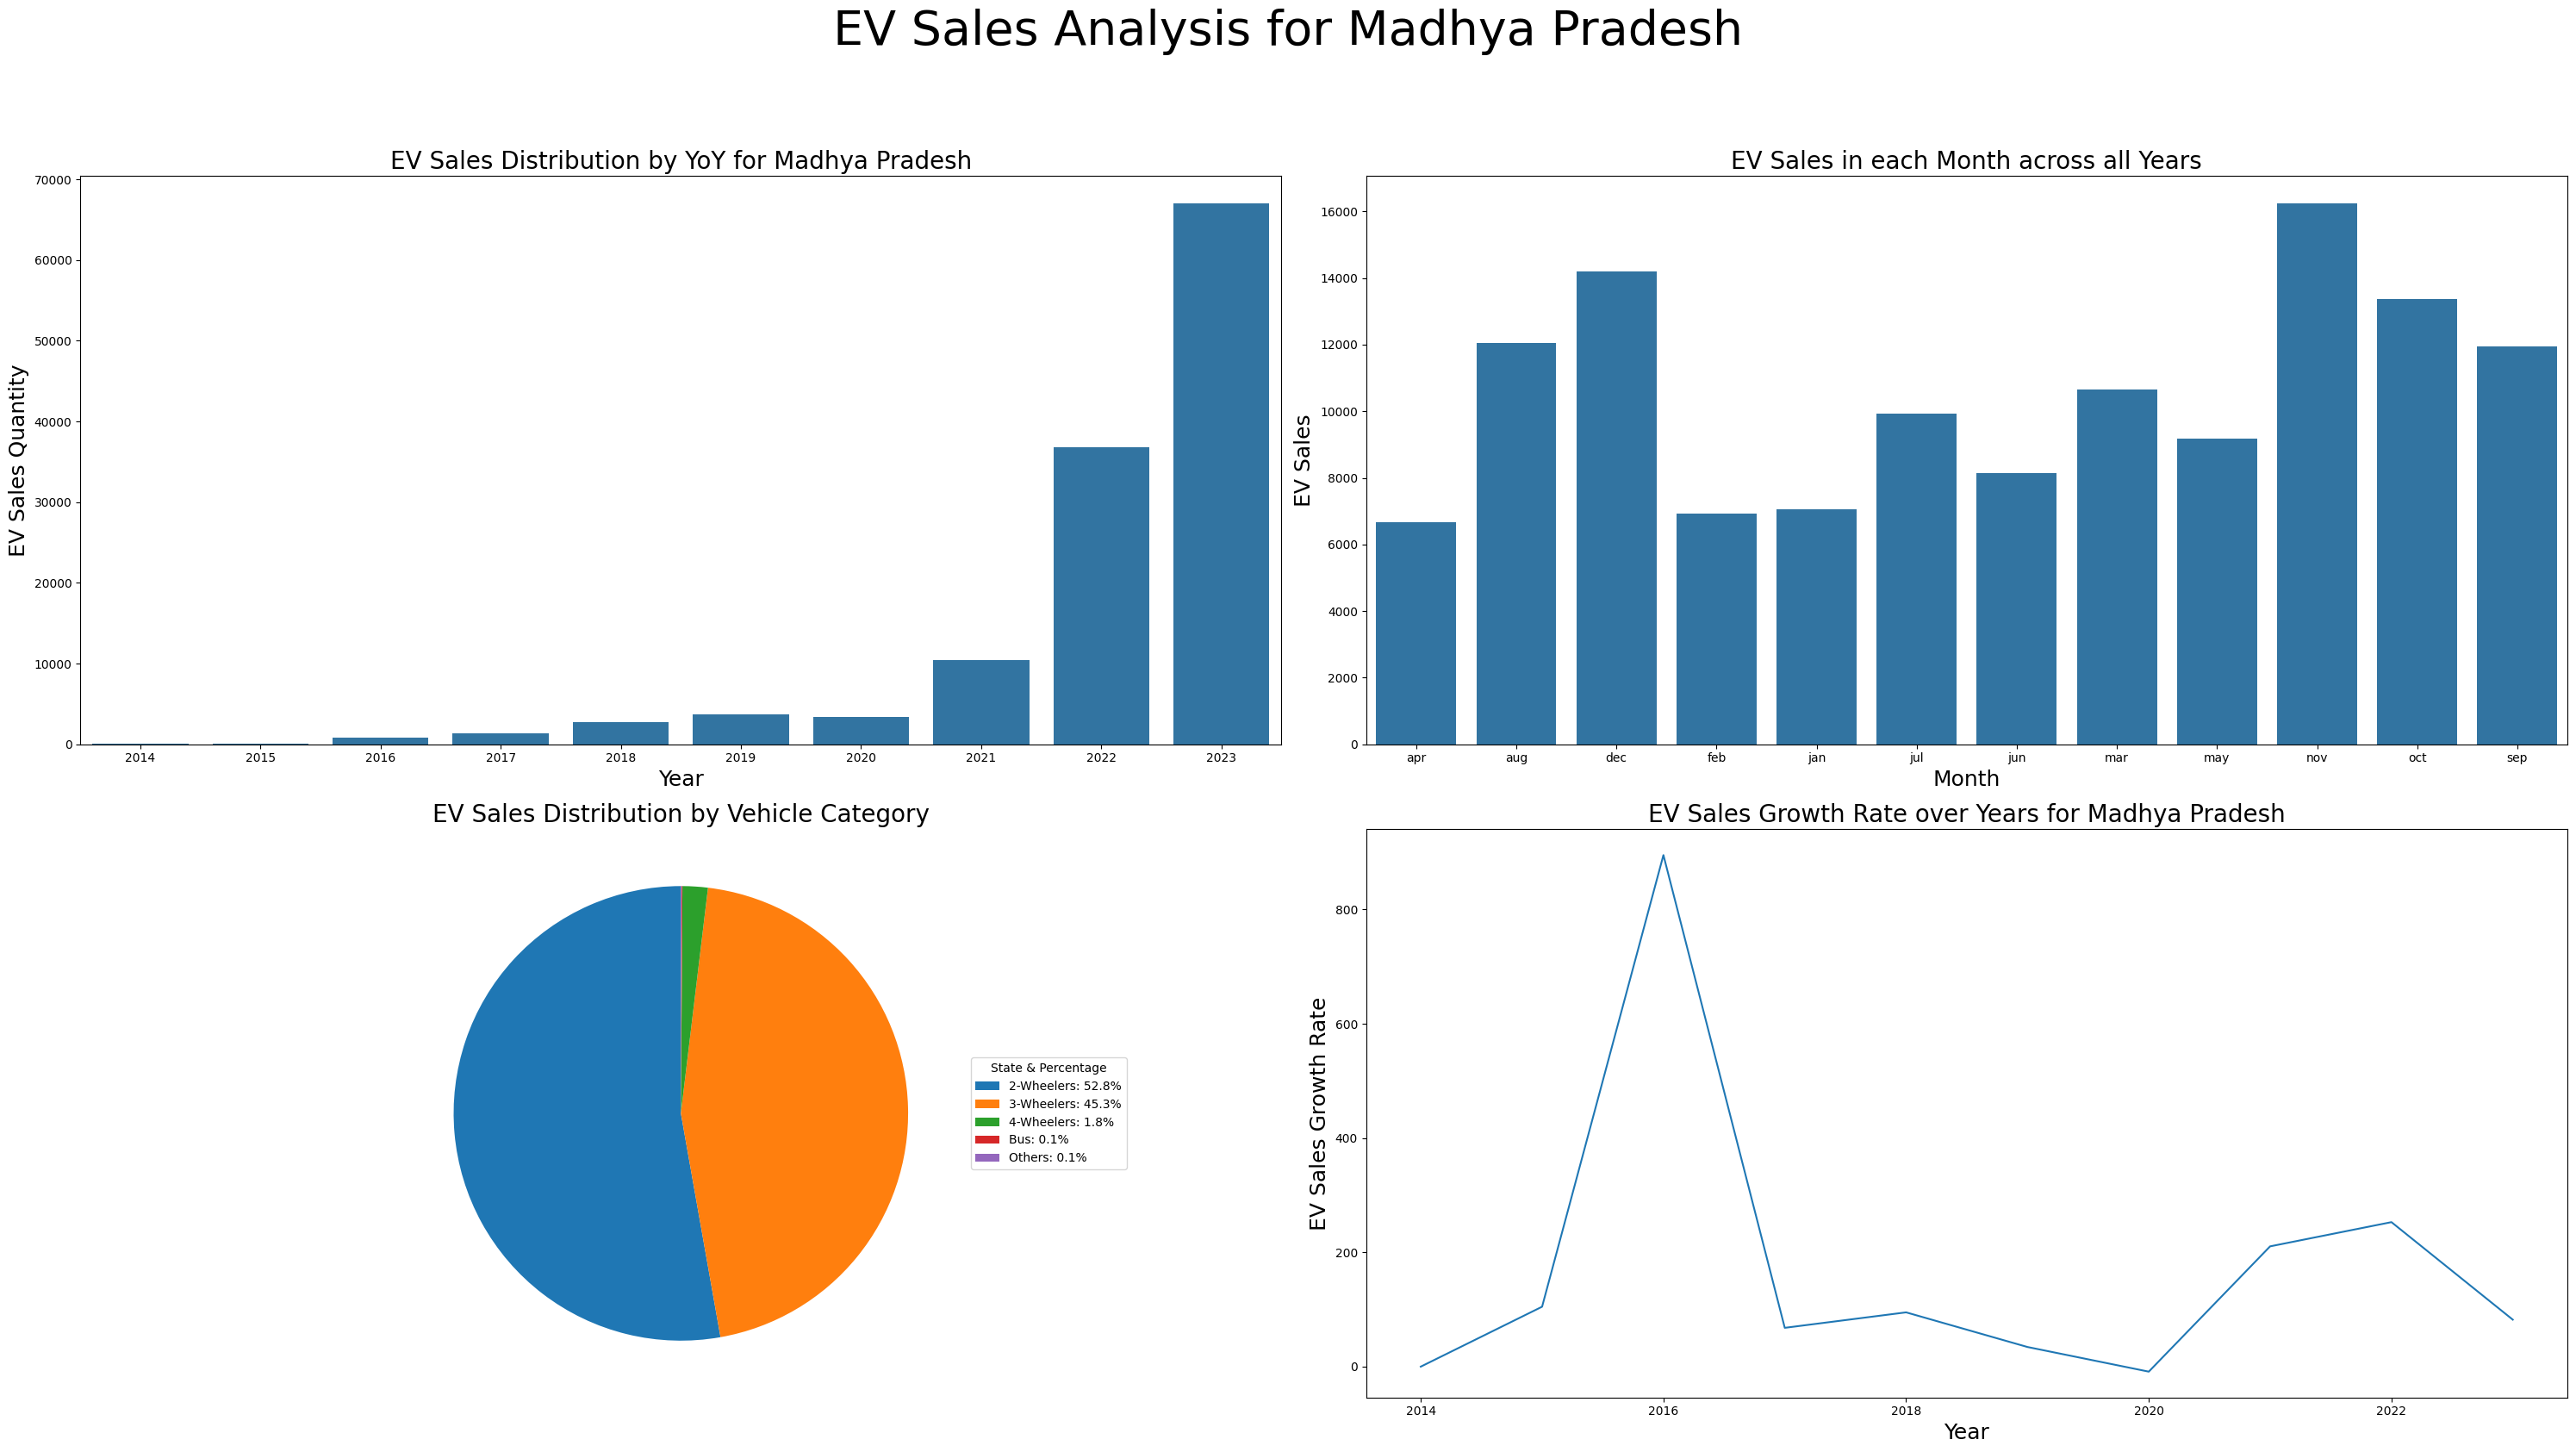

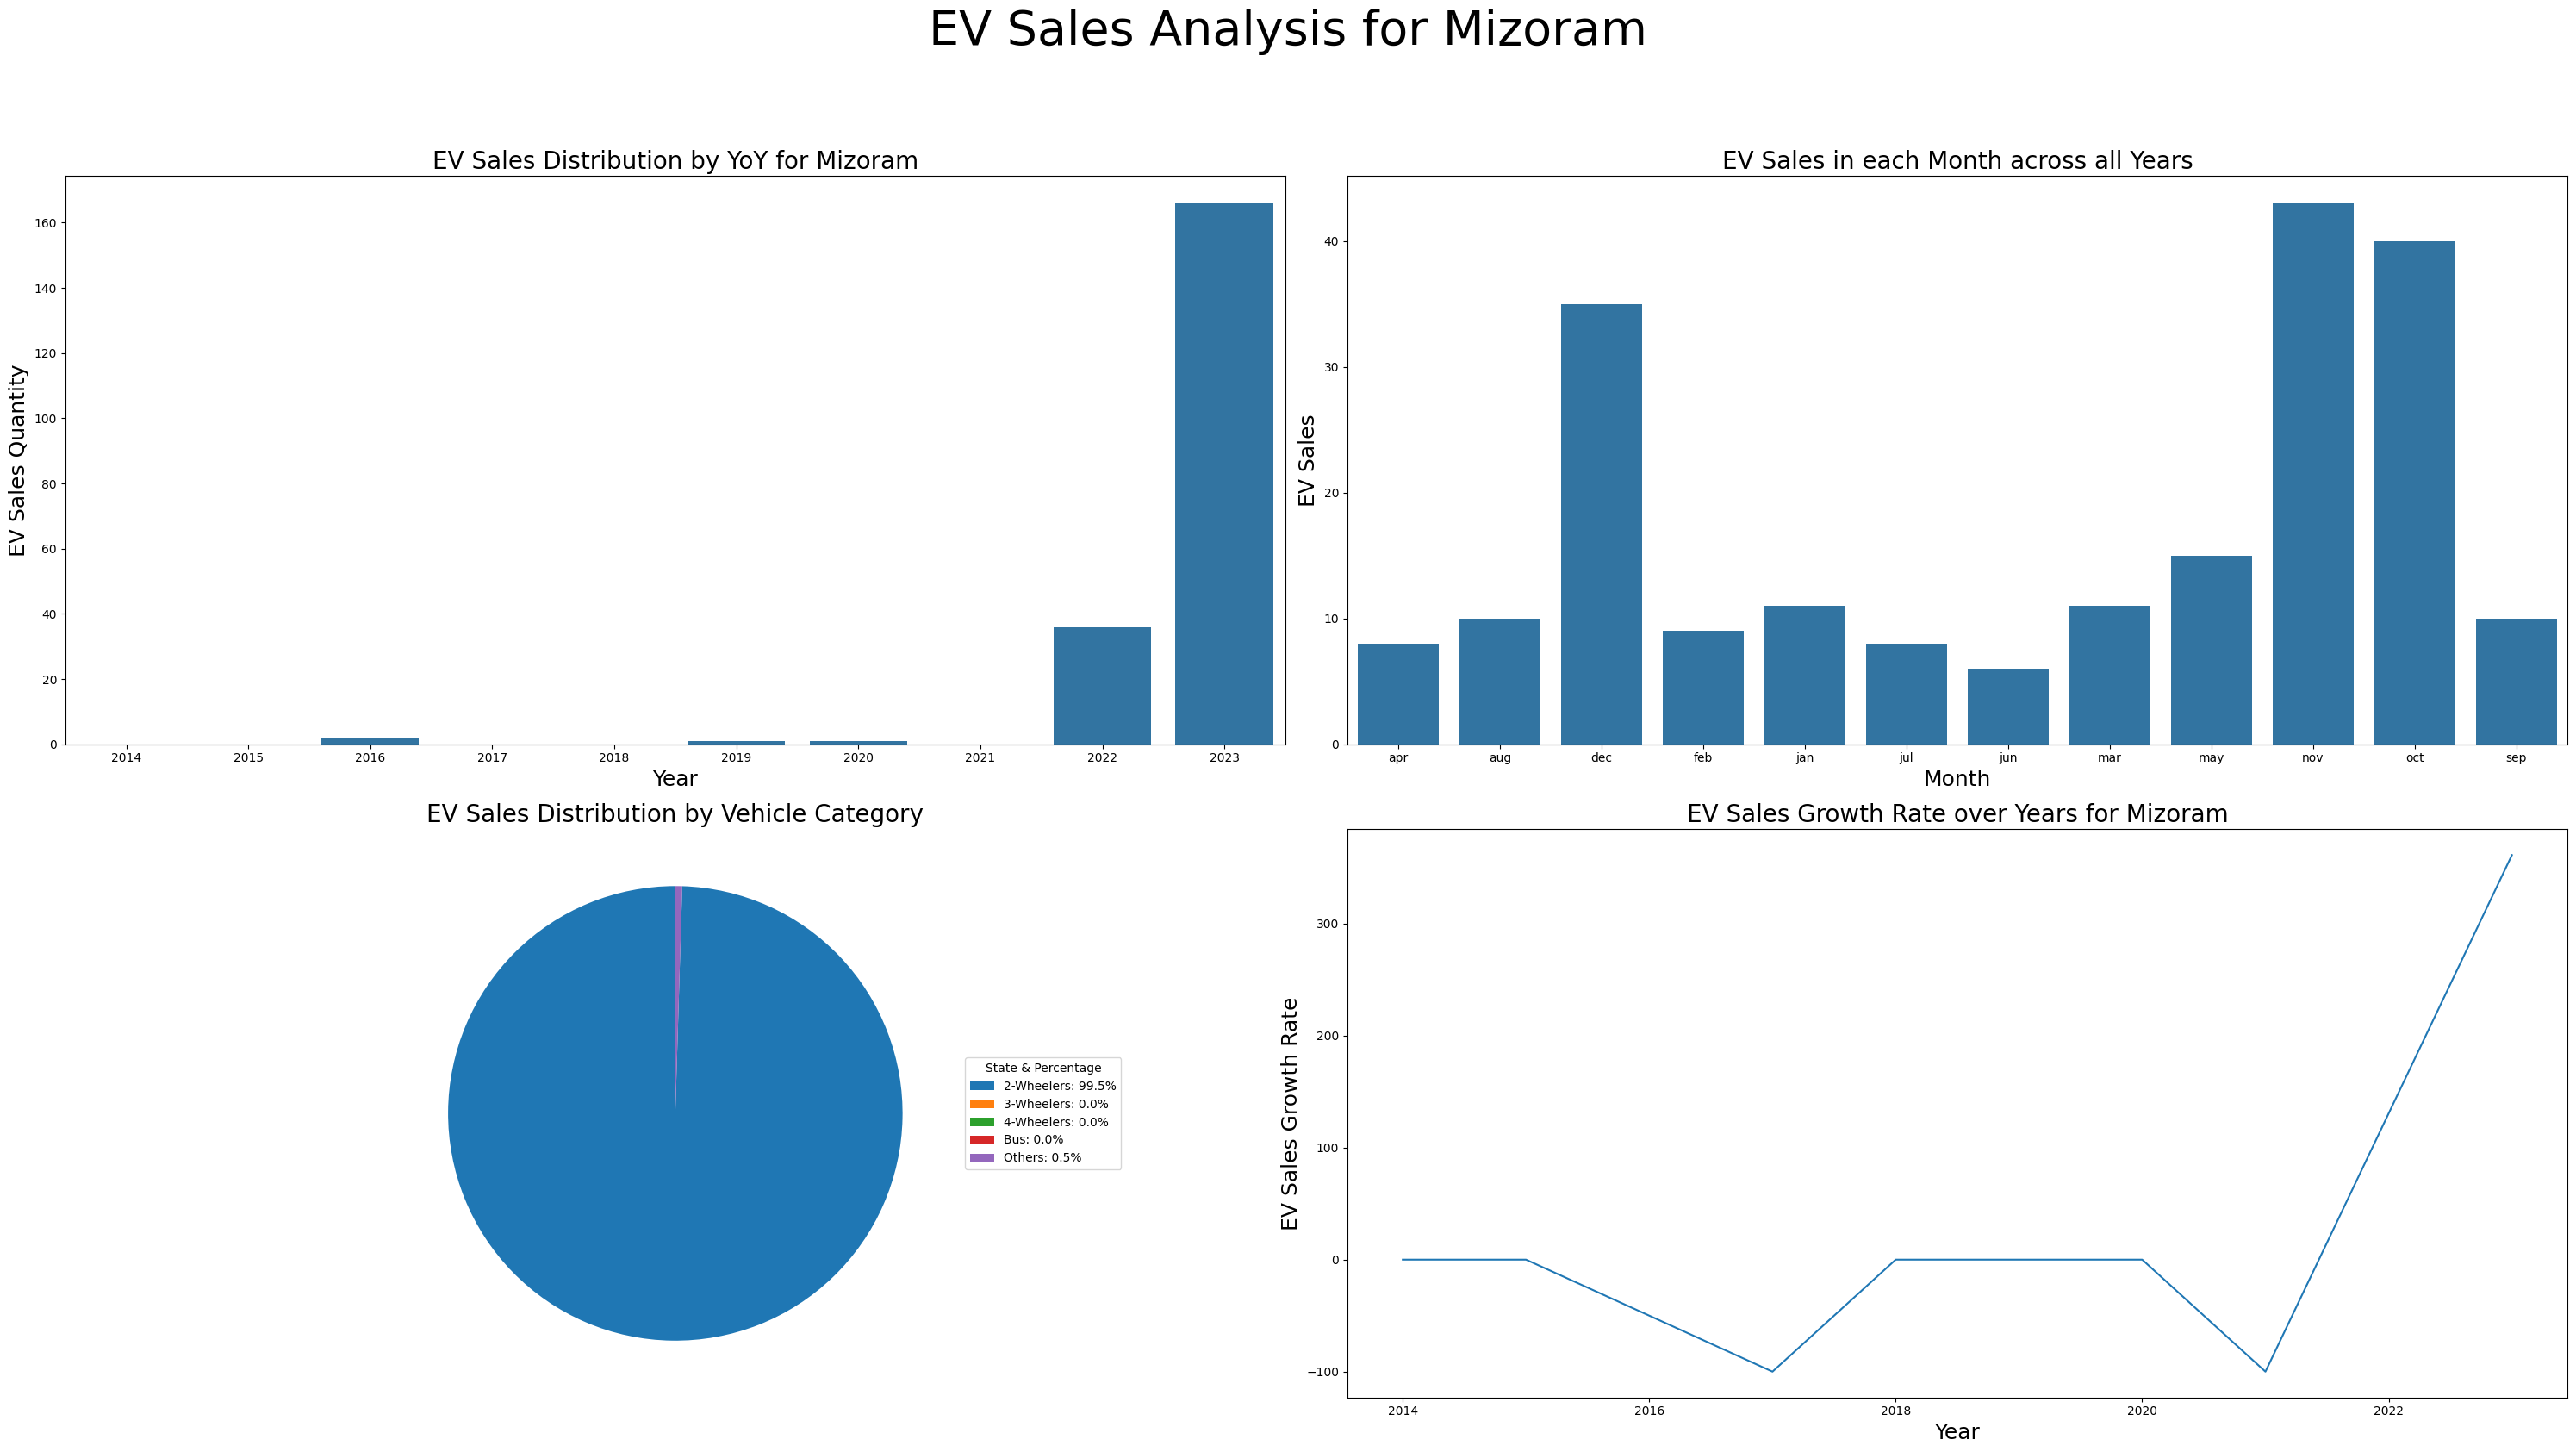

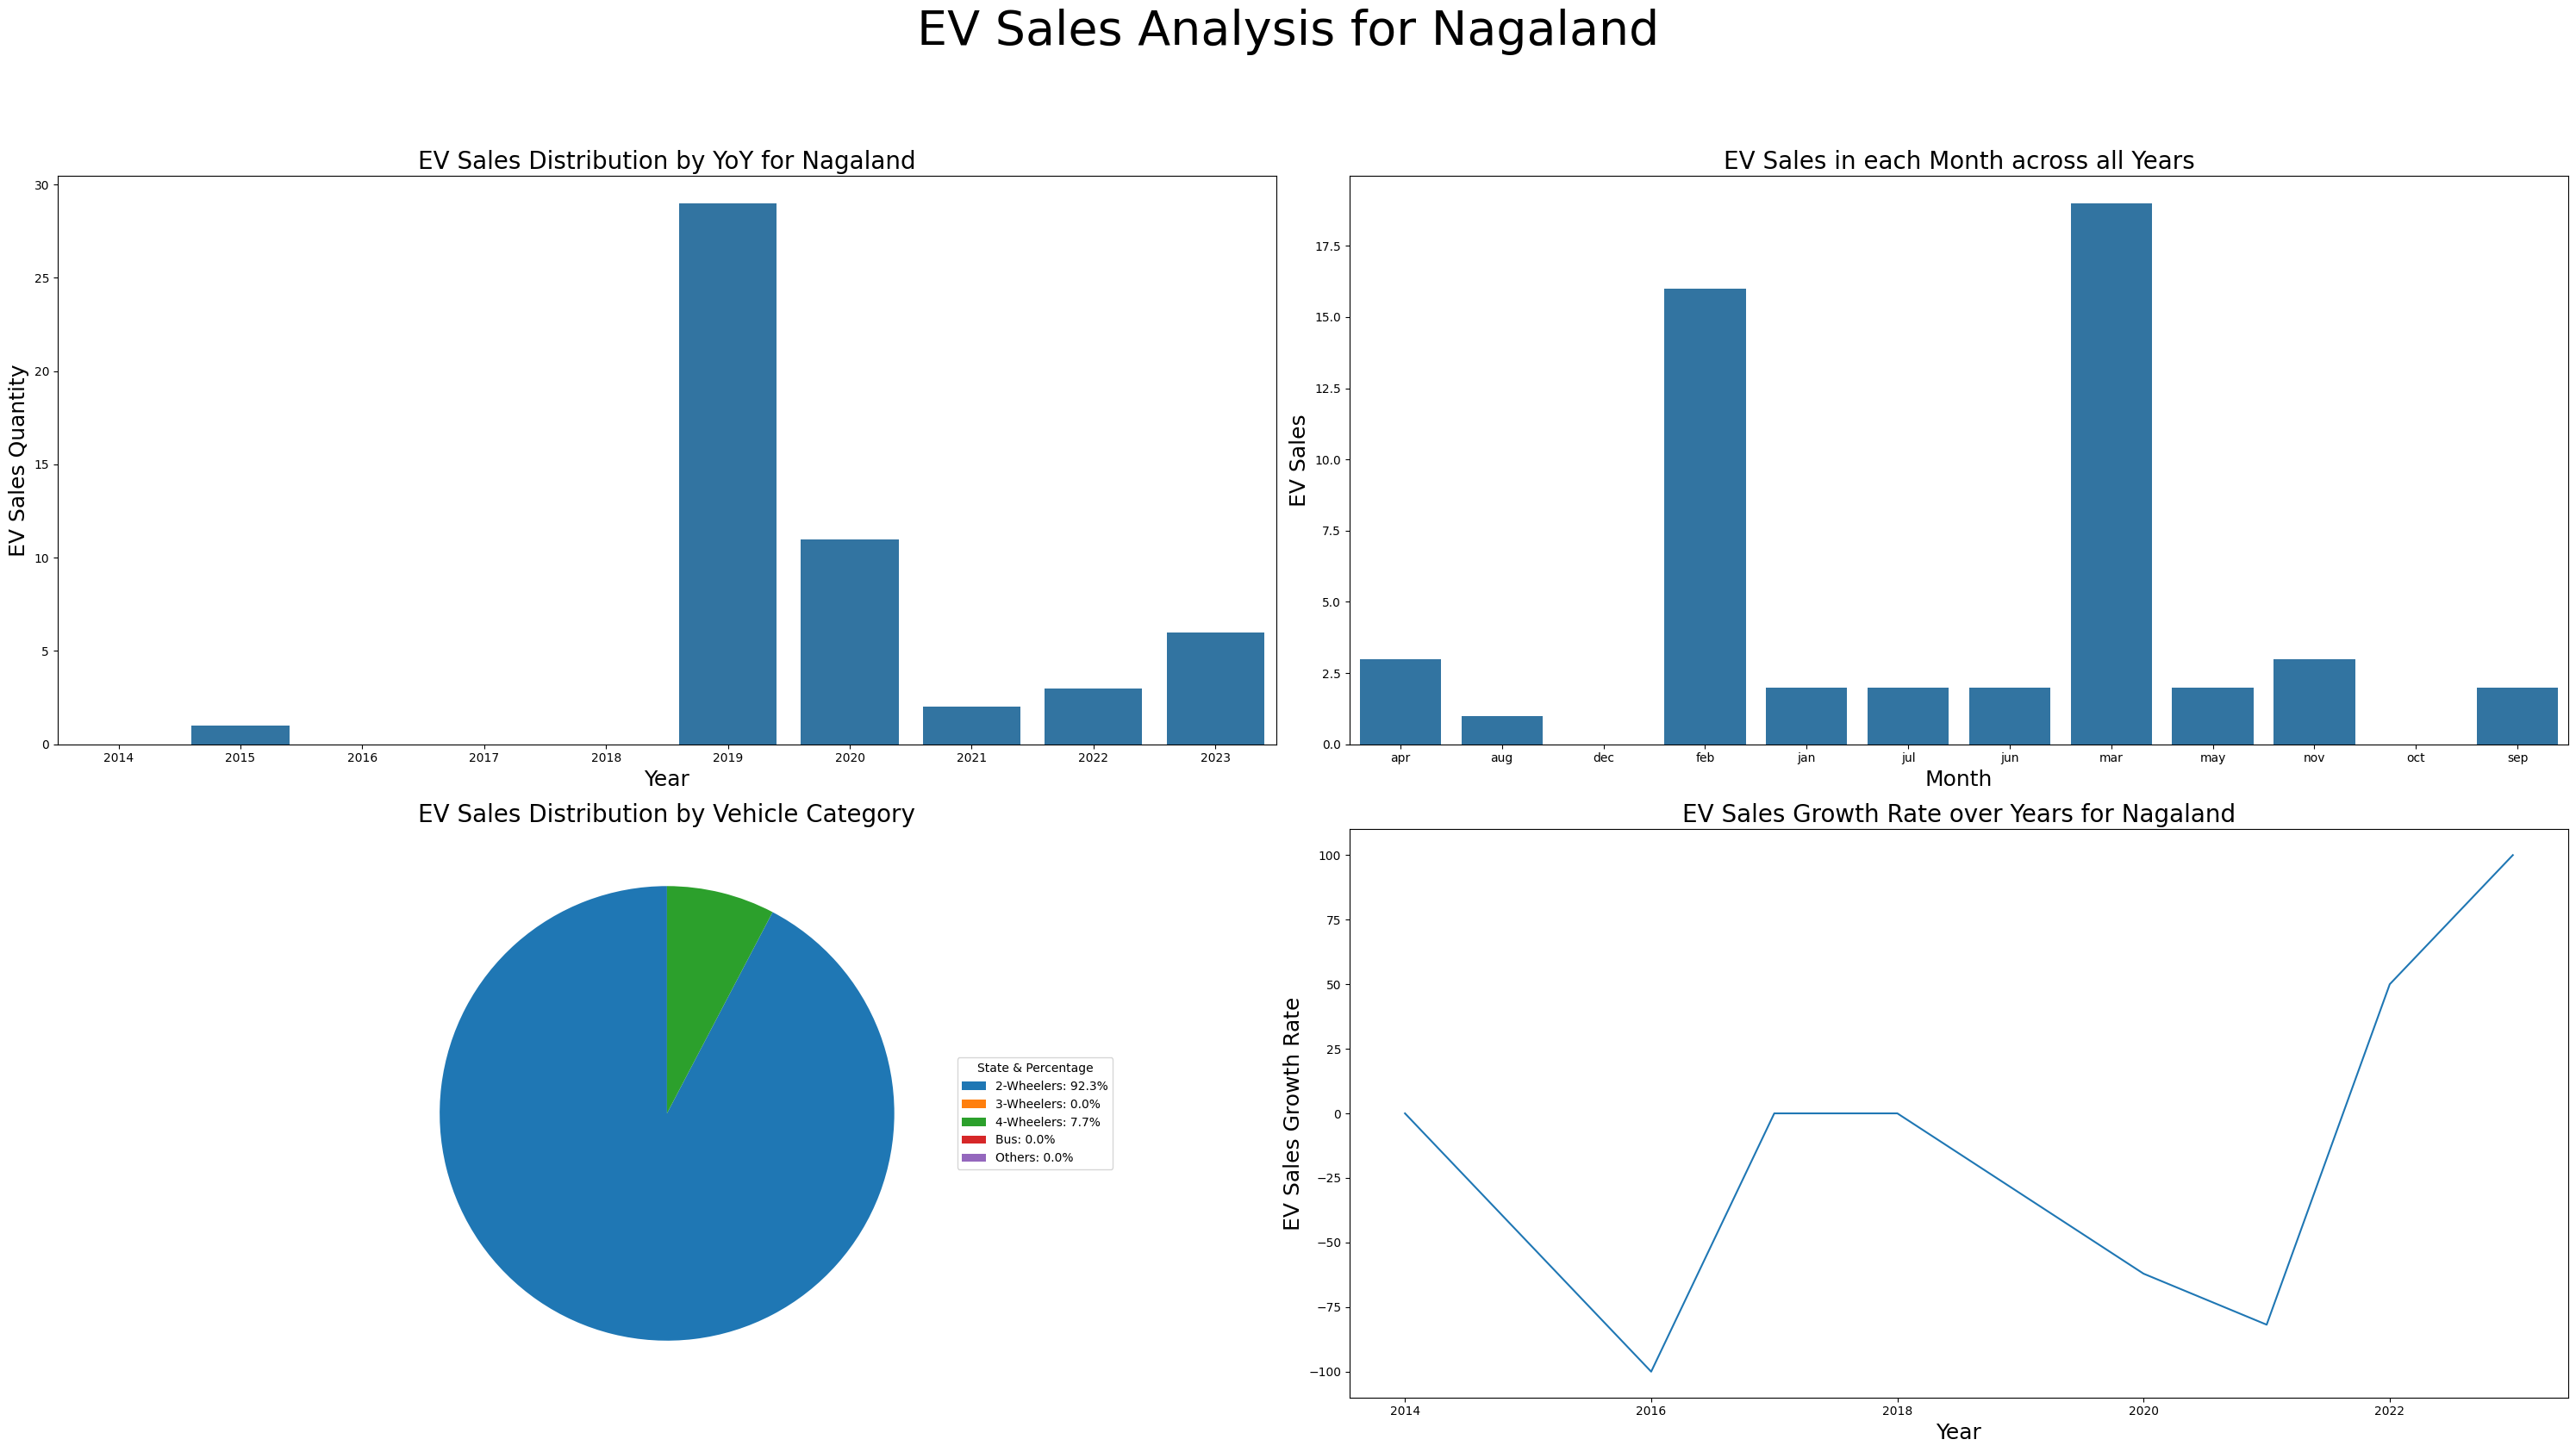

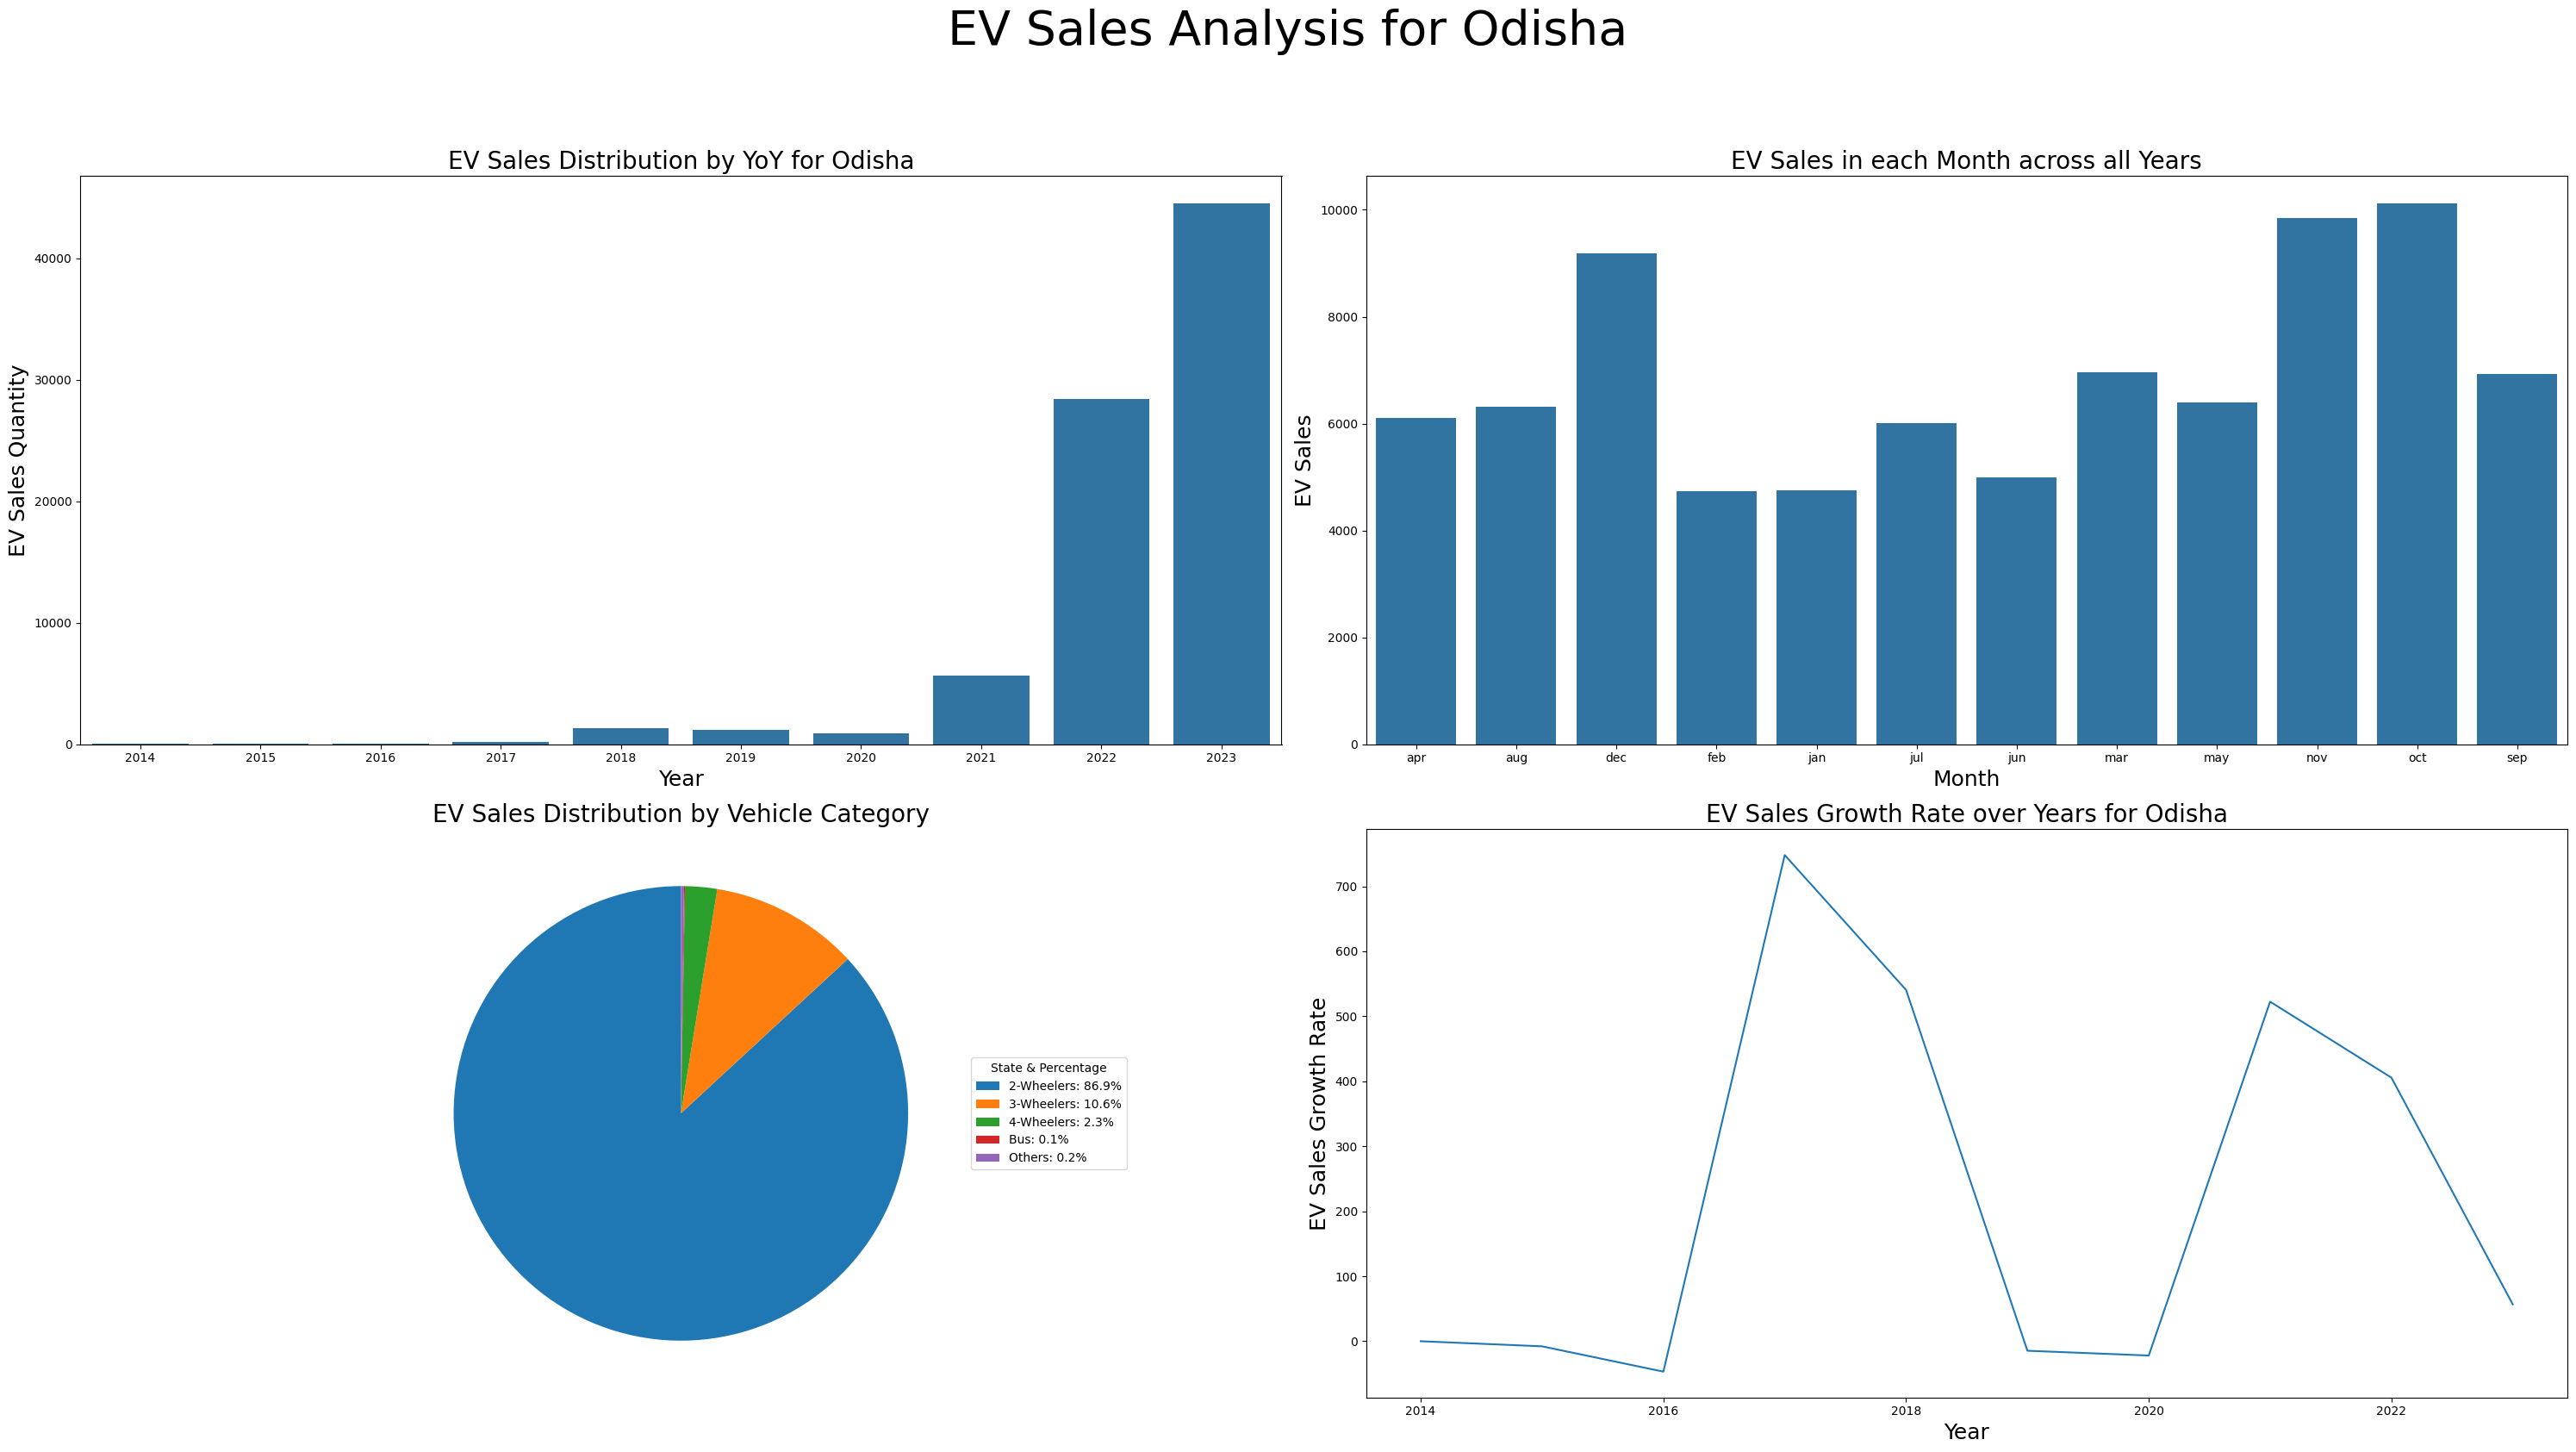

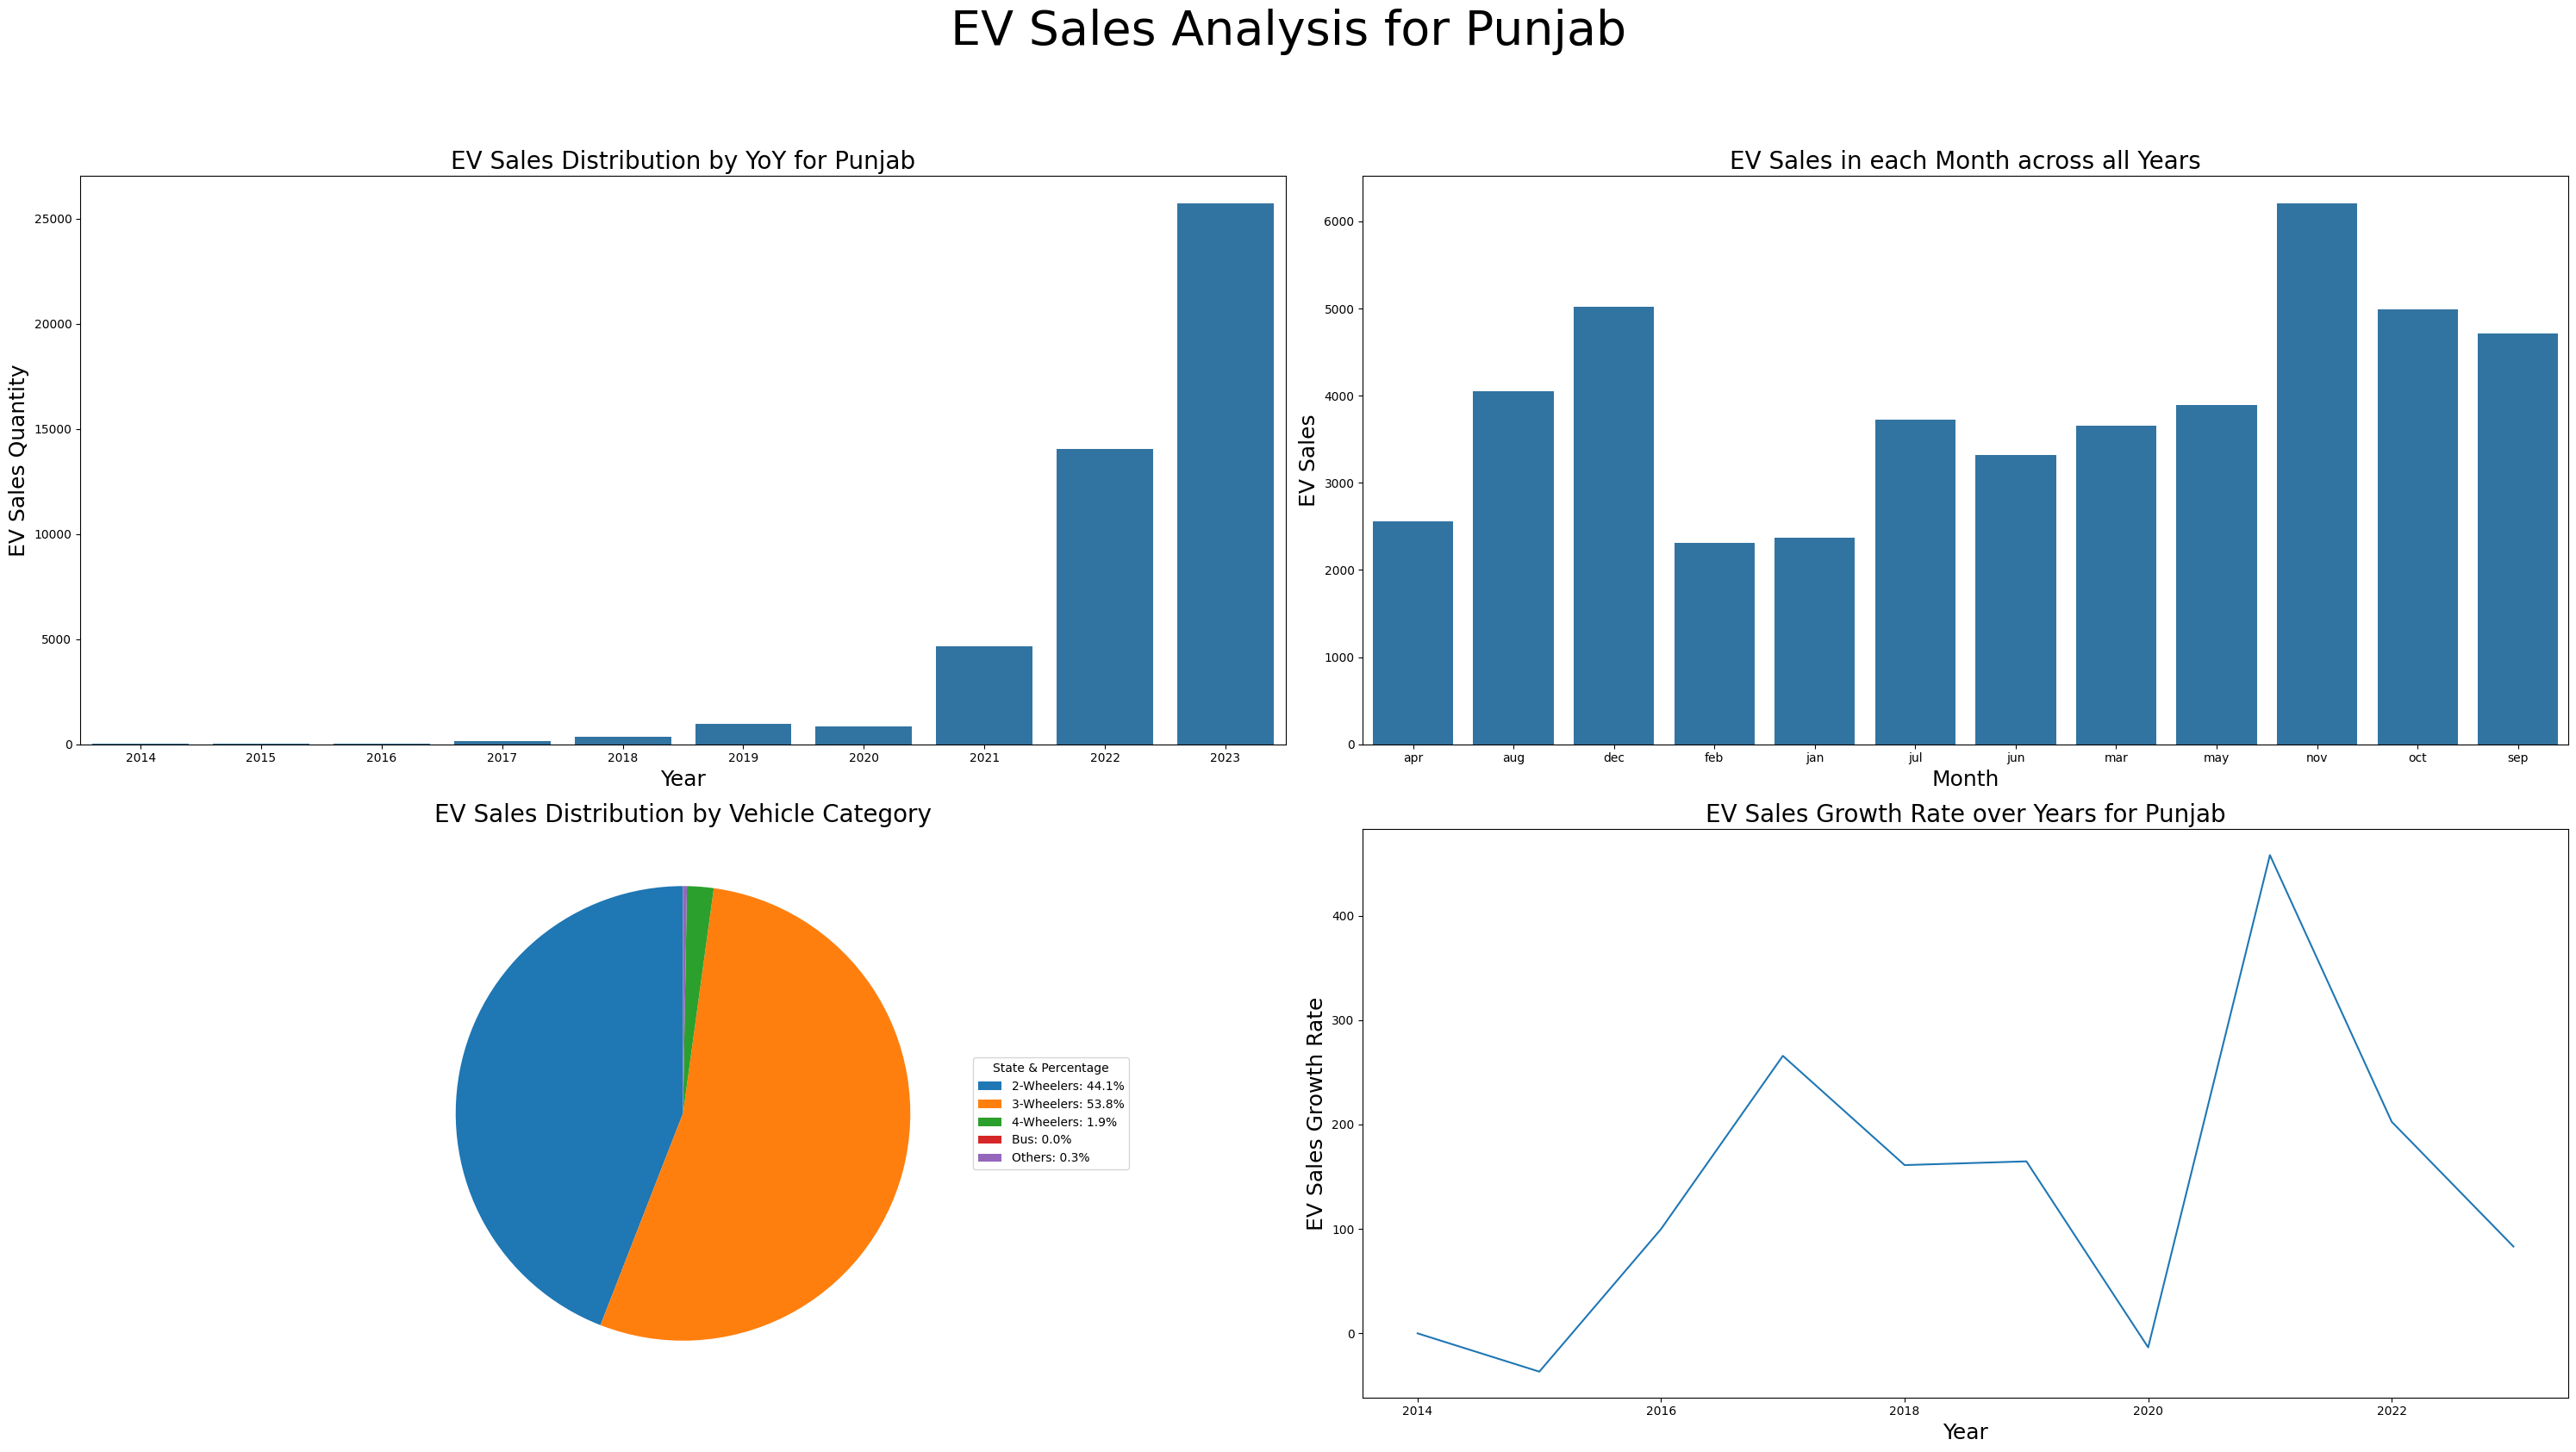

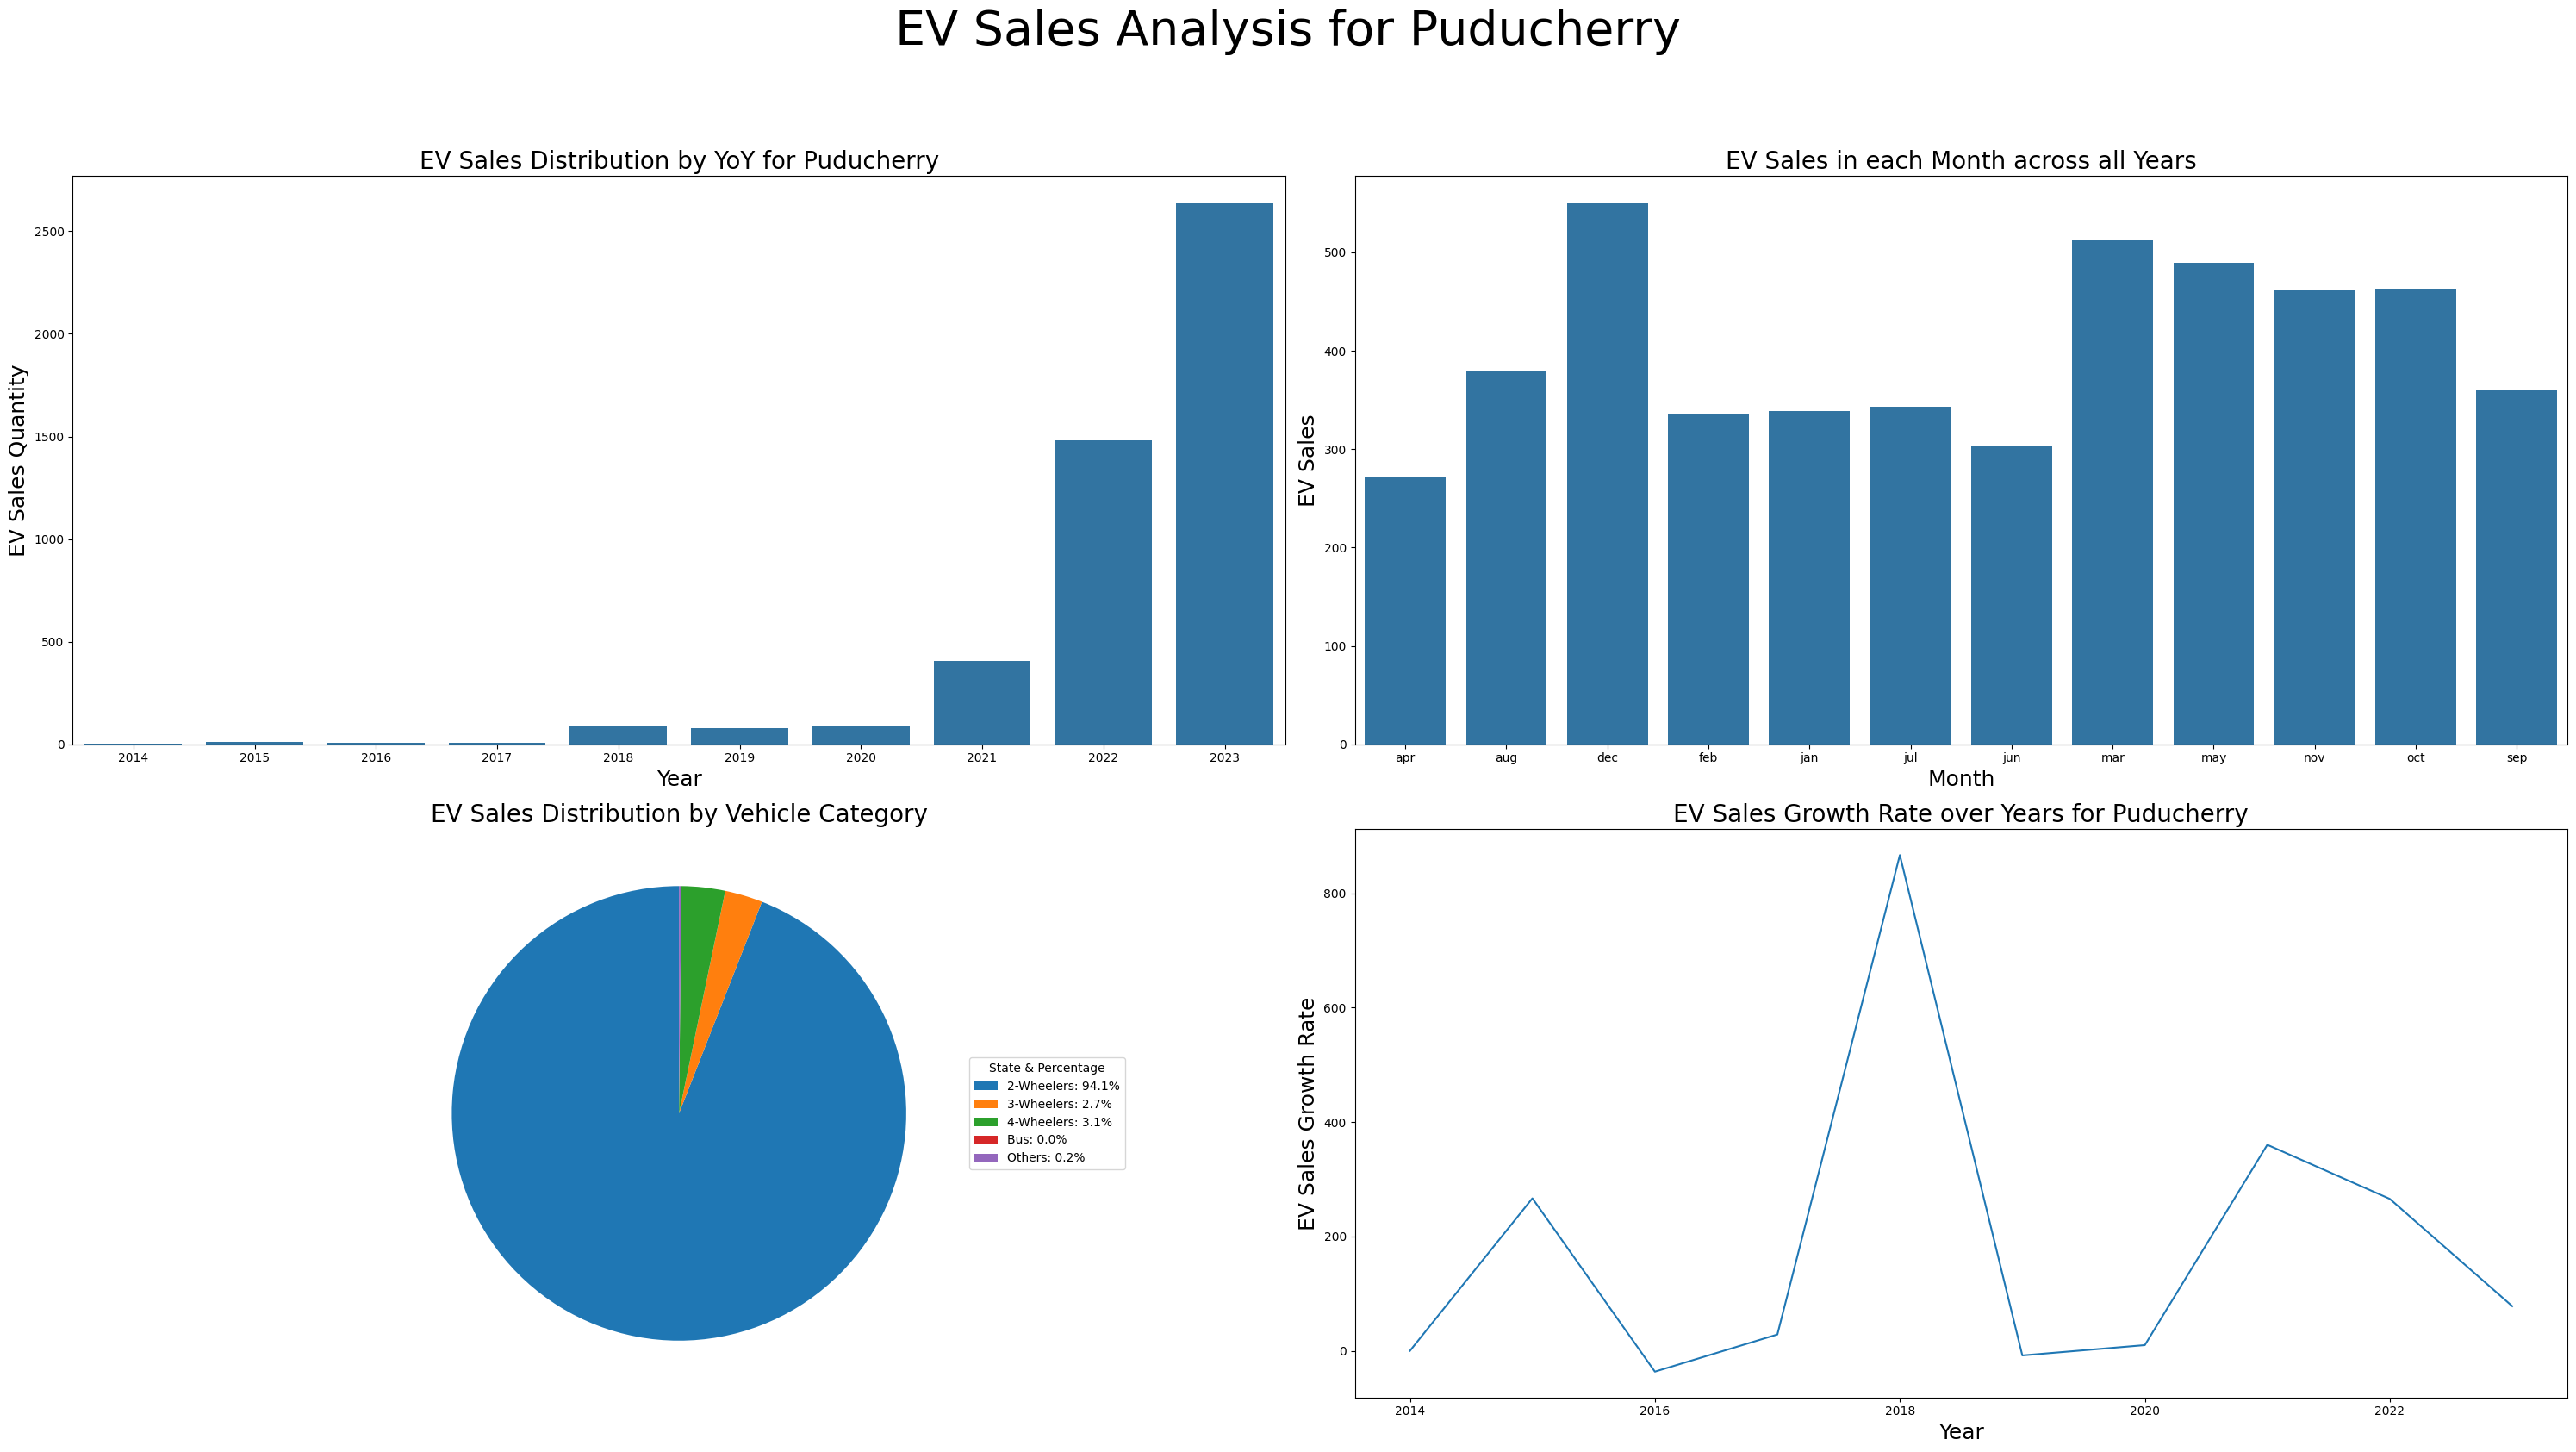

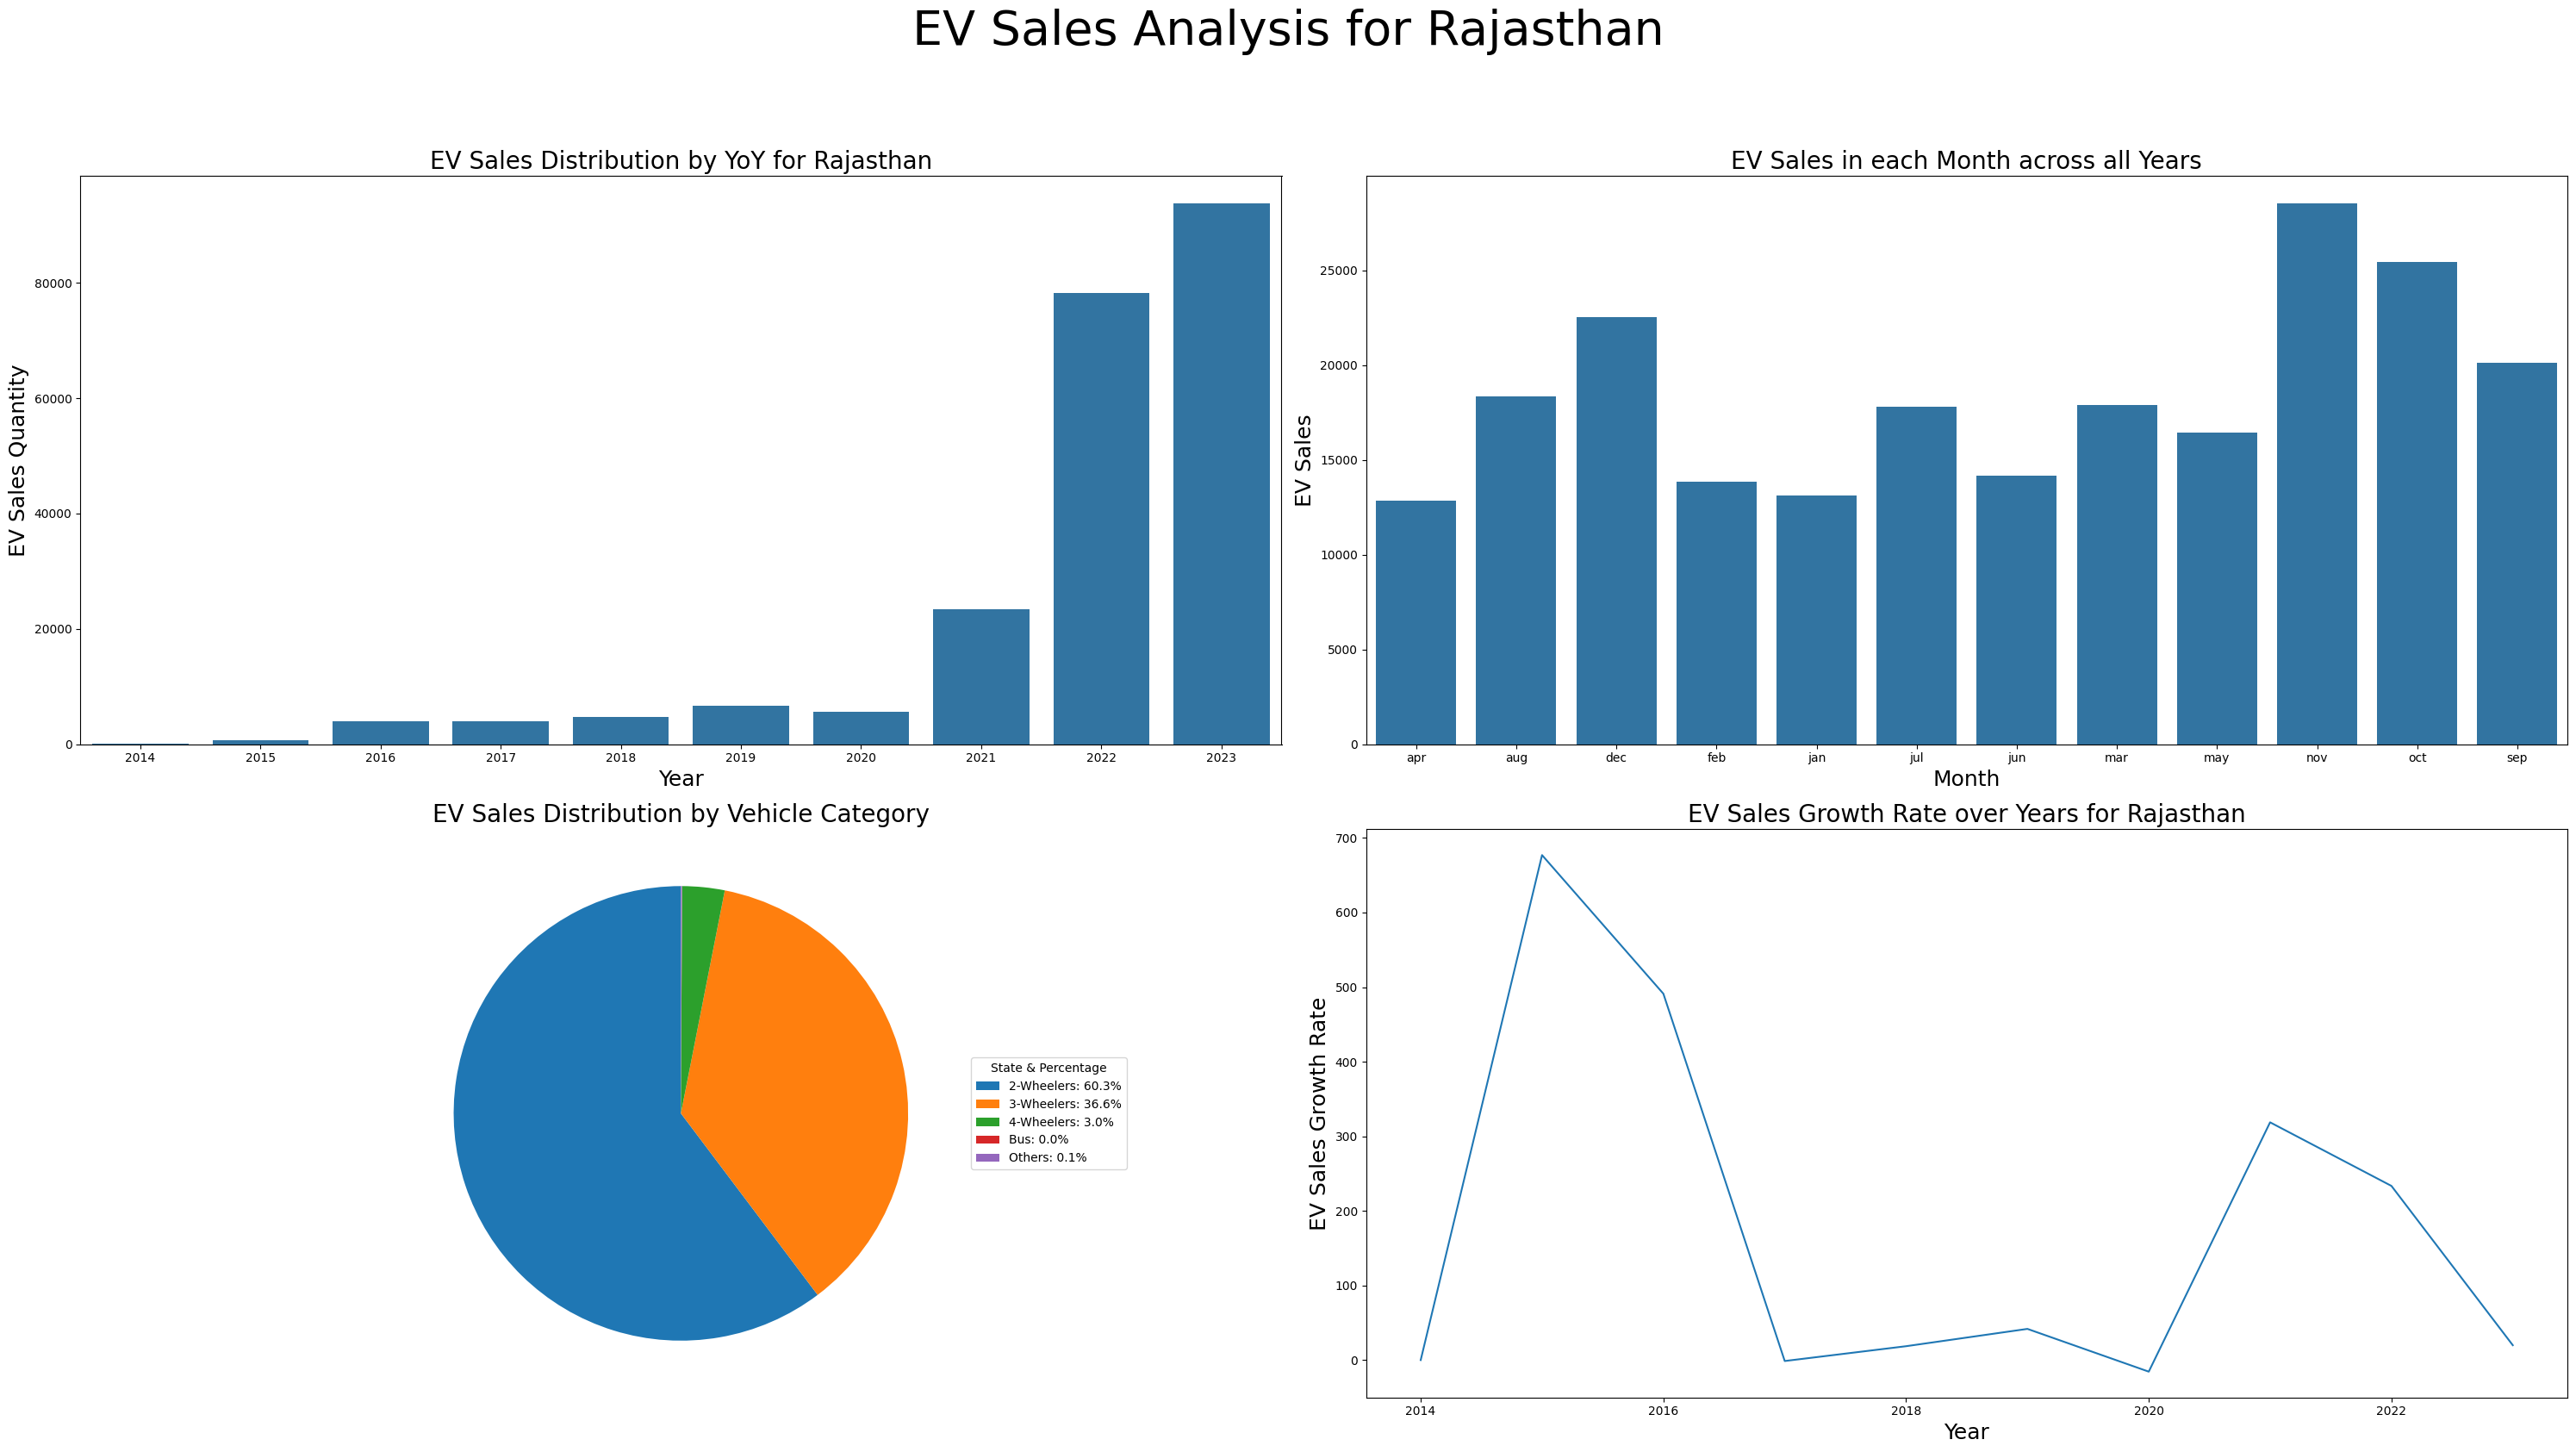

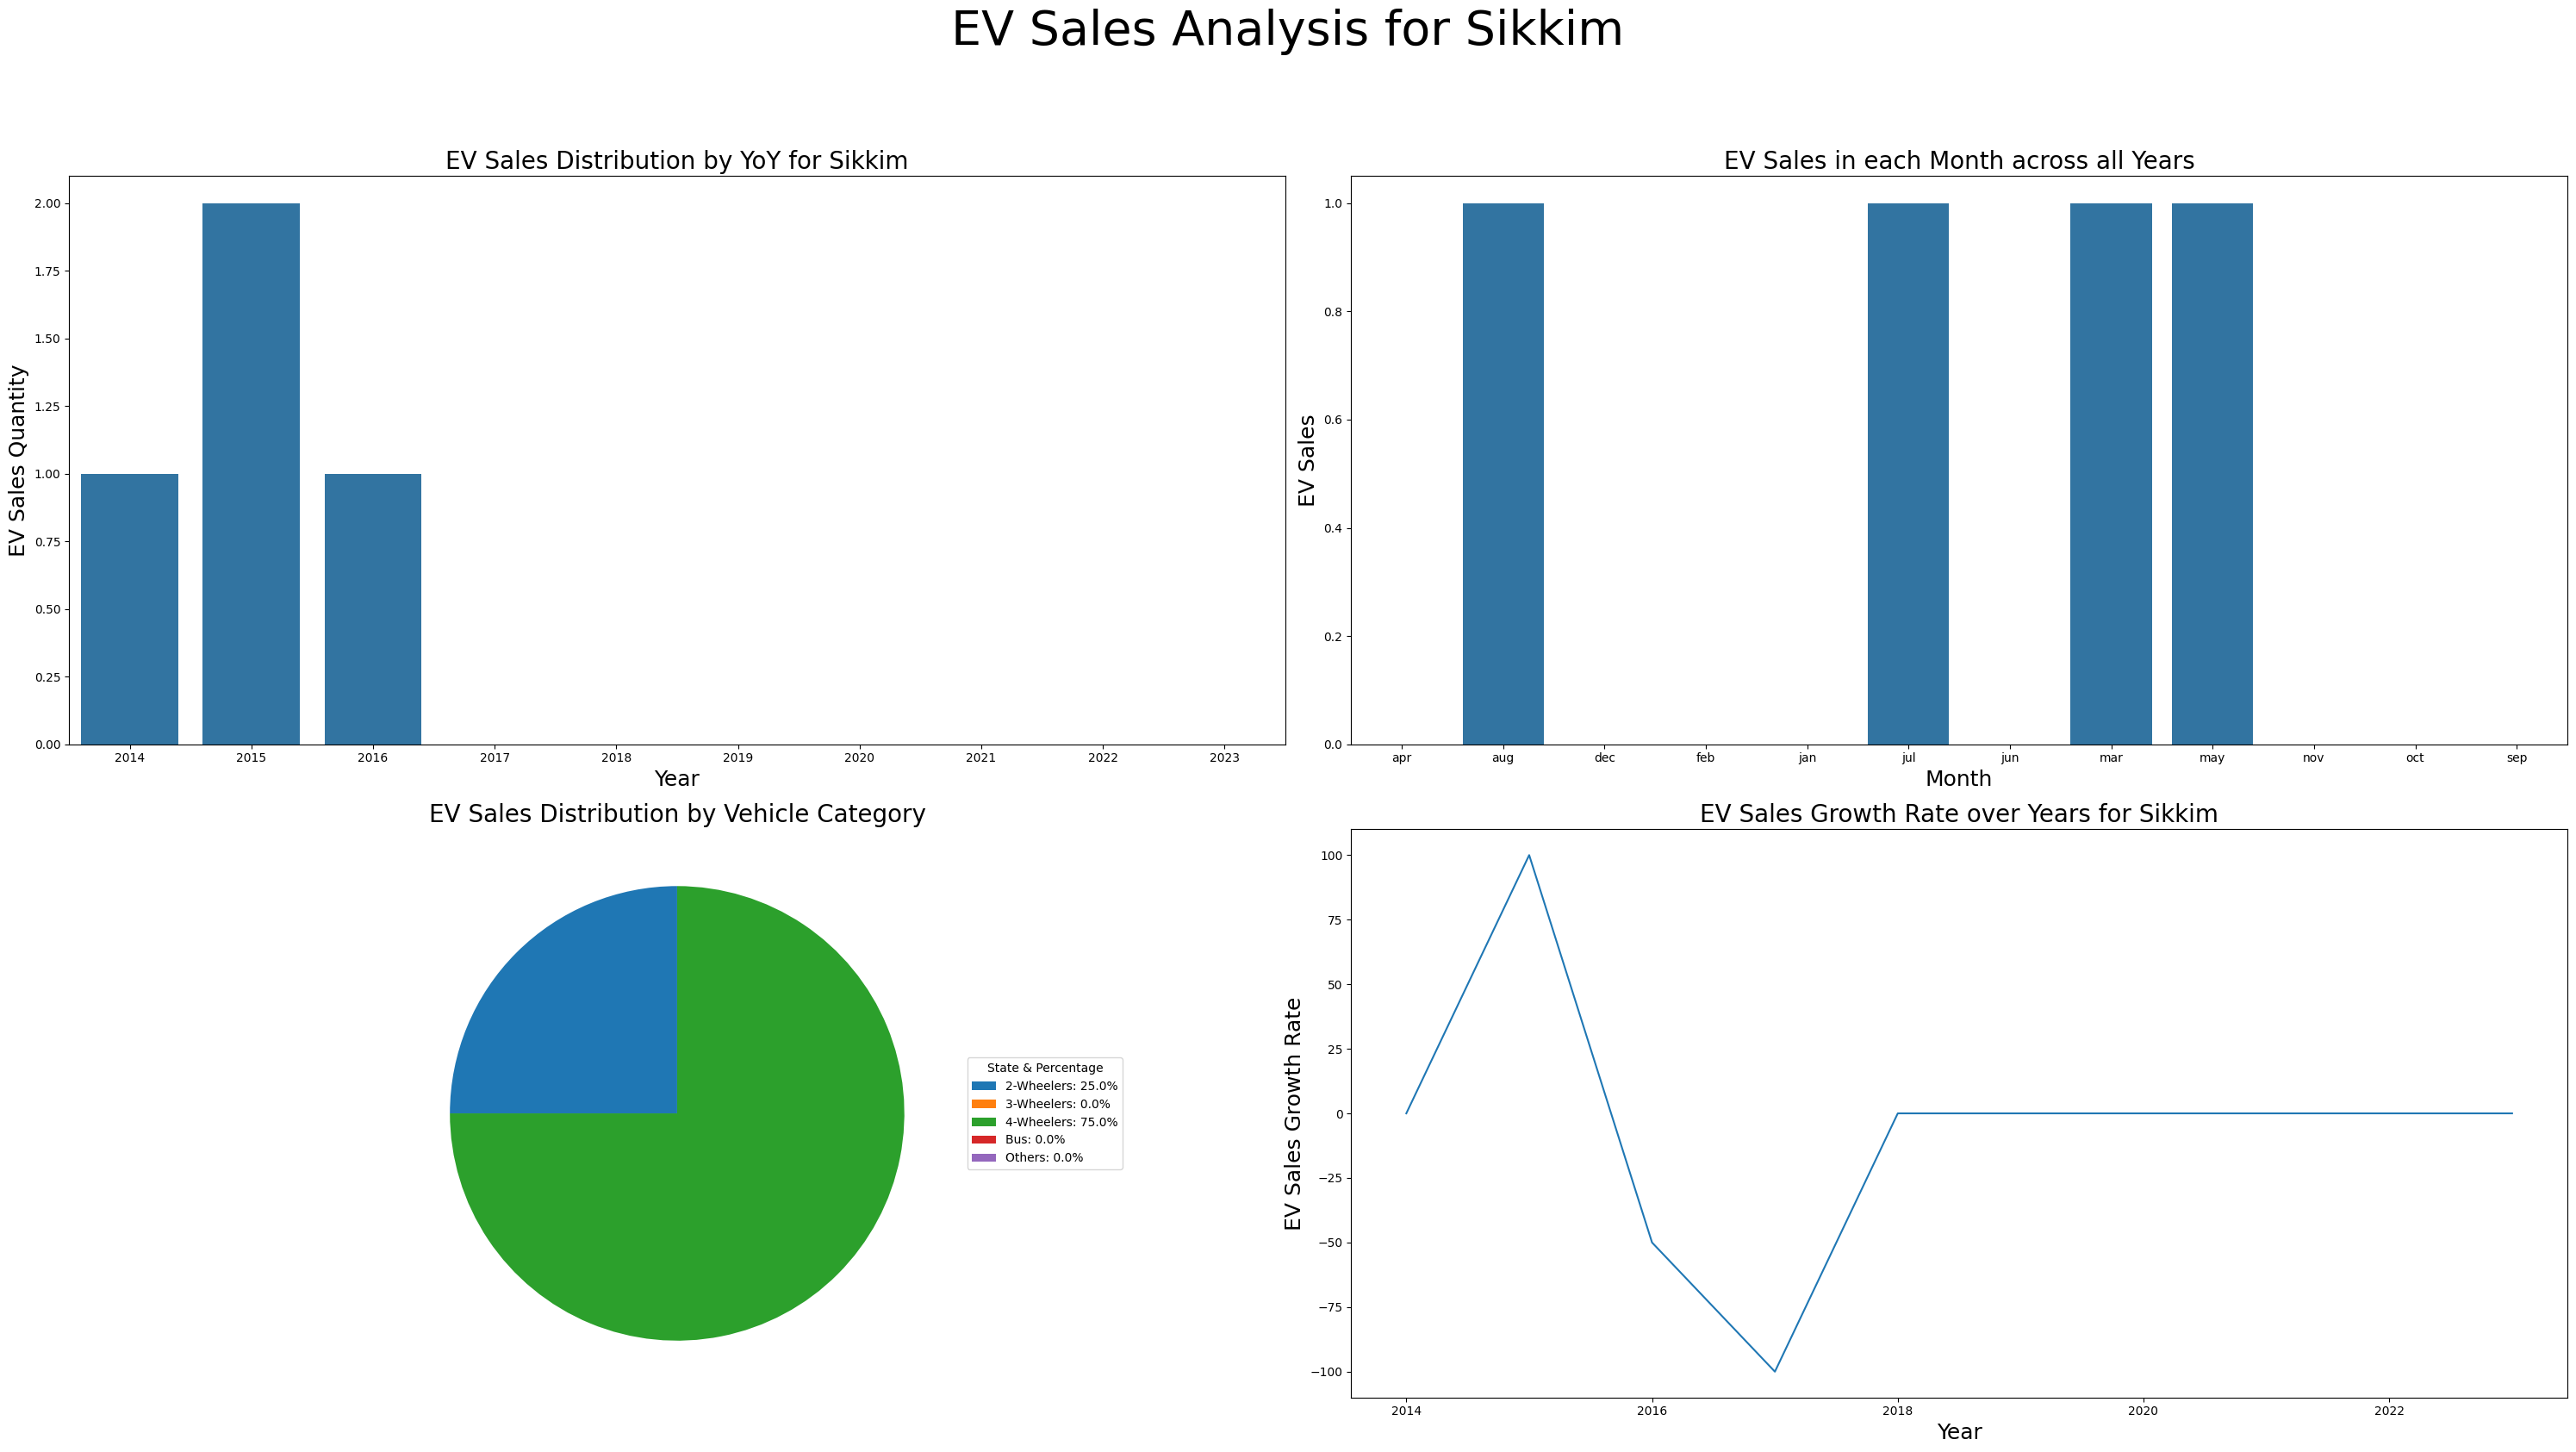

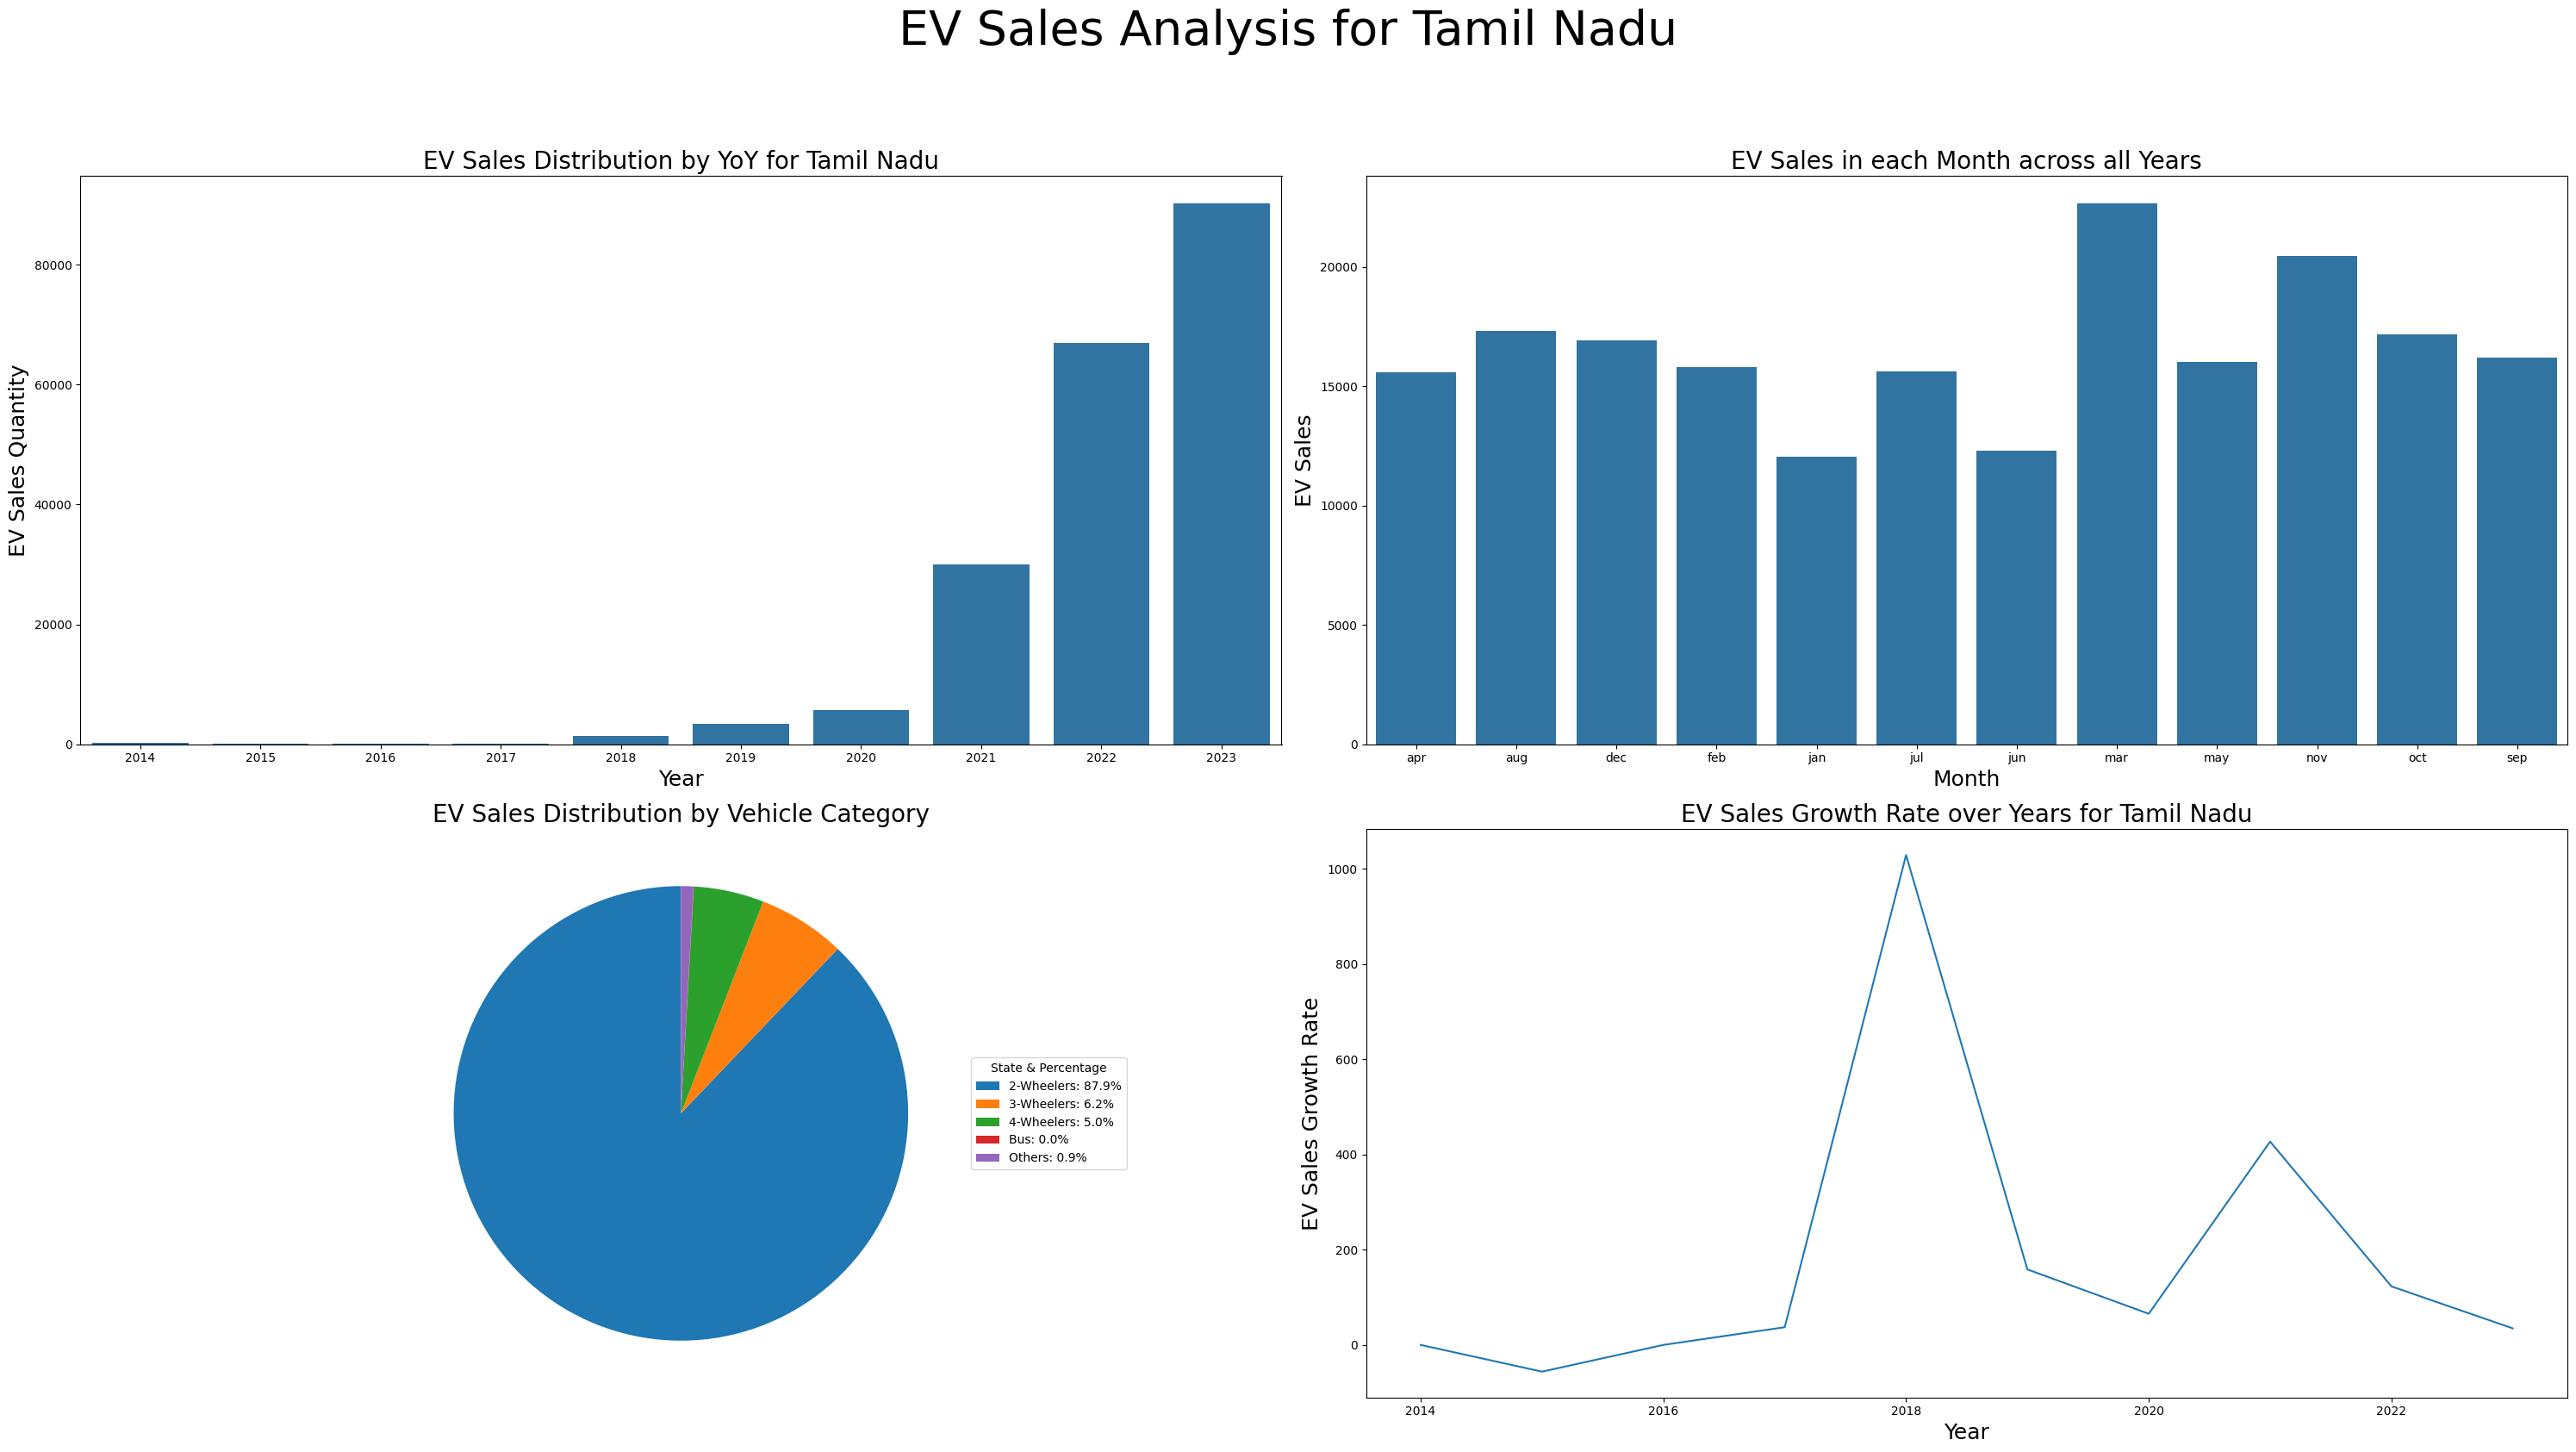

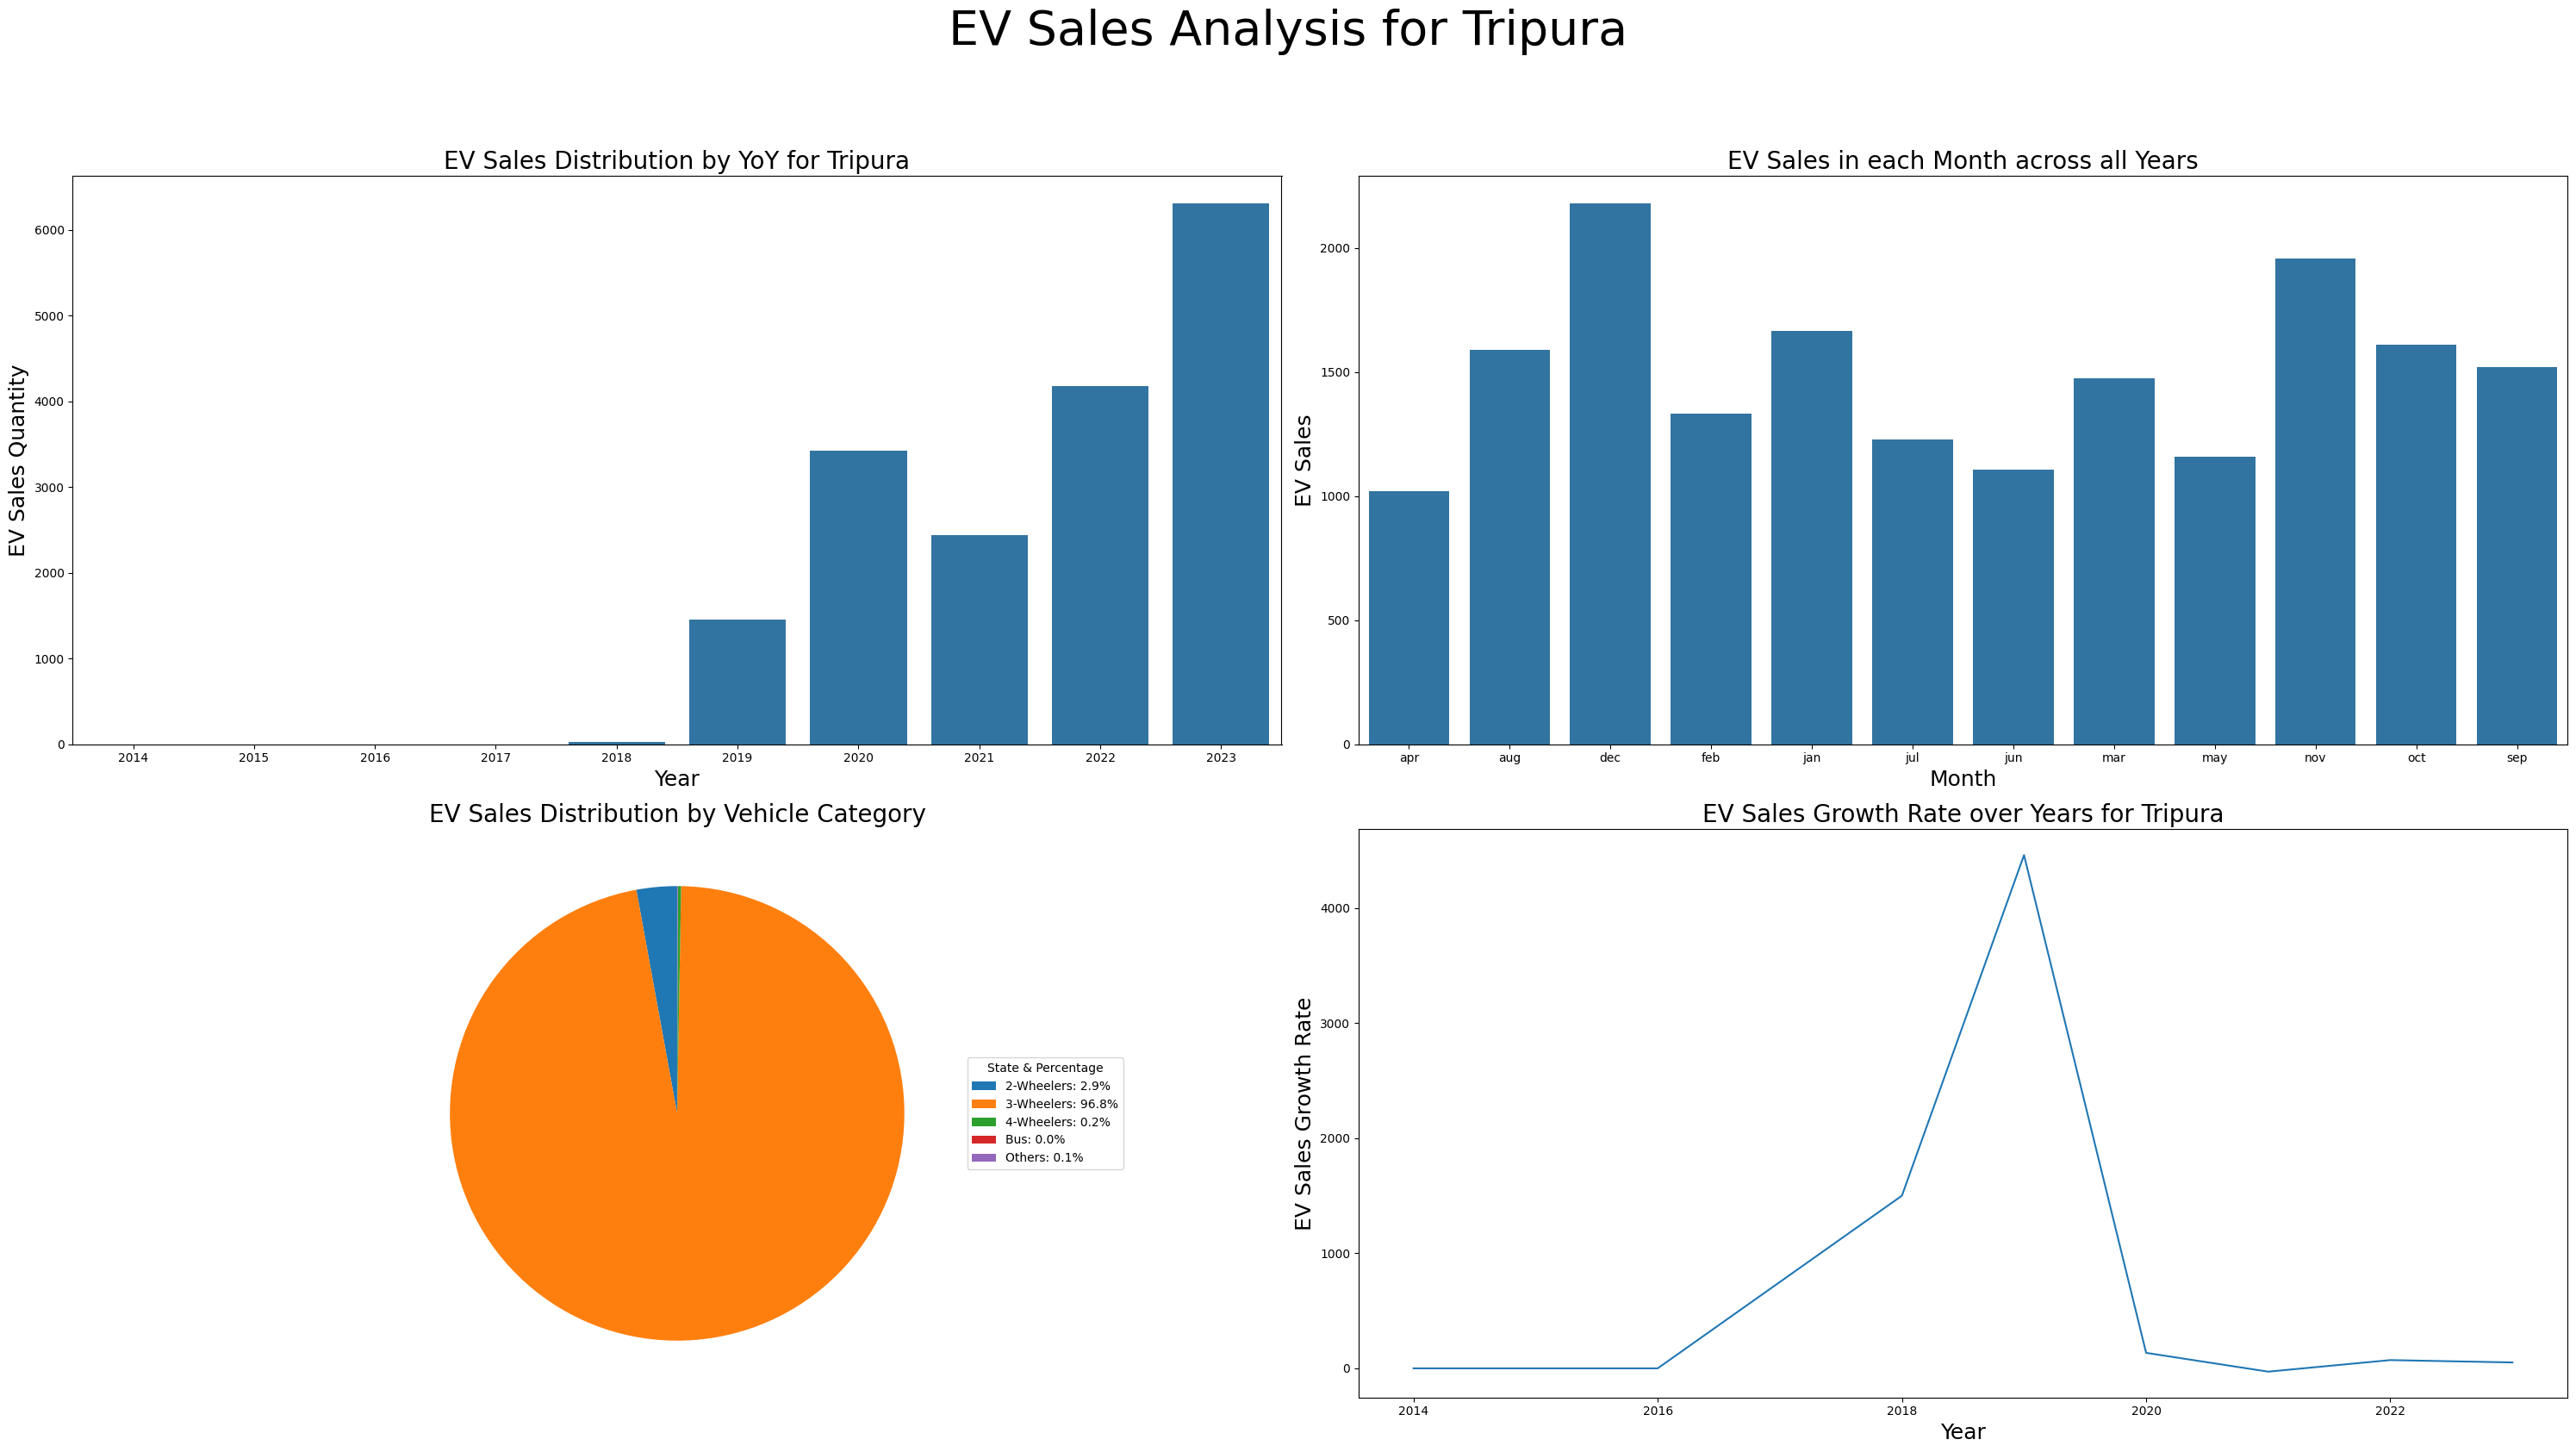

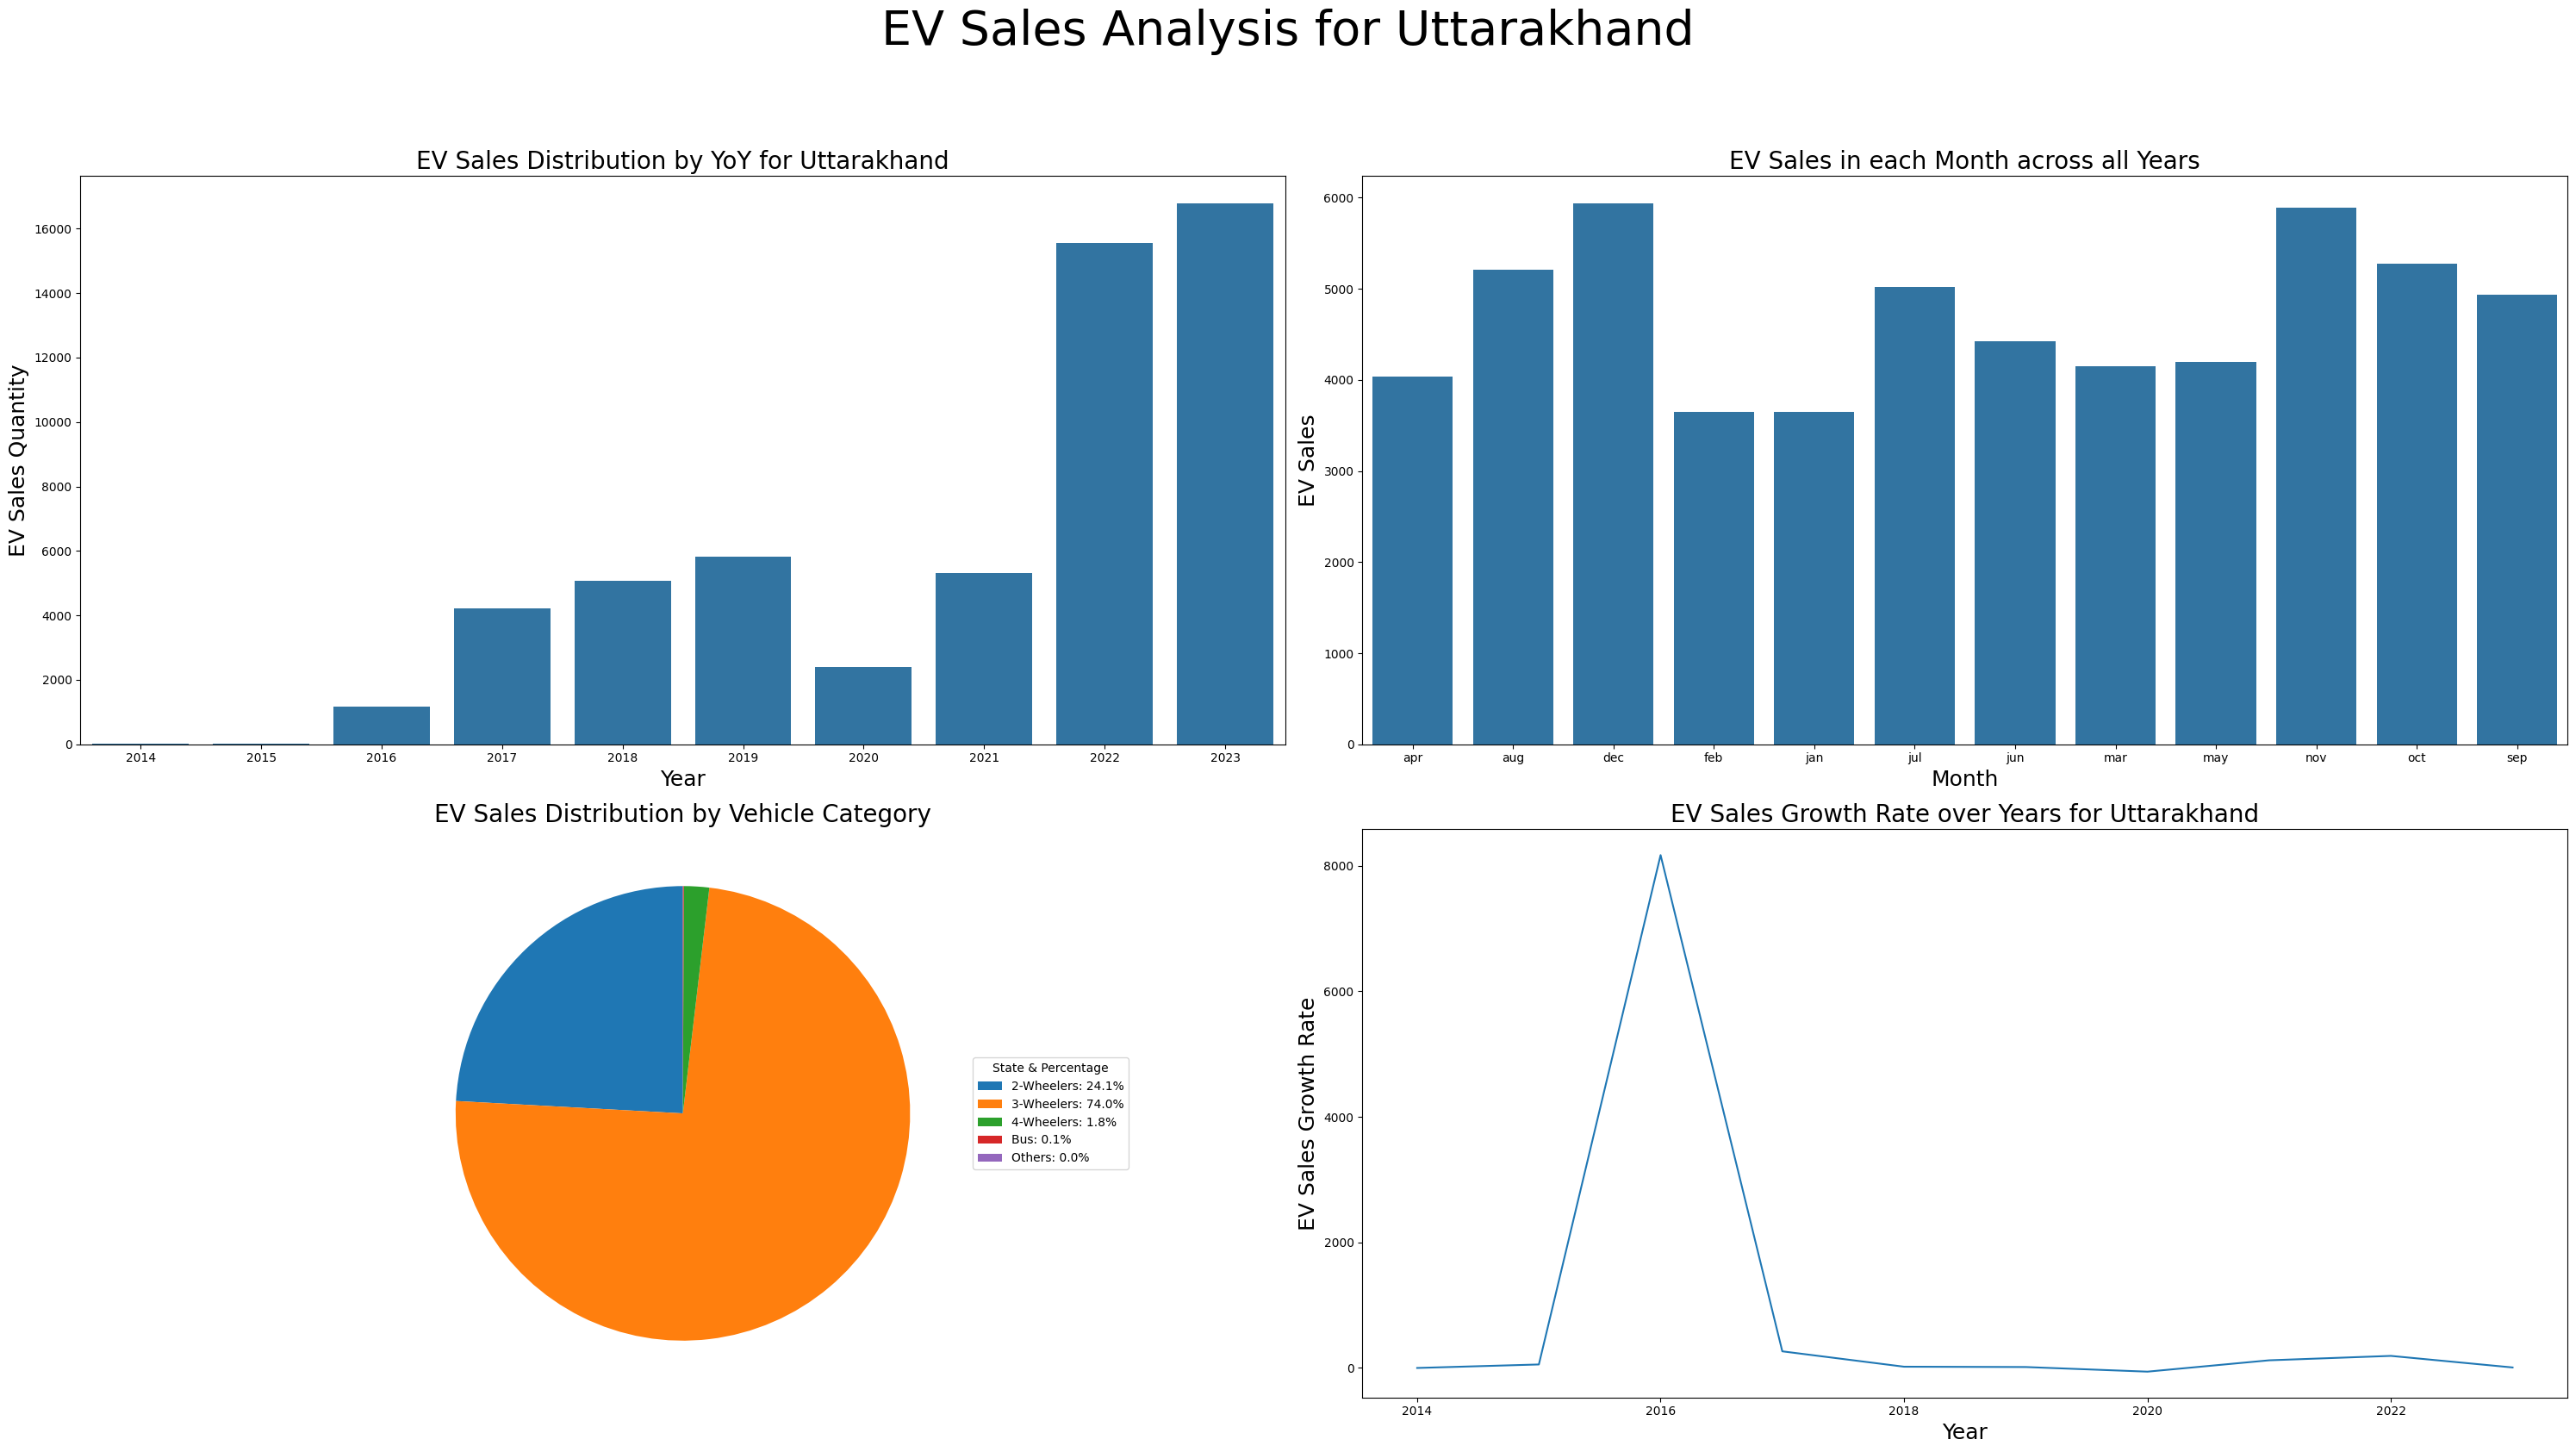

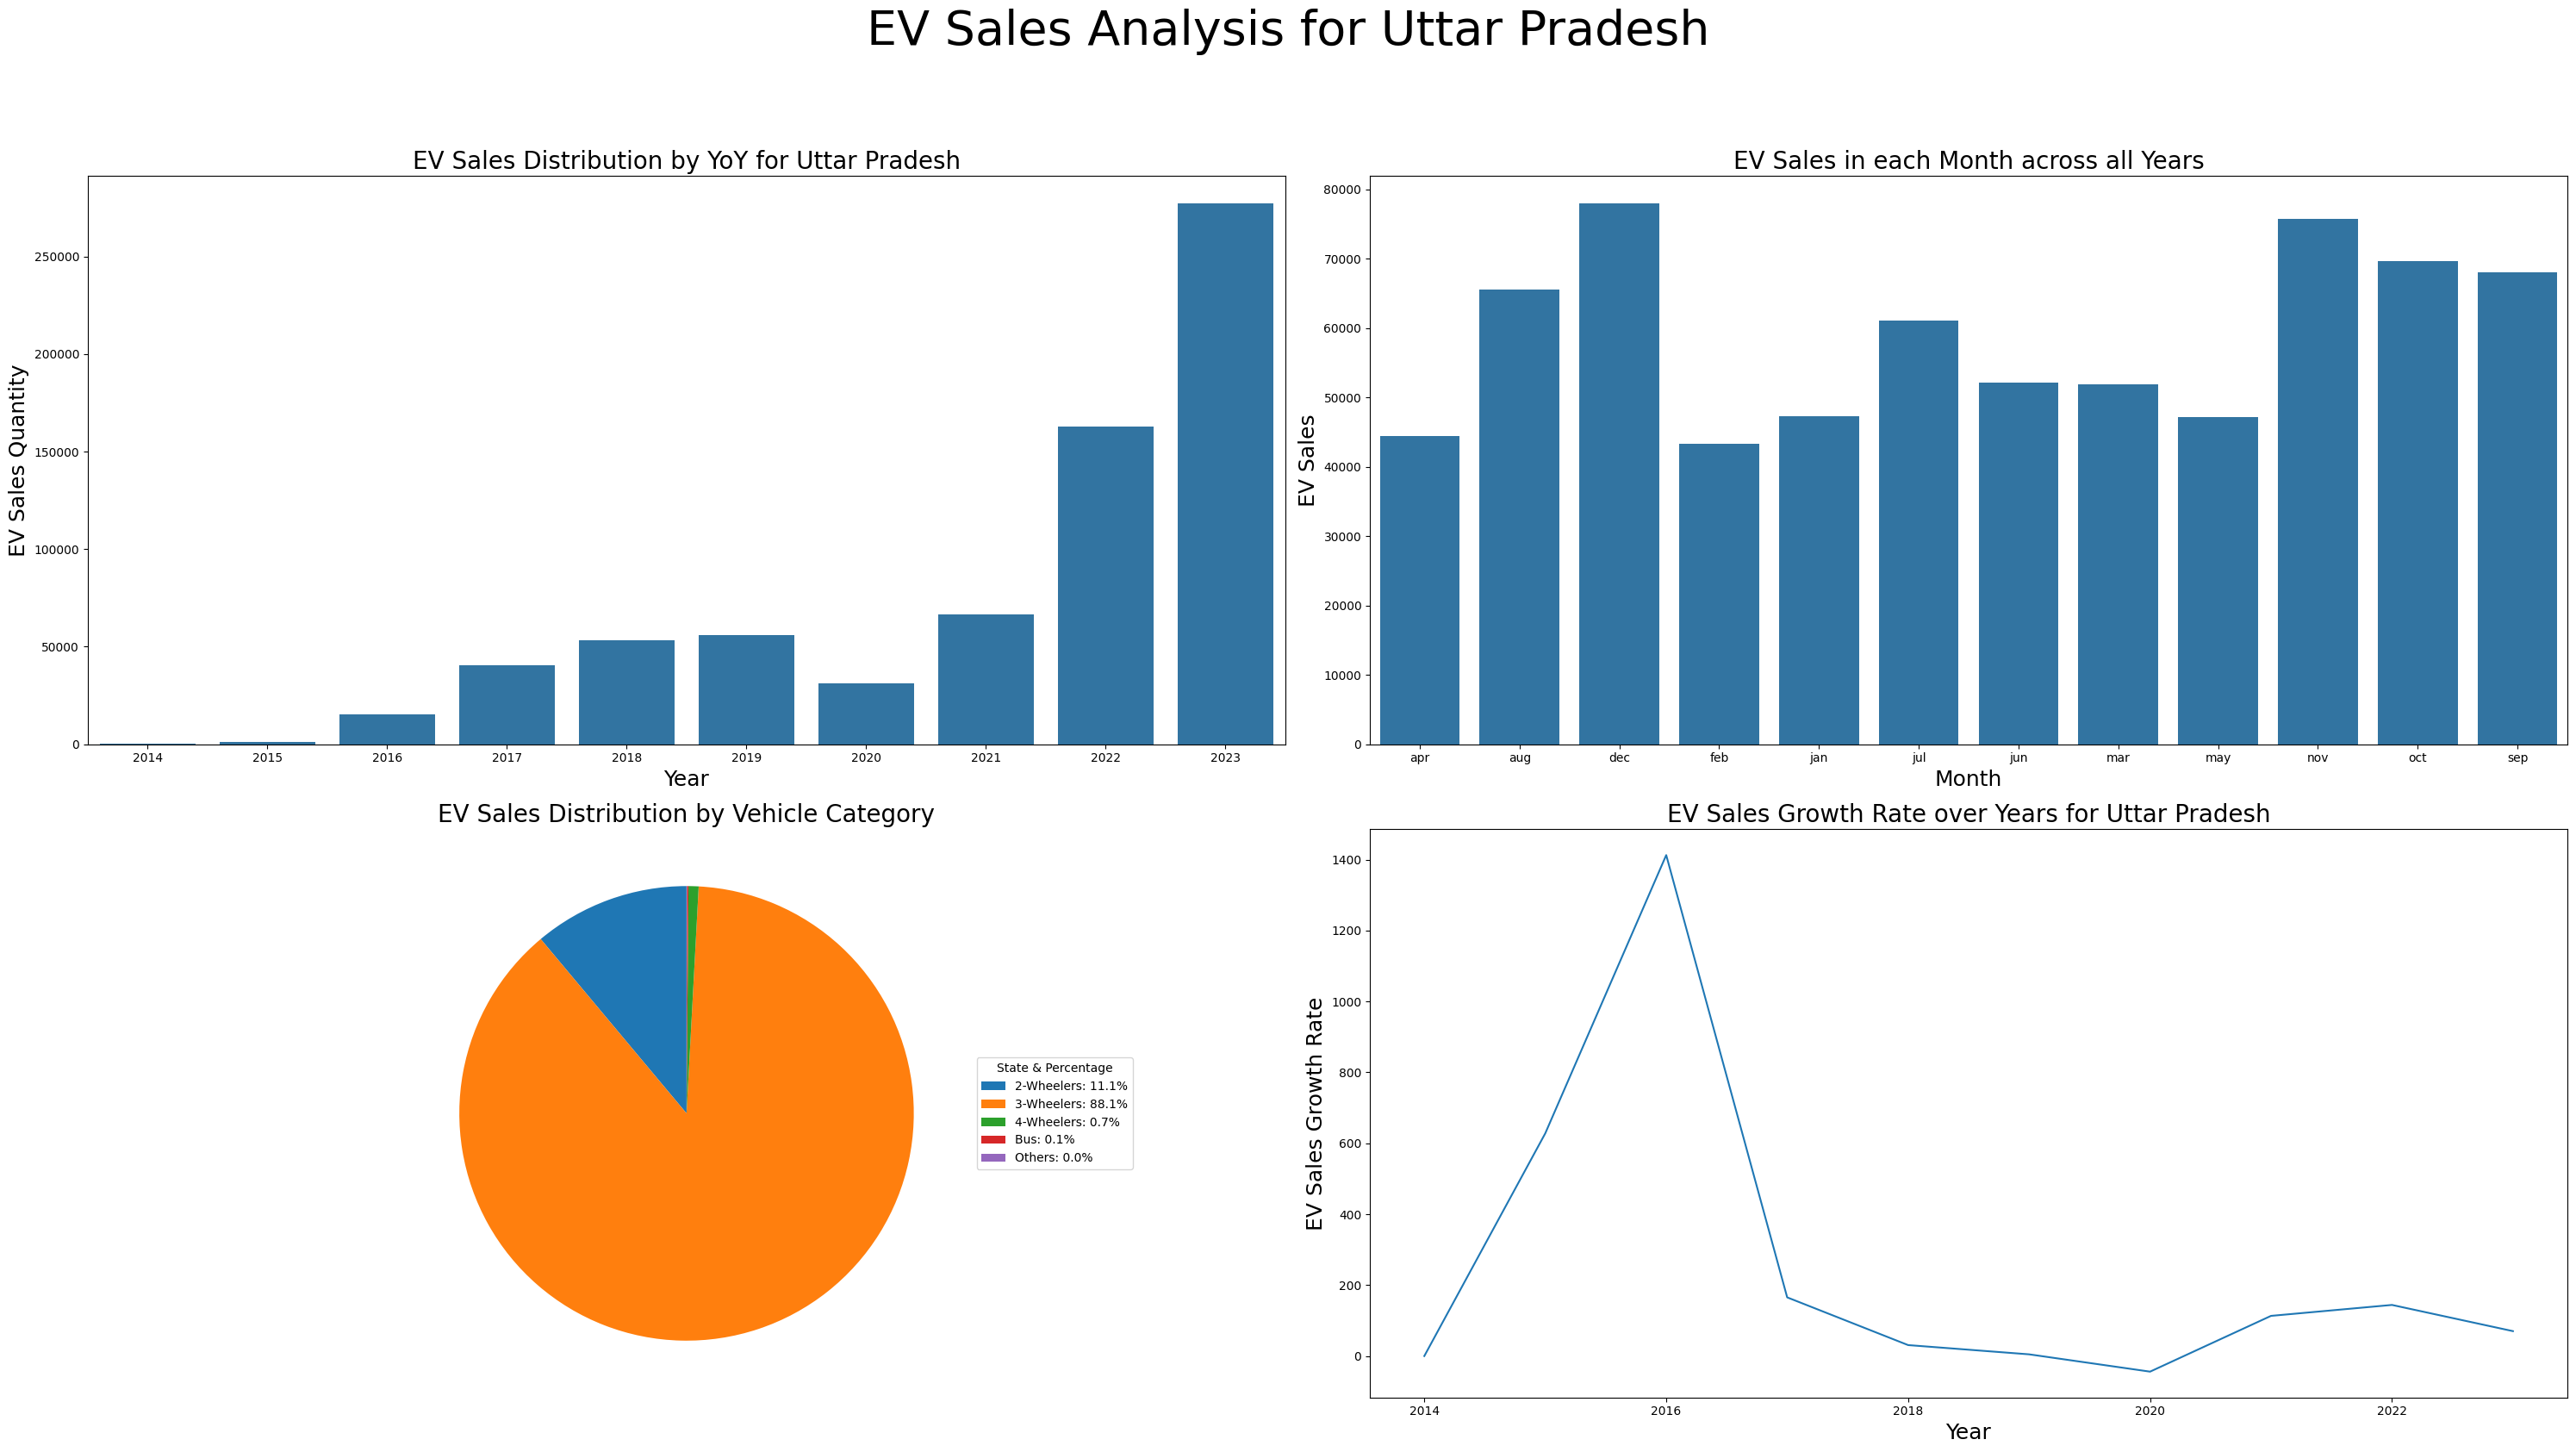

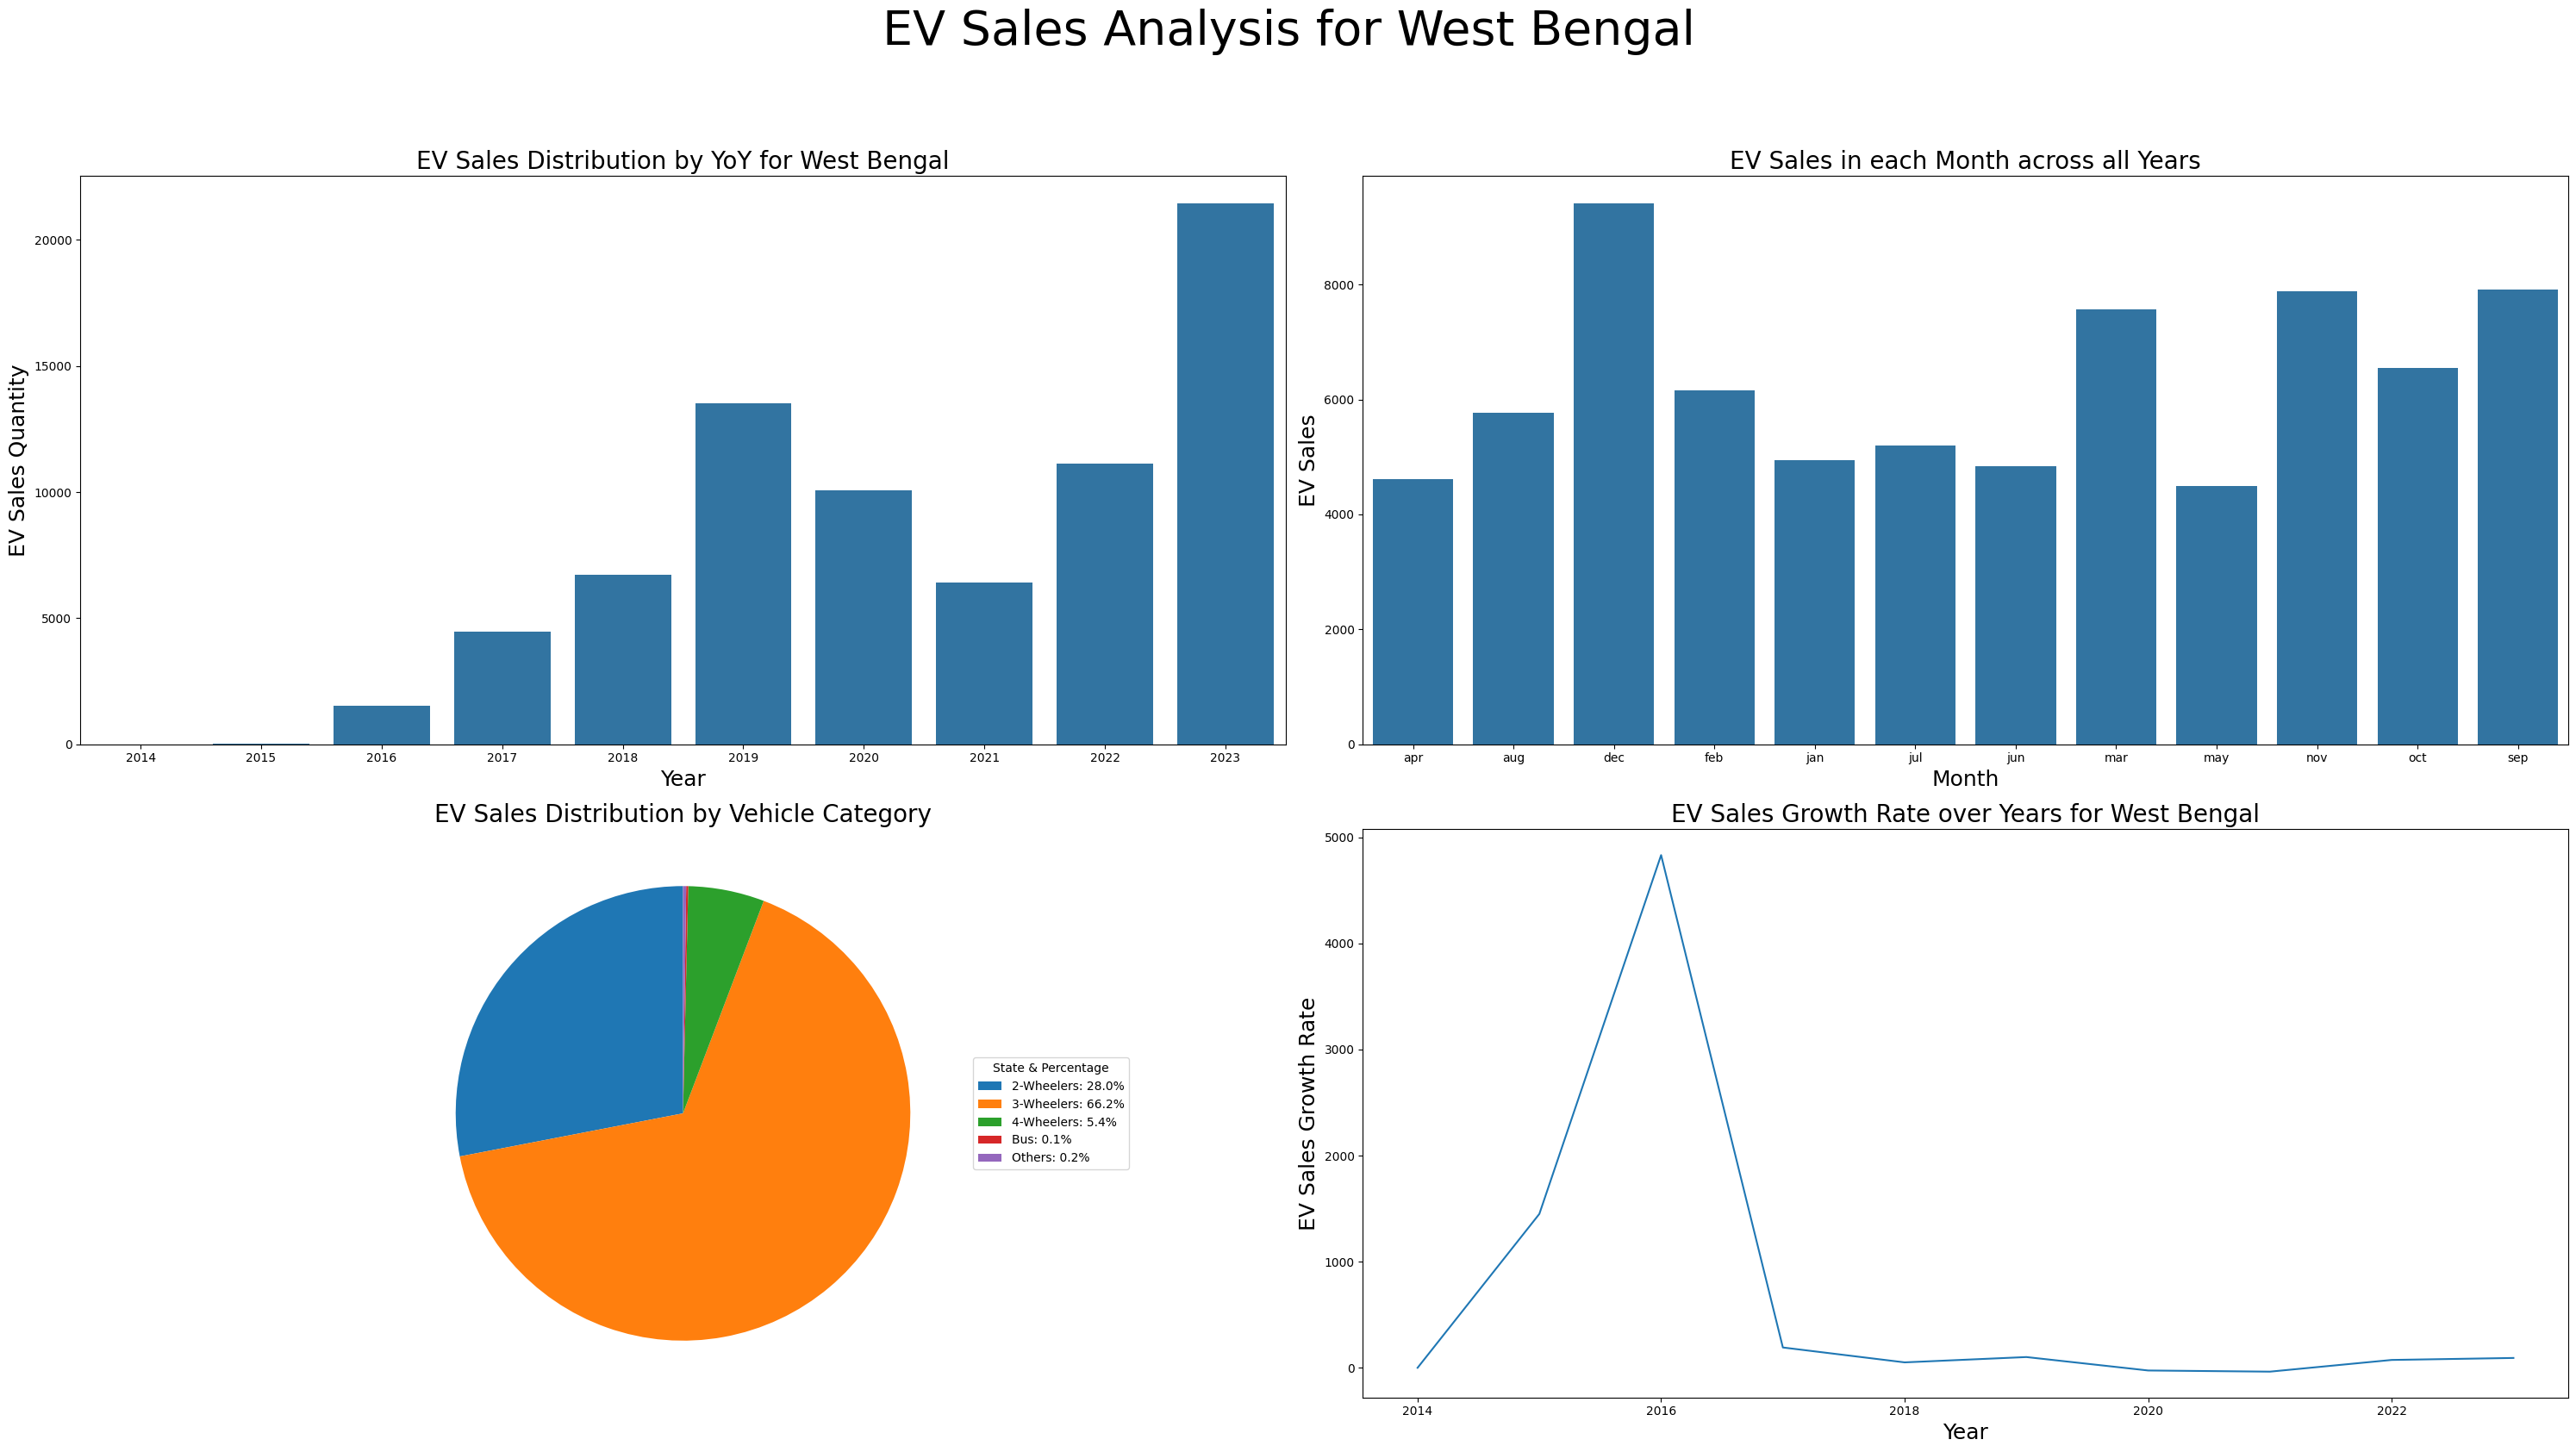

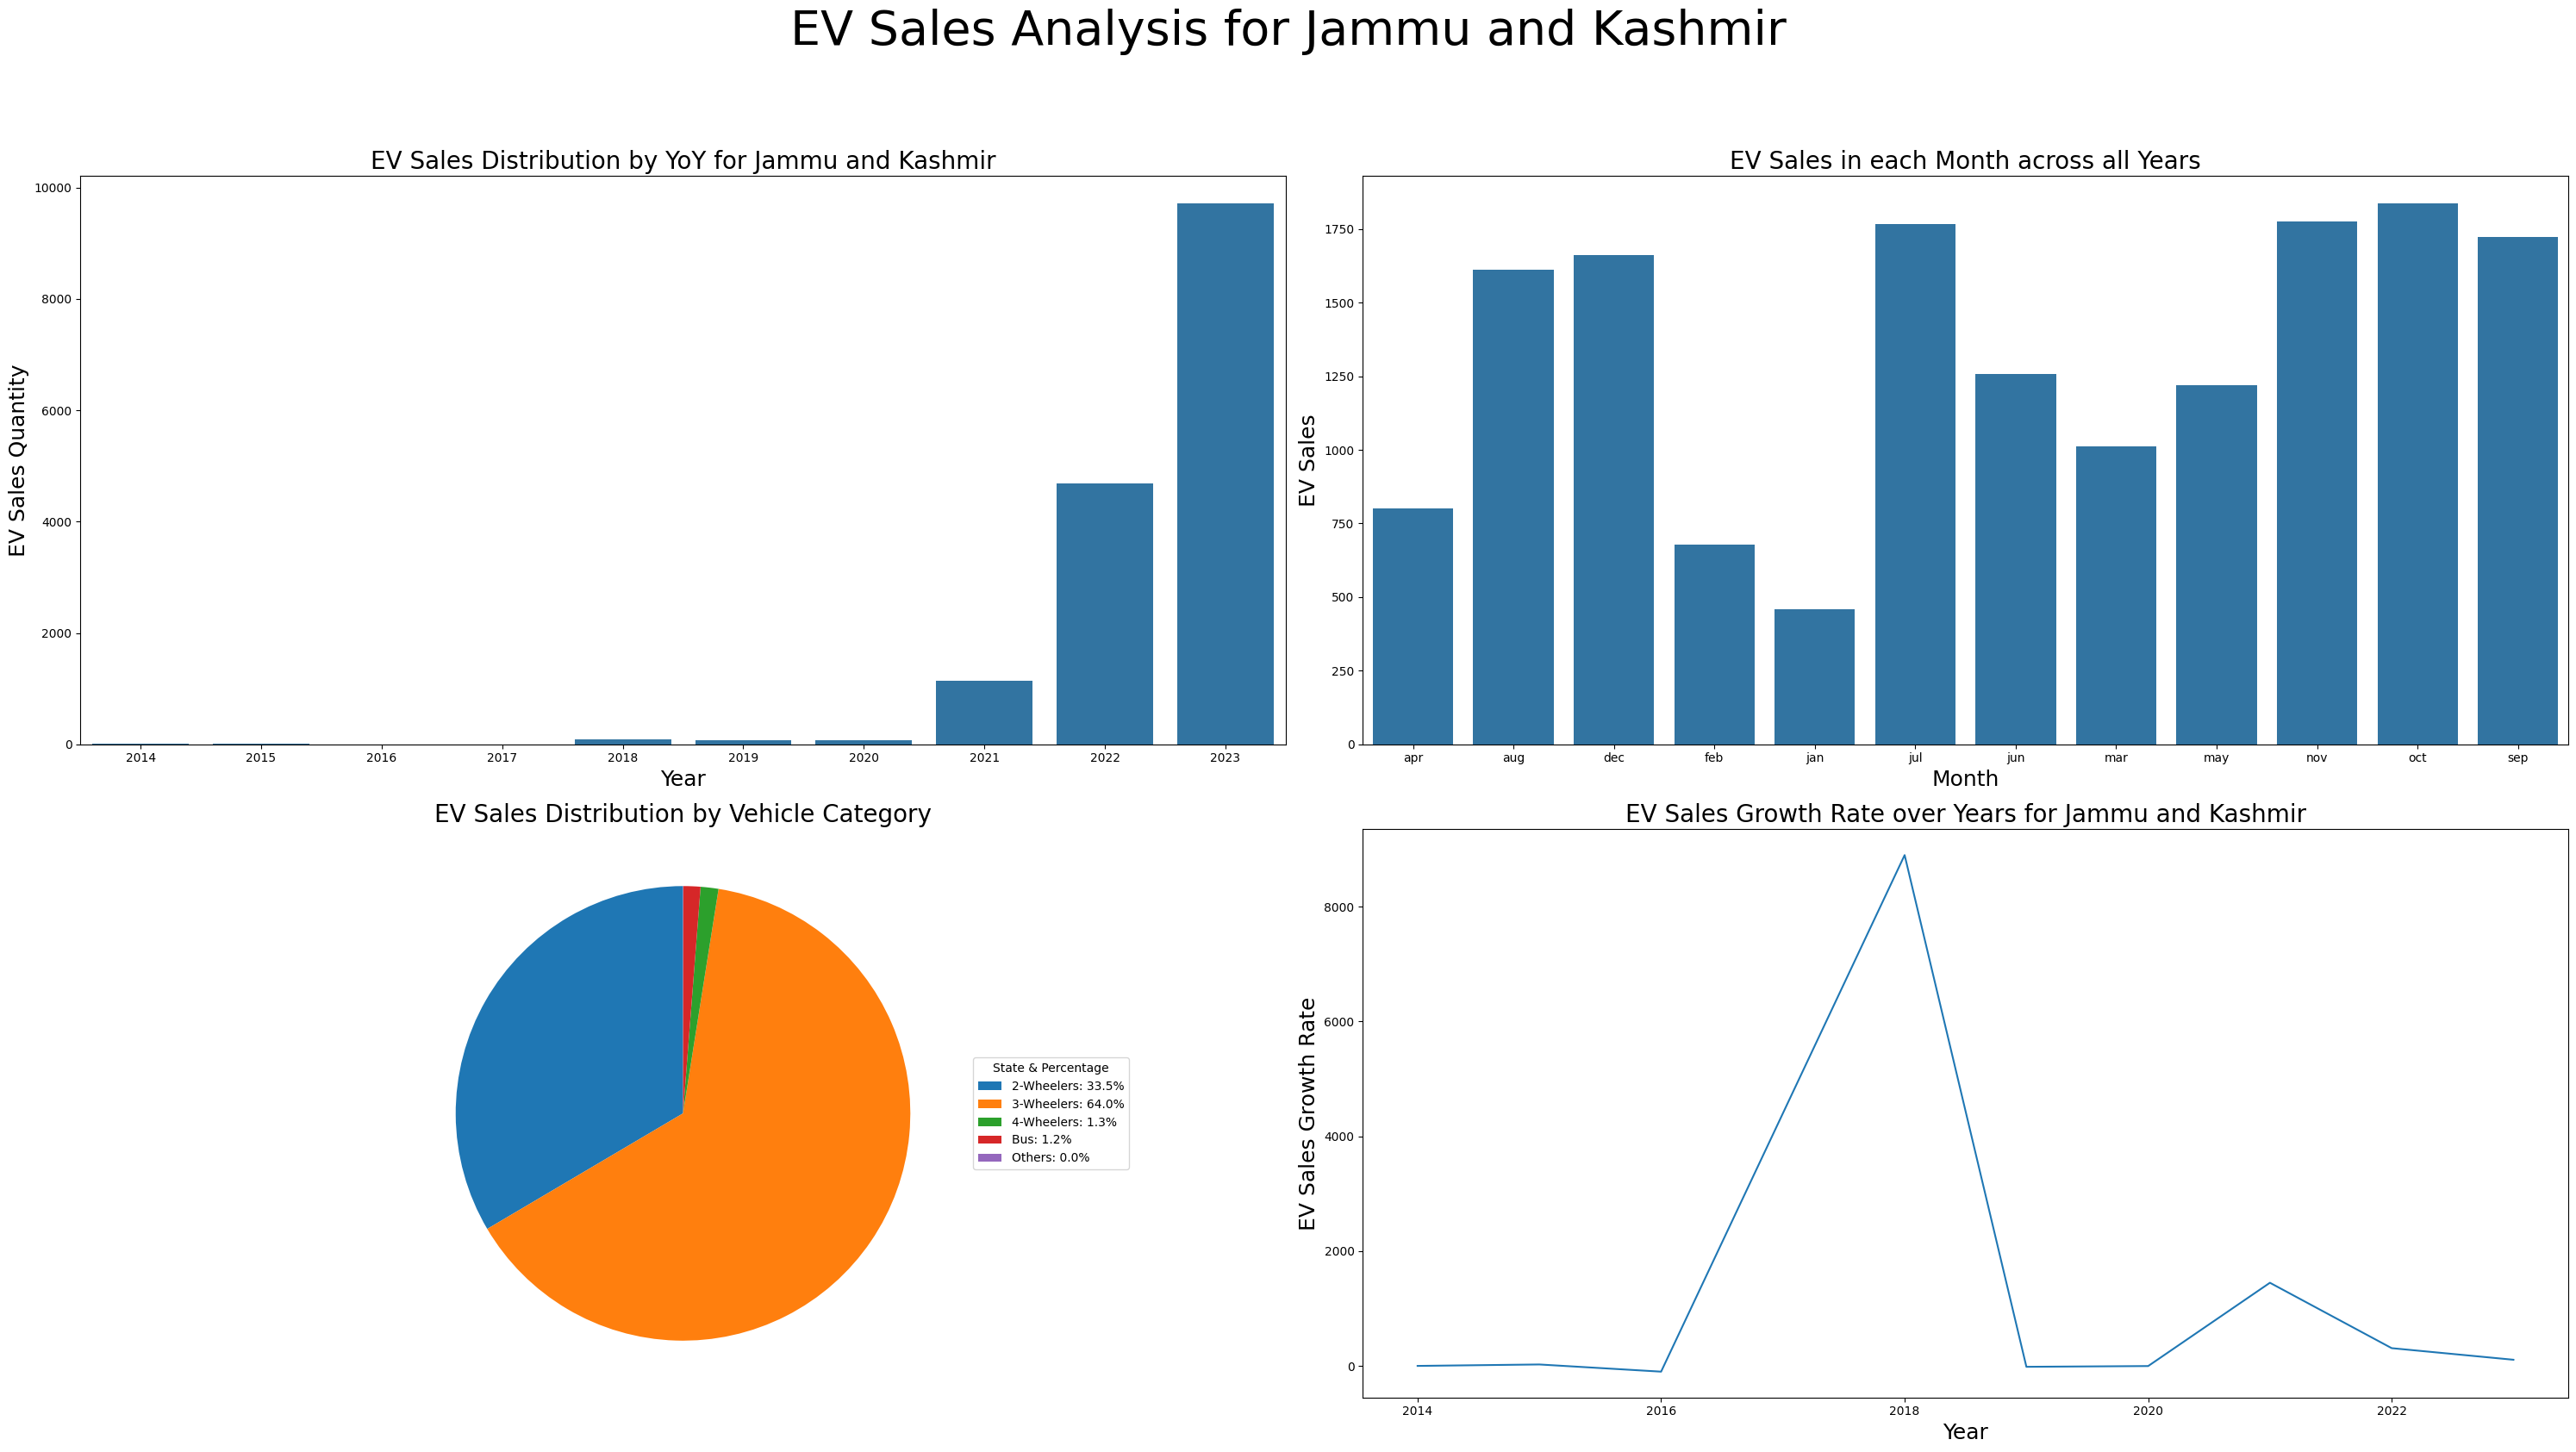

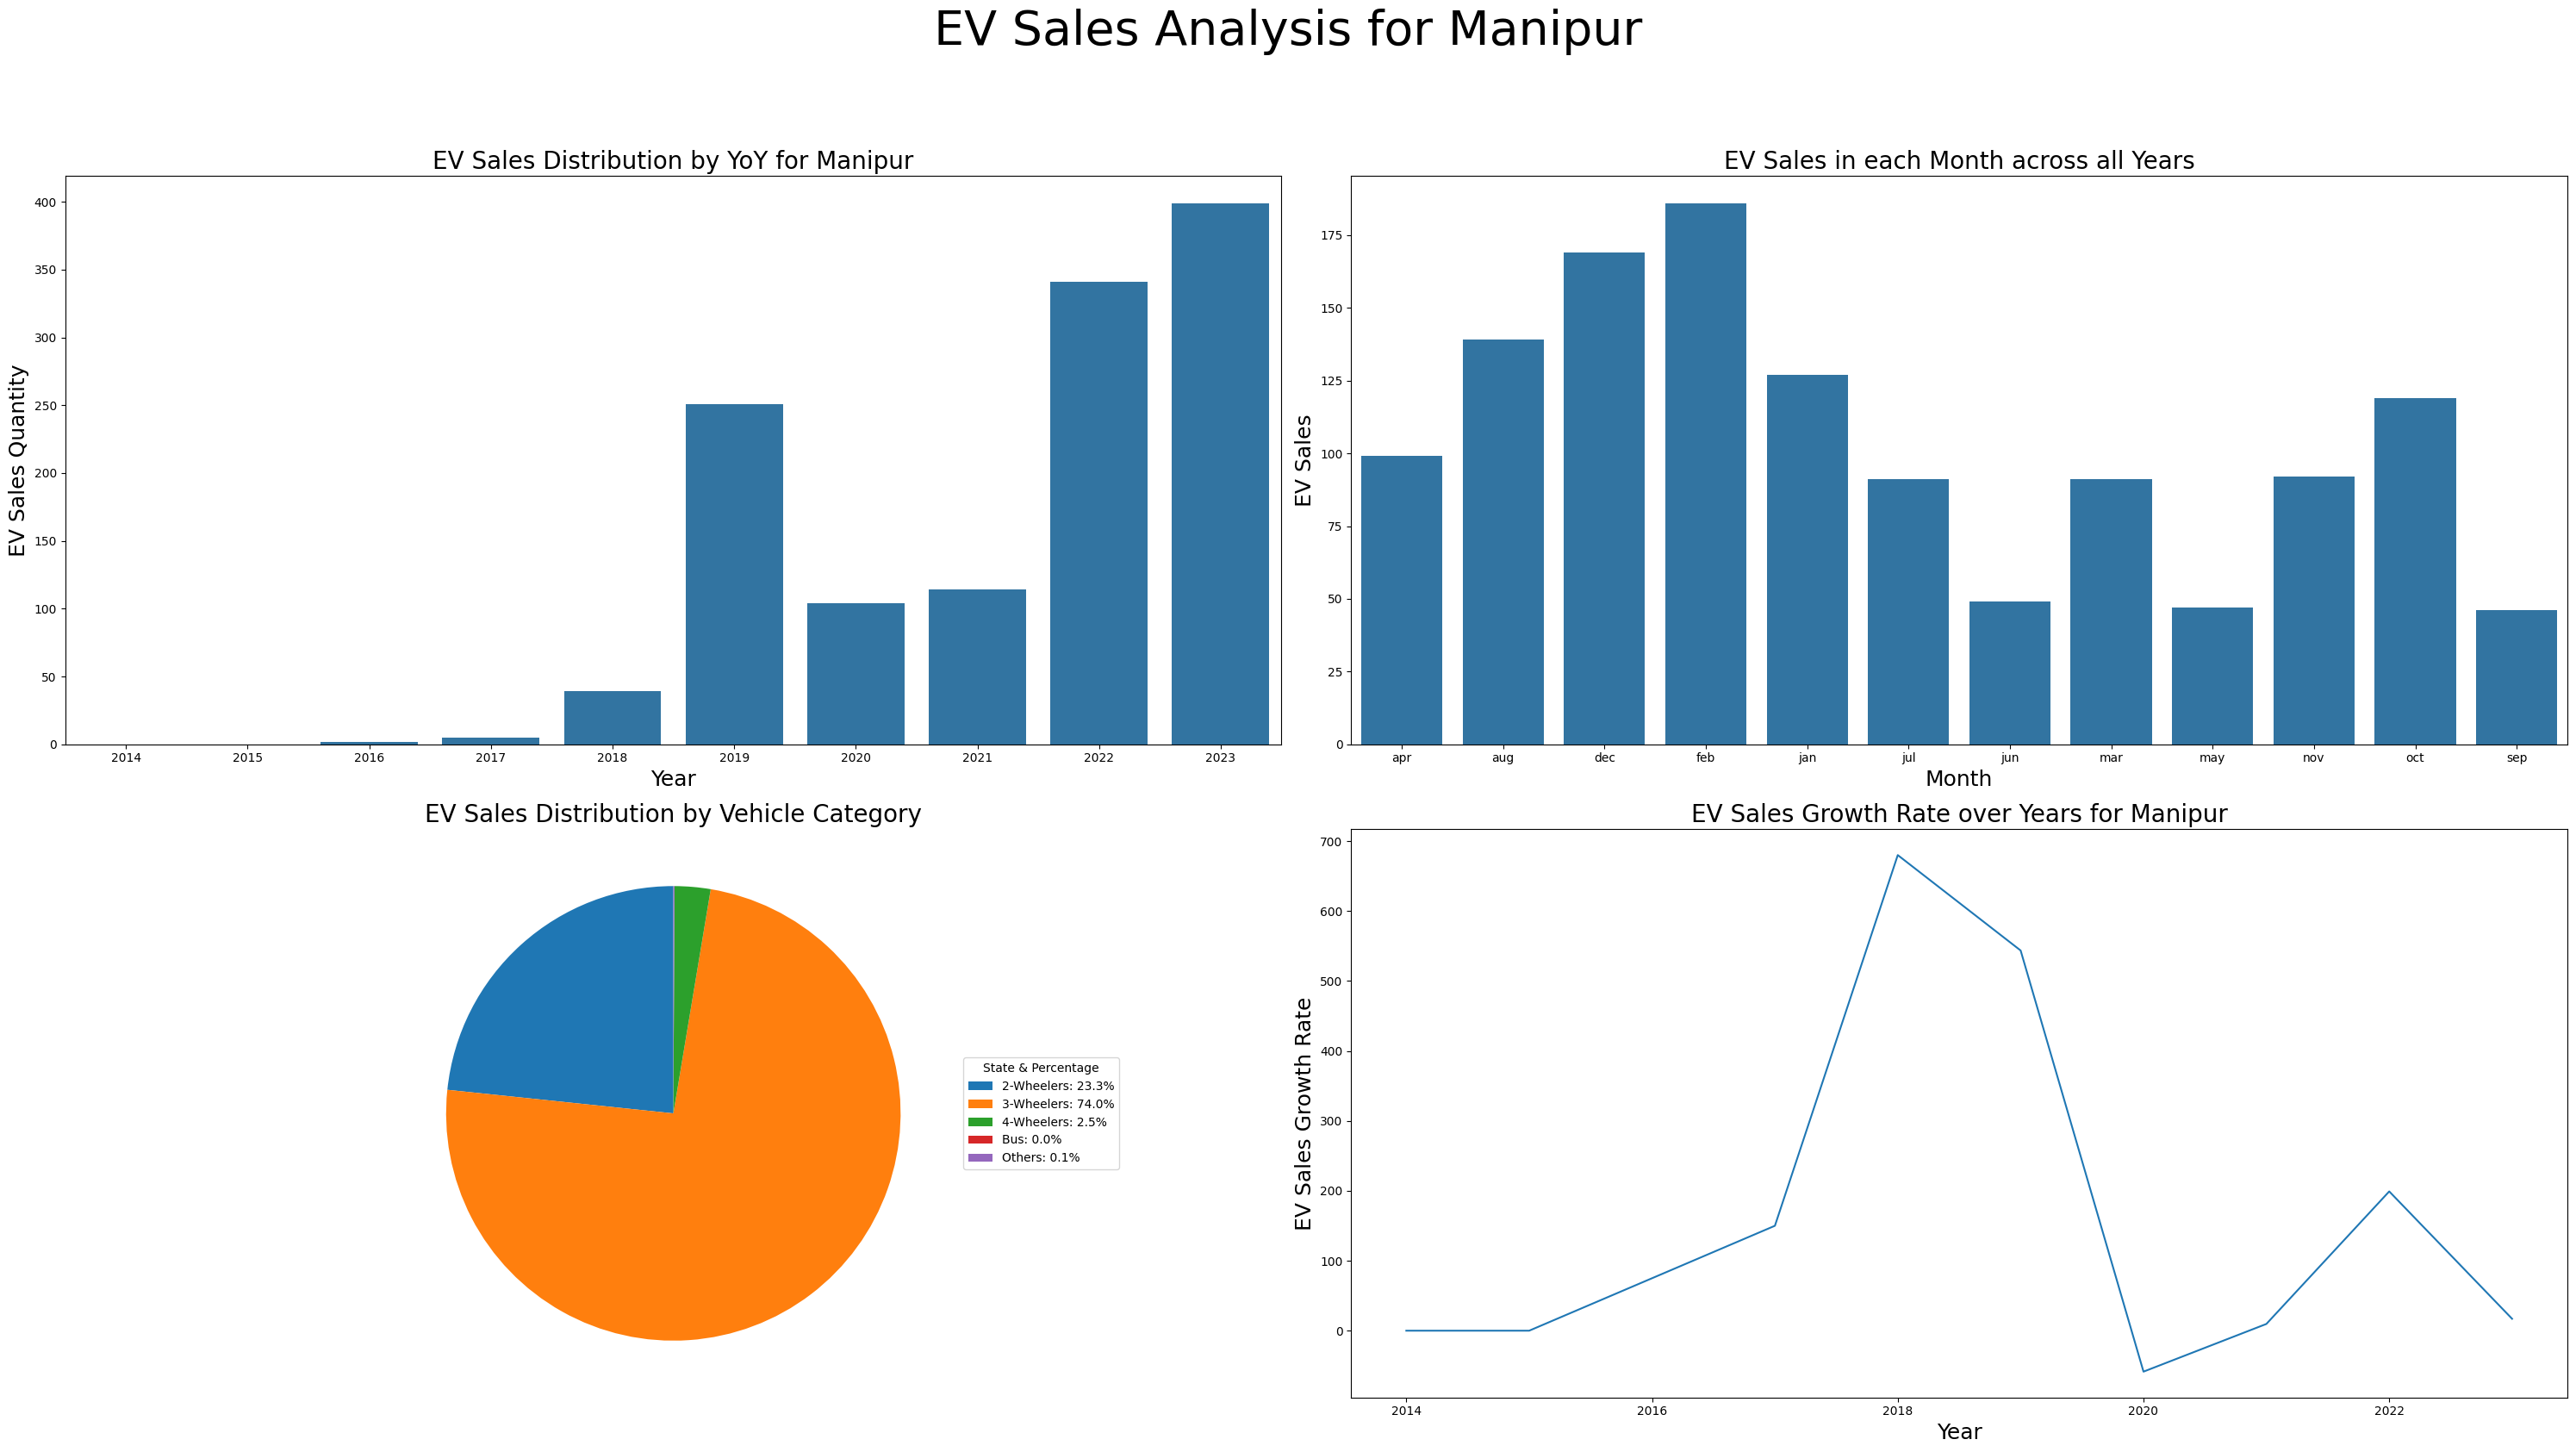

In [20]:
# Plotting Visualizations for Each State:

for i in df['State'].unique():

    # Filter the DataFrame for the current state
    df_state = df[df['State'] == i]

    # Create the figure with multiple subplots
    plt.figure(figsize=(30,16))
    plt.suptitle(f'EV Sales Analysis for {i}', fontsize=40, y=1.05)

    # 1. Barplot: EV Sales Distribution YoY
    plt.subplot(2, 2, 1)
    df1 = df_state.groupby(['Year'], observed=False)['EV_Sales_Quantity'].sum().reset_index()
    sns.barplot(data=df1, x='Year', y='EV_Sales_Quantity')
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('EV Sales Quantity', fontsize=18)
    plt.title(f'EV Sales Distribution by YoY for {i}', fontsize=20)

    # 2. Barplot: EV Sales in each month across all years
    plt.subplot(2, 2, 2)
    monthly_trends = df_state.groupby('Month_Name', observed=False)['EV_Sales_Quantity'].sum().reset_index()
    sns.barplot(data=monthly_trends, x='Month_Name', y='EV_Sales_Quantity')
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('EV Sales', fontsize=18)
    plt.title('EV Sales in each Month across all Years', fontsize=20)

    # 3. Pie chart: EV Sales Distribution by Vehicle Category
    plt.subplot(2, 2, 3)
    df1=df_state.groupby(['Vehicle_Category'], observed=False)['EV_Sales_Quantity'].sum().reset_index()
    plt.pie(df1['EV_Sales_Quantity'], startangle=90)
    plt.legend(labels=[f'{Vehicle_Category}: {EV_Sales_Quantity}%' for Vehicle_Category, EV_Sales_Quantity in zip(df1['Vehicle_Category'], (df1['EV_Sales_Quantity'] / df1['EV_Sales_Quantity'].sum() * 100).round(1))],
            title="State & Percentage", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('EV Sales Distribution by Vehicle Category', fontsize=20)


    # 4. Lineplot: EV Sales Growth Rate over years
    plt.subplot(2, 2, 4)
    annual_sales = df_state.groupby('Year', observed=False)['EV_Sales_Quantity'].sum().reset_index()
    annual_sales['Growth_Rate'] = annual_sales['EV_Sales_Quantity'].pct_change().fillna(0) * 100
    sns.lineplot(data=annual_sales, x='Year', y='Growth_Rate')
    plt.title(f'EV Sales Growth Rate over Years for {i}', fontsize=20)
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('EV Sales Growth Rate', fontsize=18)

    # Adjust the layout to prevent overlap and show the plots
    plt.tight_layout()
    plt.show()
    print("\n" * 3)

**Is there a seasonal trend in EV sales over the years**

In [21]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_sales = df.groupby(['Year', 'Month'])['EV_Sales_Quantity'].sum().reset_index()
monthly_sales

Year  Month  EV_Sales_Quantity
0    2014      1                232
1    2014      2                171
2    2014      3                220
3    2014      4                252
4    2014      5                186
..    ...    ...                ...
115  2023      8             126508
116  2023      9             127793
117  2023     10             139232
118  2023     11             152610
119  2023     12             141033

[120 rows x 3 columns]

In [22]:
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='EV_Sales_Quantity')
monthly_sales_pivot

Year   2014  2015  2016   2017   2018   2019   2020   2021    2022    2023
Month                                                                     
1       232   174  1946   4582   9003  13379  16865  17025   51476  102839
2       171   182  2499   4411   7372  12228  16569  20073   58056  107178
3       220   222  4520   5992   7696  15154  14066  28115   83080  140823
4       252   175  3443   5054   7335  11185    975  15020   77522  111233
5       186   195  4004   7059   8261  10082   1311   3602   69916  158131
6       149   287  5119   7509   8833  11159   6486  12317   75852  102043
7       199   383  4380   9047  11397  12479   7799  28146   80887  115756
8       180   711  4022   9169  11792  13252   8558  30818   89012  126508
9       168   968  4174   7735  13588  16145  11355  36604   94903  127793
10      188  1073  6336   7660  14986  15720  11450  40952  117486  139232
11      210  1251  4904  10087  14112  19006  13390  45077  121570  152610
12      237  2184  4508   9115  15879  17030  15860  53749  104963  141033

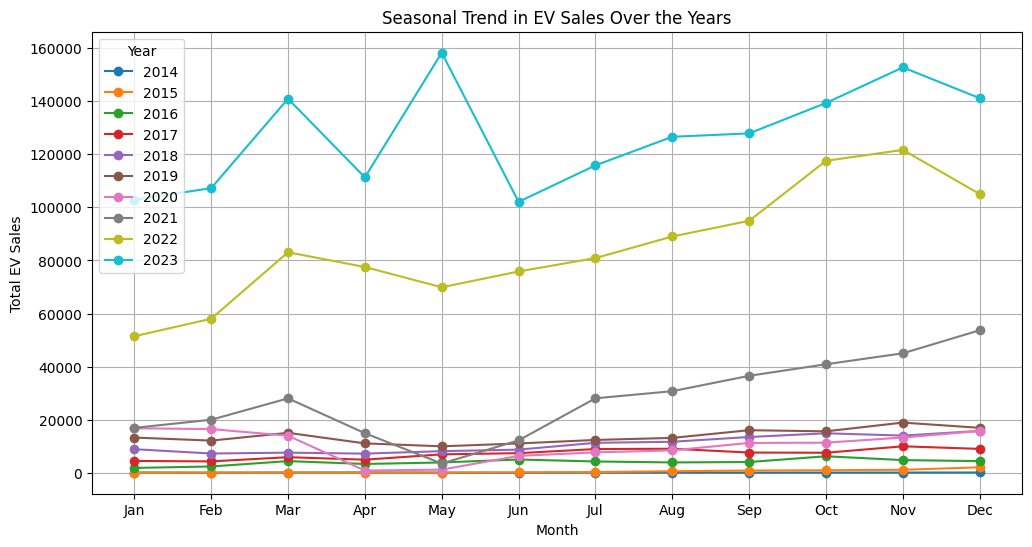

In [23]:
plt.figure(figsize=(12, 6))
monthly_sales_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Seasonal Trend in EV Sales Over the Years')
plt.xlabel('Month')
plt.ylabel('Total EV Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

**Percentage Contribution of Passenger vs Commercial Vehicles to EV Sales over the months**

In [24]:
#Creating a new column to divide the vehicle categories into either passenger or commercial

def categorize_column(x):
  if x['Vehicle_Category'] in ['2-Wheelers','4-Wheelers']:
    return 'Passenger'
  else: return 'Commercial'

df['Vehicle_Usage']=df.apply(categorize_column,axis=1)
df.head()

Year Month_Name       Date           State         Vehicle_Class  \
0  2014        jan 2014-01-01  Andhra Pradesh       ADAPTED VEHICLE   
1  2014        jan 2014-01-01  Andhra Pradesh  AGRICULTURAL TRACTOR   
2  2014        jan 2014-01-01  Andhra Pradesh             AMBULANCE   
3  2014        jan 2014-01-01  Andhra Pradesh   ARTICULATED VEHICLE   
4  2014        jan 2014-01-01  Andhra Pradesh                   BUS   

  Vehicle_Category Vehicle_Type  EV_Sales_Quantity  Month Vehicle_Usage  
0           Others       Others                  0      1    Commercial  
1           Others       Others                  0      1    Commercial  
2           Others       Others                  0      1    Commercial  
3           Others       Others                  0      1    Commercial  
4              Bus          Bus                  0      1    Commercial

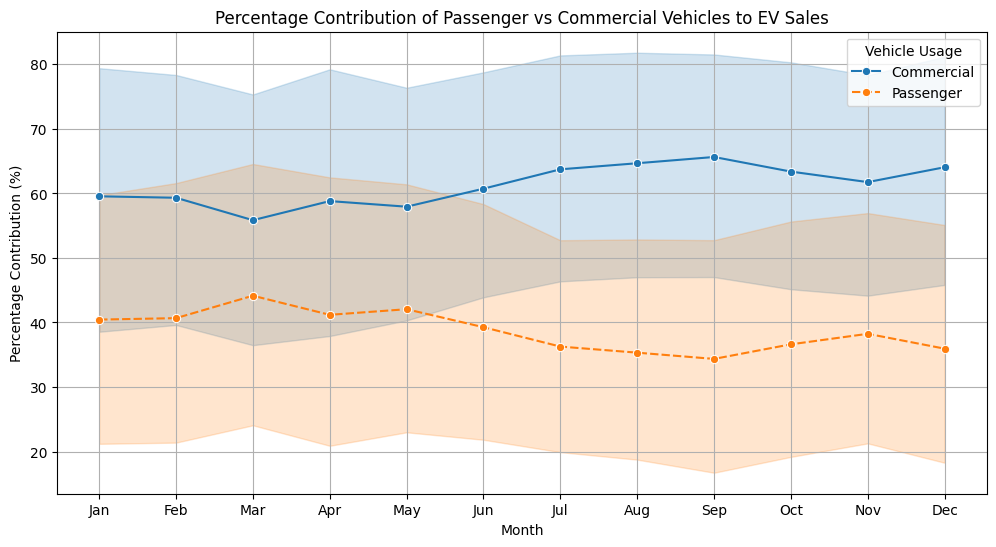

In [25]:
# Group sales by Vehicle Category to calculate the contribution percentage
monthly_category_sales = df.groupby(['Year', 'Month', 'Vehicle_Usage'])['EV_Sales_Quantity'].sum().reset_index()

# Calculate total sales per month
total_sales_per_month = monthly_category_sales.groupby(['Year', 'Month'])['EV_Sales_Quantity'].sum().reset_index()
total_sales_per_month.rename(columns={'EV_Sales_Quantity': 'Total_Sales'}, inplace=True)

# Merge the total sales back into the category sales dataframe
monthly_category_sales = pd.merge(monthly_category_sales, total_sales_per_month, on=['Year', 'Month'])

# Calculate percentage contribution for each category
monthly_category_sales['Percentage_Contribution'] = (monthly_category_sales['EV_Sales_Quantity'] /
                                                     monthly_category_sales['Total_Sales']) * 100

# Plot percentage contribution of Passenger and Commercial vehicles
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Percentage_Contribution', hue='Vehicle_Usage',
             data=monthly_category_sales, marker='o', style='Vehicle_Usage')
plt.title('Percentage Contribution of Passenger vs Commercial Vehicles to EV Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Contribution (%)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Vehicle Usage')
plt.show()